# **This is a Individual Project and here is my individual notebook:-**


1.   **Soumya R. Mishra**




# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


# <b> Data Description </b>



<b>Attribute Information: </b>

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# **Importing**

In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
import datetime as dt

from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source

from IPython.display import SVG
from IPython.display import display


from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve



from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor




from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import XGBRFClassifier
from xgboost import XGBRFRegressor



from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor






import statsmodels.api as sm


import warnings
warnings.filterwarnings('ignore')



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Importing the dataset
dataset = pd.read_excel('/content/drive/MyDrive/Credit Card Default Prediction/default of credit card clients.xls')

In [6]:
dataset.head()

Unnamed: 0         X1   X2  ...       X22       X23                           Y
0         ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default payment next month
1          1      20000    2  ...         0         0                           1
2          2     120000    2  ...         0      2000                           1
3          3      90000    2  ...      1000      5000                           0
4          4      50000    2  ...      1069      1000                           0

[5 rows x 25 columns]

In [7]:
dataset.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [8]:
columns={'Unnamed: 0':'ID','X1':'LIMIT_BAL','X2':'SEX','X3':'EDUCATION','X4':'MARRIAGE','X5':'AGE','X6':'PAY_september','X7':'PAY_august','X8':'PAY_july','X9':'PAY_june','X10':'PAY_may','X11':'PAY_april','X12':'BILL_AMT_september','X13':'BILL_AMT_august','X14':'BILL_AMT_july','X15':'BILL_AMT_june','X16':'BILL_AMT_may','X17':'BILL_AMT_april','X18':'PAY_AMT_september','X19':'PAY_AMT_august','X20':'PAY_AMT_july','X21':'PAY_AMT_june','X22':'PAY_AMT_may','X23':'PAY_AMT_april','Y':'default_payment_next_month'}

In [9]:
dataset.rename(columns=columns,inplace=True)

In [10]:
dataset=pd.DataFrame(dataset.iloc[1:,:].reset_index()).drop(['index'],axis=1)

In [11]:
dataset.head()

ID LIMIT_BAL SEX  ... PAY_AMT_may PAY_AMT_april default_payment_next_month
0  1     20000   2  ...           0             0                          1
1  2    120000   2  ...           0          2000                          1
2  3     90000   2  ...        1000          5000                          0
3  4     50000   2  ...        1069          1000                          0
4  5     50000   1  ...         689           679                          0

[5 rows x 25 columns]

# **Data Inspection**

In [12]:
# First look
dataset.head()

ID LIMIT_BAL SEX  ... PAY_AMT_may PAY_AMT_april default_payment_next_month
0  1     20000   2  ...           0             0                          1
1  2    120000   2  ...           0          2000                          1
2  3     90000   2  ...        1000          5000                          0
3  4     50000   2  ...        1069          1000                          0
4  5     50000   1  ...         689           679                          0

[5 rows x 25 columns]

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_september               30000 non-null  object
 7   PAY_august                  30000 non-null  object
 8   PAY_july                    30000 non-null  object
 9   PAY_june                    30000 non-null  object
 10  PAY_may                     30000 non-null  object
 11  PAY_april                   30000 non-null  object
 12  BILL_AMT_september          30000 non-null  object
 13  BILL_AMT_august             30000 non-null  ob

***As Dtype is showing object , but we have to make it an integer.***

In [14]:
def change_dtype(dataset,col):
  dataset[col]=dataset[col].astype(int)


In [15]:
for col in dataset.columns:
  change_dtype(dataset,col)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_september               30000 non-null  int64
 7   PAY_august                  30000 non-null  int64
 8   PAY_july                    30000 non-null  int64
 9   PAY_june                    30000 non-null  int64
 10  PAY_may                     30000 non-null  int64
 11  PAY_april                   30000 non-null  int64
 12  BILL_AMT_september          30000 non-null  int64
 13  BILL_AMT_august             30000 non-null  int64
 14  BILL_A

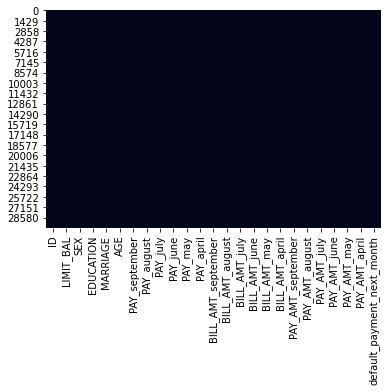

In [17]:
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

***Above dataset has no null value.***

# **DataSet Information**

In [18]:
print("Columns and data types")
pd.DataFrame(dataset.dtypes).rename(columns = {0:'dtype'})

Columns and data types


dtype
ID                          int64
LIMIT_BAL                   int64
SEX                         int64
EDUCATION                   int64
MARRIAGE                    int64
AGE                         int64
PAY_september               int64
PAY_august                  int64
PAY_july                    int64
PAY_june                    int64
PAY_may                     int64
PAY_april                   int64
BILL_AMT_september          int64
BILL_AMT_august             int64
BILL_AMT_july               int64
BILL_AMT_june               int64
BILL_AMT_may                int64
BILL_AMT_april              int64
PAY_AMT_september           int64
PAY_AMT_august              int64
PAY_AMT_july                int64
PAY_AMT_june                int64
PAY_AMT_may                 int64
PAY_AMT_april               int64
default_payment_next_month  int64

In [19]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'PAY_july', 'PAY_june', 'PAY_may',
       'PAY_april', 'BILL_AMT_september', 'BILL_AMT_august', 'BILL_AMT_july',
       'BILL_AMT_june', 'BILL_AMT_may', 'BILL_AMT_april', 'PAY_AMT_september',
       'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june', 'PAY_AMT_may',
       'PAY_AMT_april', 'default_payment_next_month'],
      dtype='object')

In [20]:
dataset.shape

(30000, 25)

In [21]:
dataset.describe(include='all')

ID       LIMIT_BAL  ...  PAY_AMT_april  default_payment_next_month
count  30000.000000    30000.000000  ...   30000.000000                30000.000000
mean   15000.500000   167484.322667  ...    5215.502567                    0.221200
std     8660.398374   129747.661567  ...   17777.465775                    0.415062
min        1.000000    10000.000000  ...       0.000000                    0.000000
25%     7500.750000    50000.000000  ...     117.750000                    0.000000
50%    15000.500000   140000.000000  ...    1500.000000                    0.000000
75%    22500.250000   240000.000000  ...    4000.000000                    0.000000
max    30000.000000  1000000.000000  ...  528666.000000                    1.000000

[8 rows x 25 columns]

In [22]:
numerical_columns=list(dataset.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'PAY_july', 'PAY_june', 'PAY_may',
       'PAY_april', 'BILL_AMT_september', 'BILL_AMT_august', 'BILL_AMT_july',
       'BILL_AMT_june', 'BILL_AMT_may', 'BILL_AMT_april', 'PAY_AMT_september',
       'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june', 'PAY_AMT_may',
       'PAY_AMT_april', 'default_payment_next_month'],
      dtype='object')

In [23]:
categorical_columns=list(dataset.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)
categorical_features

Index([], dtype='object')

In [24]:
# duplicate
len(dataset[dataset.duplicated()])

0

In [25]:
dataset[dataset.duplicated()]

Empty DataFrame
Columns: [ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_september, PAY_august, PAY_july, PAY_june, PAY_may, PAY_april, BILL_AMT_september, BILL_AMT_august, BILL_AMT_july, BILL_AMT_june, BILL_AMT_may, BILL_AMT_april, PAY_AMT_september, PAY_AMT_august, PAY_AMT_july, PAY_AMT_june, PAY_AMT_may, PAY_AMT_april, default_payment_next_month]
Index: []

In [26]:
### Dropping Duplicate Rows
dataset=dataset.drop_duplicates()
len(dataset[dataset.duplicated()])

0

In [27]:
dataset.shape

(30000, 25)

In [28]:
dataset.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_september                 0
PAY_august                    0
PAY_july                      0
PAY_june                      0
PAY_may                       0
PAY_april                     0
BILL_AMT_september            0
BILL_AMT_august               0
BILL_AMT_july                 0
BILL_AMT_june                 0
BILL_AMT_may                  0
BILL_AMT_april                0
PAY_AMT_september             0
PAY_AMT_august                0
PAY_AMT_july                  0
PAY_AMT_june                  0
PAY_AMT_may                   0
PAY_AMT_april                 0
default_payment_next_month    0
dtype: int64

***There are 30000 rows and 25 columns in above dataset.***

***Above dataset has no missing value.***

***Above dataset has no duplicate value.***

***Above dataset has no null value.***

***As the categorical data has been encoded before so there is no categorical data and no need tol handle categorical data.***

# **Exploratory Data Analysis**

## **Column wise Analysis**

In [766]:
def column_wise_analysis(dataset,column):
  print(str(column).upper())
  print(" ")
  print(dataset[column].value_counts().head())
  print(" ")
  print(dataset[column].nunique())
  print(" ")
  print(dataset.groupby([column])['default_payment_next_month'].mean().sort_values(ascending = False).head(10))
  print(" ")

  import matplotlib.pyplot as plt
  from matplotlib import rcParams
  import seaborn as sns
  s1=dataset[column].unique()
  s2=dataset.groupby([column])['default_payment_next_month'].mean()

  plt.rcParams['figure.figsize'] = (18, 7)

  sns.scatterplot(s1,s2,color='r')

  plt.xlabel(column, fontsize = 15)
  plt.ylabel('default_payment_next_month', fontsize = 15)
  plt.show()

  print(" ")
  print(" ")
  print(" ")


  import matplotlib.pyplot as plt
  from matplotlib import rcParams
  plt.rcParams['figure.figsize'] = (12, 7)

  color = plt.cm.copper(np.linspace(0, 0.5, 20))
  ((dataset.groupby([column])['default_payment_next_month'].mean())).sort_values(ascending = False).head(6).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])

  plt.xlabel(column, fontsize = 15)
  plt.ylabel('default_payment_next_month', fontsize = 15)
  plt.show()

  print(" ")
  print(" ")
  print(" ")


  cc=dataset.groupby([column])['default_payment_next_month'].mean()
  plt.rcParams['figure.figsize'] = (12, 7)
  plt.bar(dataset[column].unique(),cc) 

  # Box Plot for Account Length attribute 
  dataset.boxplot(column=column,by='default_payment_next_month')


**Exploring the dependent variable**

In [767]:
dataset.head()

ID  LIMIT_BAL  SEX  ...  PAY_AMT_may  PAY_AMT_april  default_payment_next_month
0   1      20000    2  ...            0              0                           1
1   2     120000    2  ...            0           2000                           1
2   3      90000    2  ...         1000           5000                           0
3   4      50000    2  ...         1069           1000                           0
4   5      50000    1  ...          689            679                           0

[5 rows x 25 columns]

In [768]:
dataset['default_payment_next_month'].value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

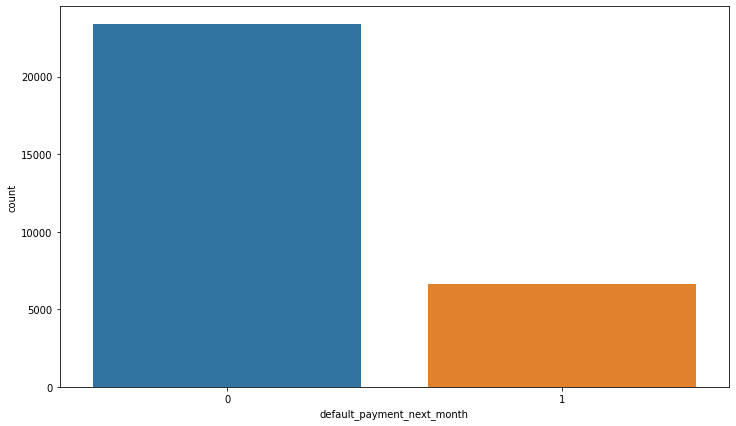

In [769]:
sns.countplot(x=dataset.default_payment_next_month)

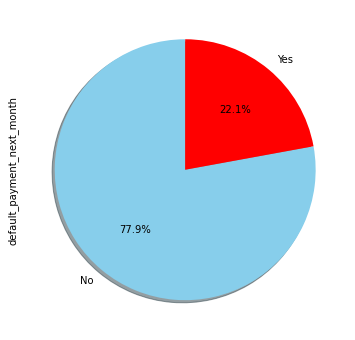

In [770]:
dataset['default_payment_next_month'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

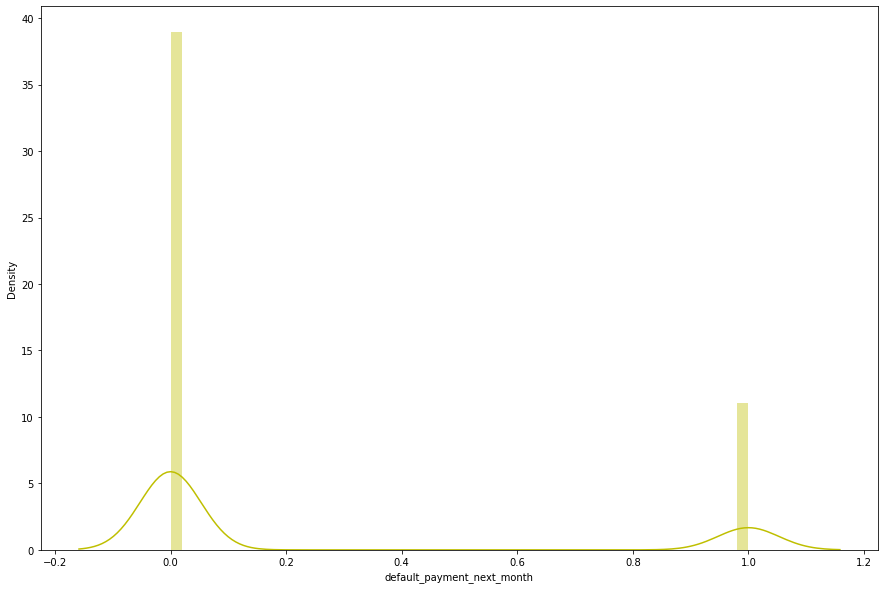

In [771]:
# Dependent Variable "default_payment_next_month"
plt.figure(figsize=(15,10))
sns.distplot(dataset.default_payment_next_month, color="y")

**Exploring Independent Variable**

ID
 
2047     1
1322     1
15629    1
9486     1
11535    1
Name: ID, dtype: int64
 
30000
 
ID
30000    1
16184    1
16220    1
16210    1
16209    1
16196    1
16192    1
16191    1
16189    1
16185    1
Name: default_payment_next_month, dtype: int64
 


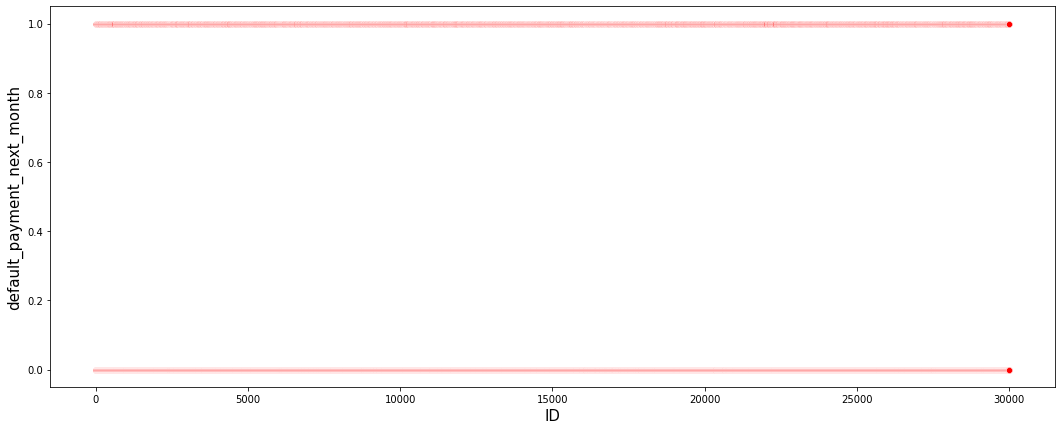

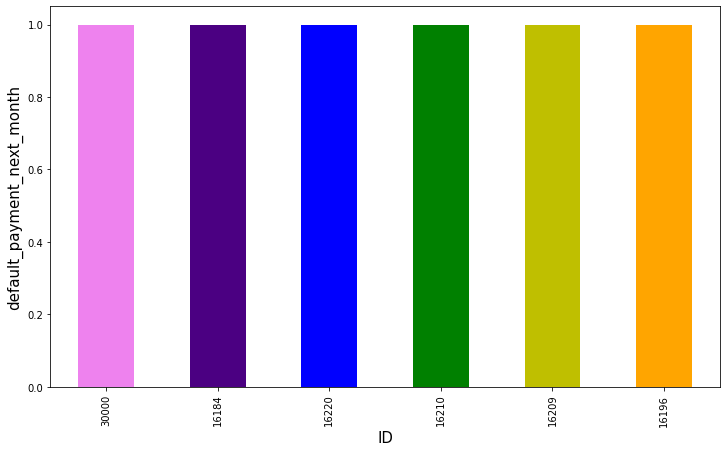

 
 
 
LIMIT_BAL
 
50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: LIMIT_BAL, dtype: int64
 
81
 
LIMIT_BAL
327680    1.000000
740000    0.500000
40000     0.400000
10000     0.399594
20000     0.353239
30000     0.352795
720000    0.333333
70000     0.287278
550000    0.285714
60000     0.282424
Name: default_payment_next_month, dtype: float64
 


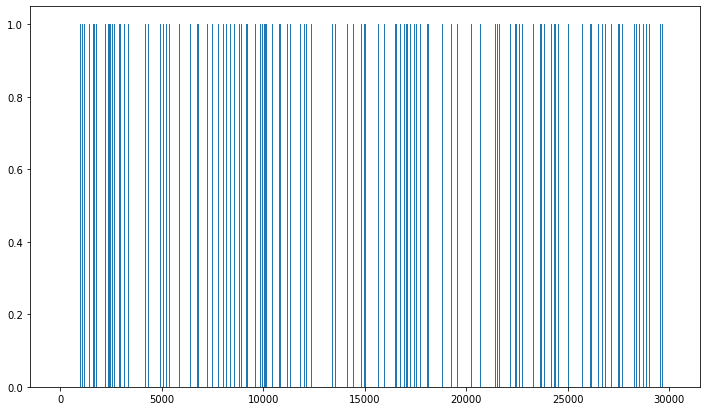

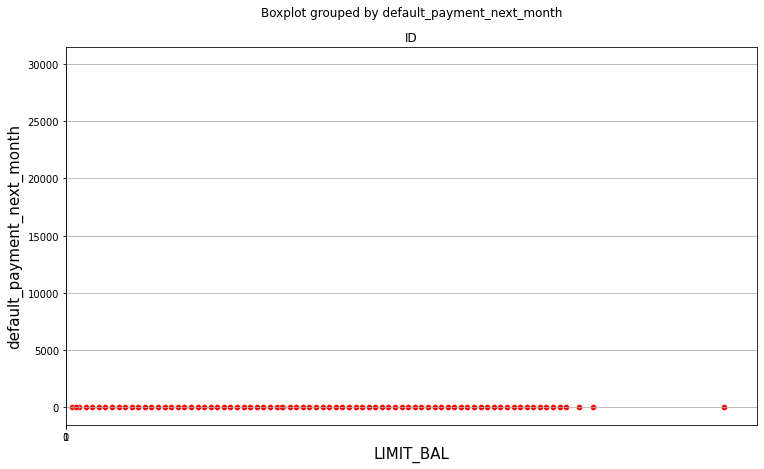

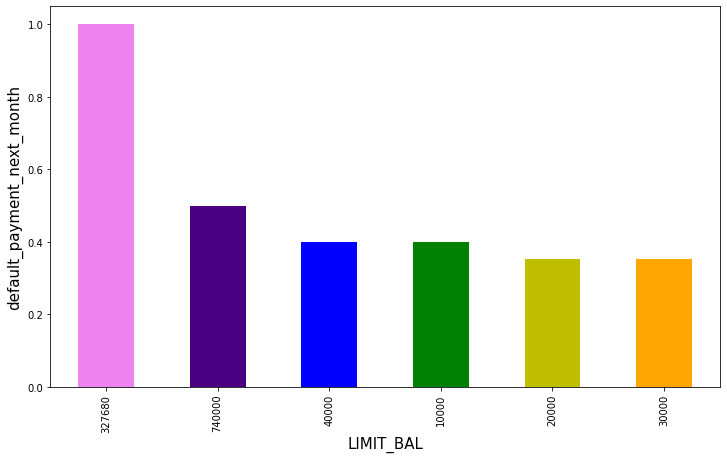

 
 
 
SEX
 
2    18112
1    11888
Name: SEX, dtype: int64
 
2
 
SEX
1    0.241672
2    0.207763
Name: default_payment_next_month, dtype: float64
 


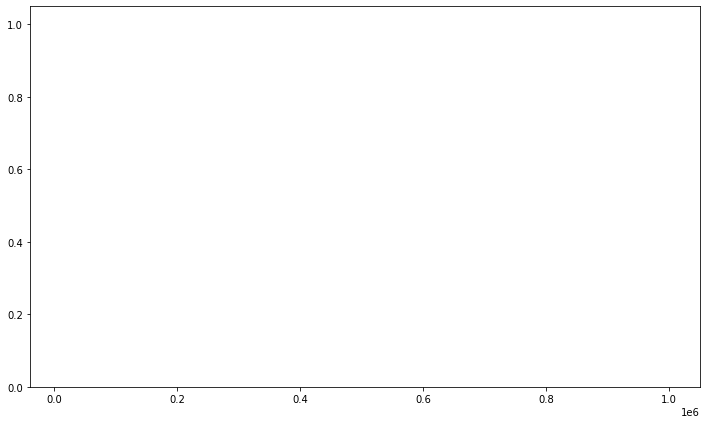

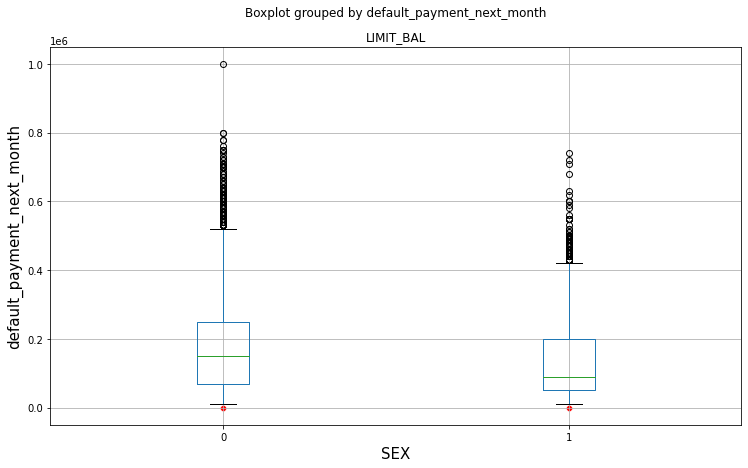

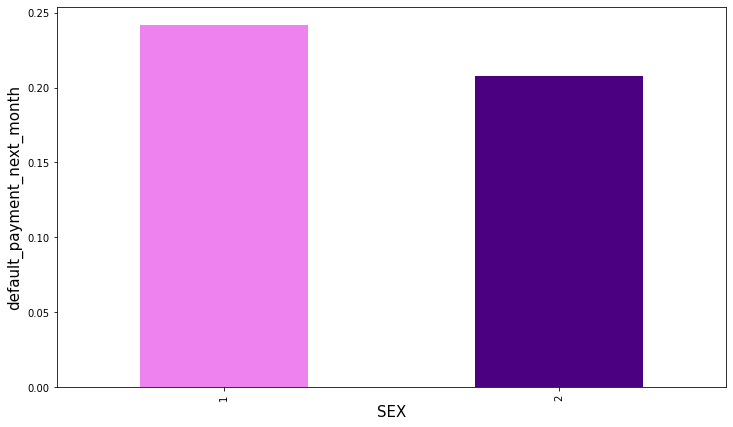

 
 
 
EDUCATION
 
2    14030
1    10585
3     4917
5      280
4      123
Name: EDUCATION, dtype: int64
 
7
 
EDUCATION
3    0.251576
2    0.237349
1    0.192348
6    0.156863
5    0.064286
4    0.056911
0    0.000000
Name: default_payment_next_month, dtype: float64
 


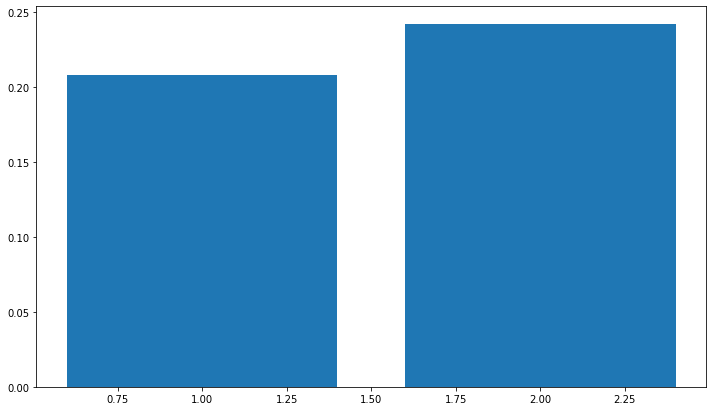

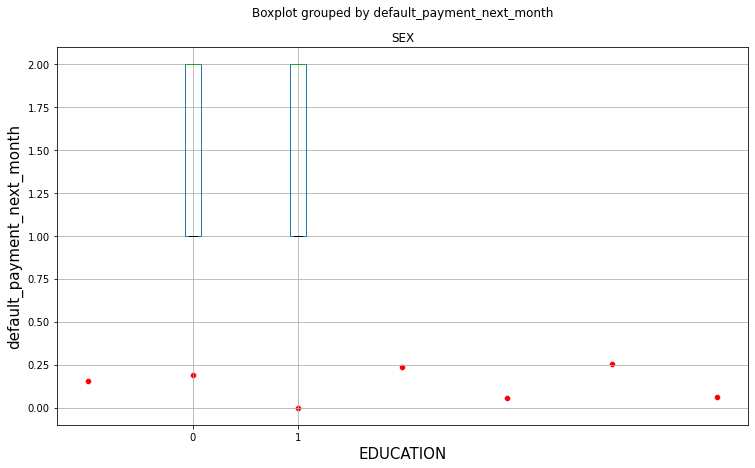

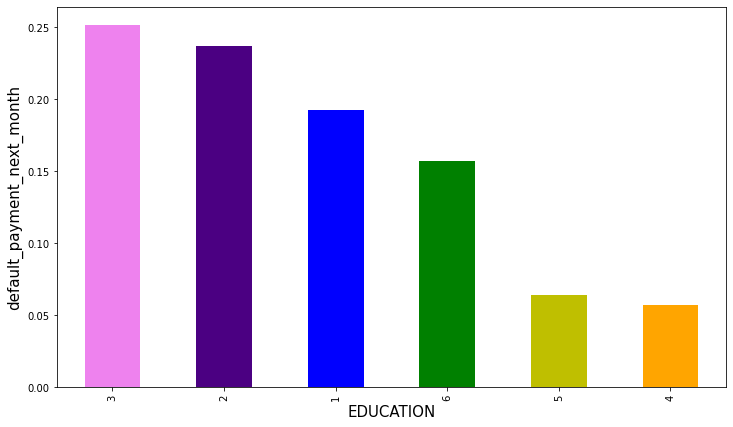

 
 
 
MARRIAGE
 
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
 
4
 
MARRIAGE
3    0.260062
1    0.234717
2    0.209283
0    0.092593
Name: default_payment_next_month, dtype: float64
 


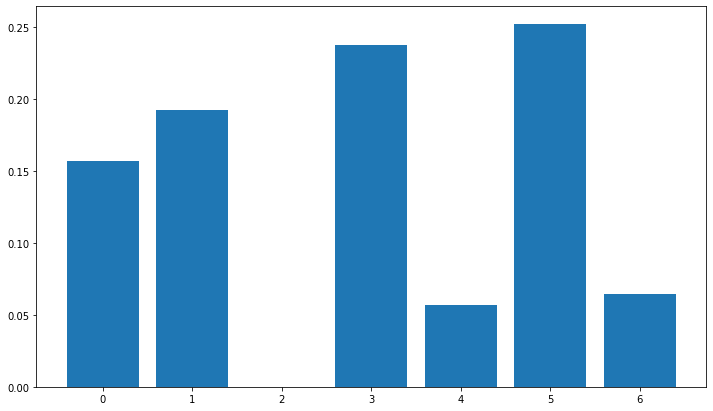

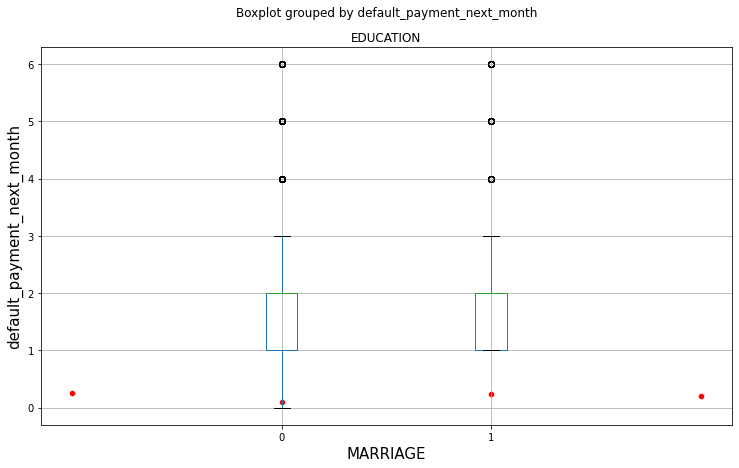

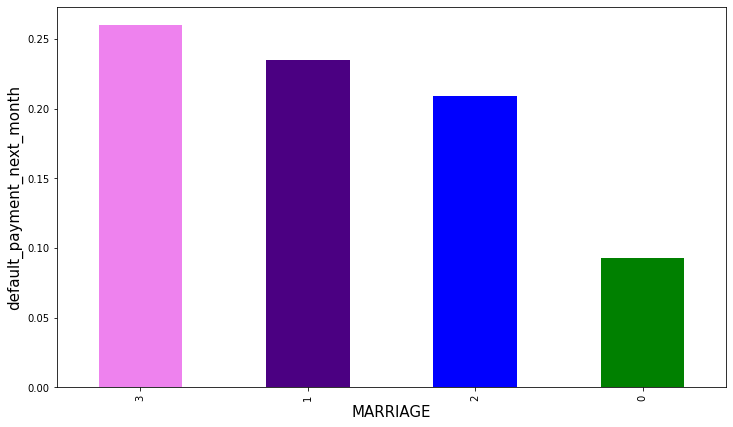

 
 
 
AGE
 
29    1605
27    1477
28    1409
30    1395
26    1256
Name: AGE, dtype: int64
 
56
 
AGE
73    0.750000
61    0.375000
60    0.343284
72    0.333333
75    0.333333
67    0.312500
22    0.301786
64    0.290323
66    0.280000
46    0.275439
Name: default_payment_next_month, dtype: float64
 


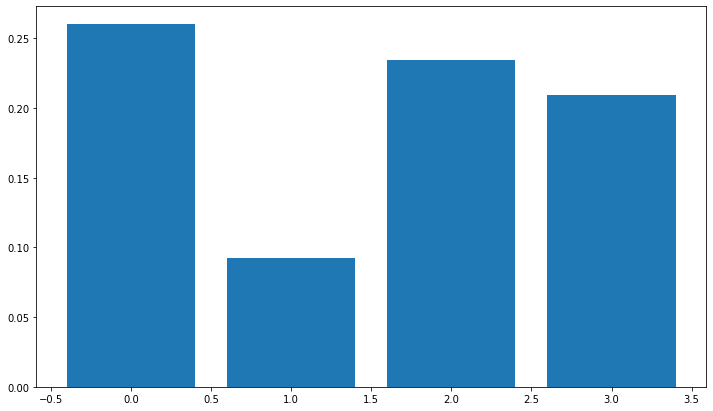

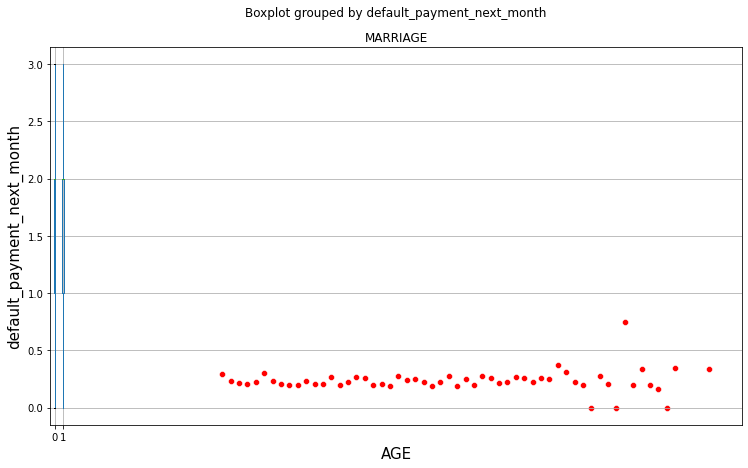

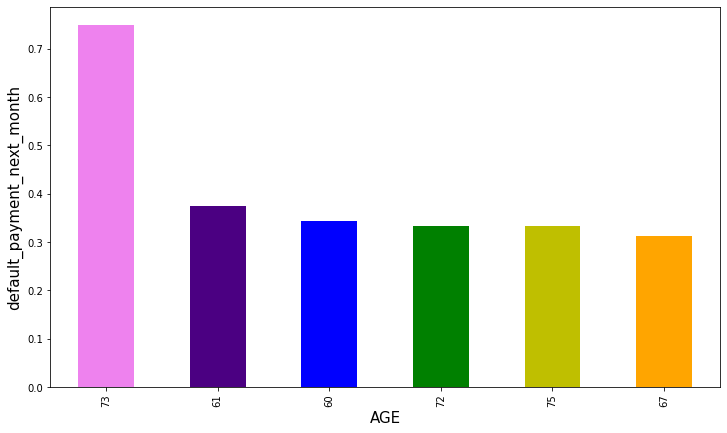

 
 
 
PAY_SEPTEMBER
 
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
Name: PAY_september, dtype: int64
 
11
 
PAY_september
 7    0.777778
 3    0.757764
 2    0.691414
 4    0.684211
 8    0.578947
 6    0.545455
 5    0.500000
 1    0.339479
-1    0.167781
-2    0.132294
Name: default_payment_next_month, dtype: float64
 


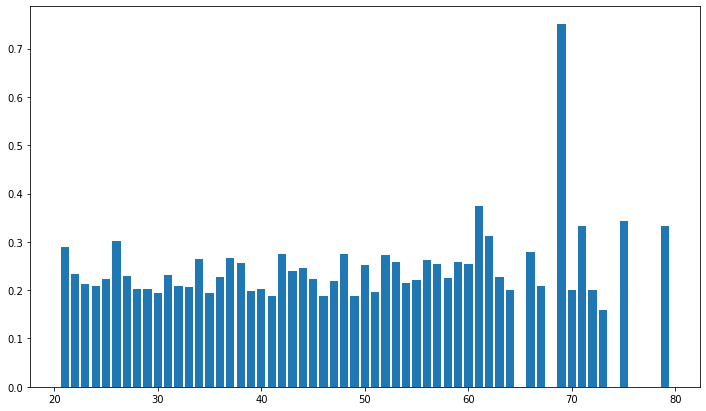

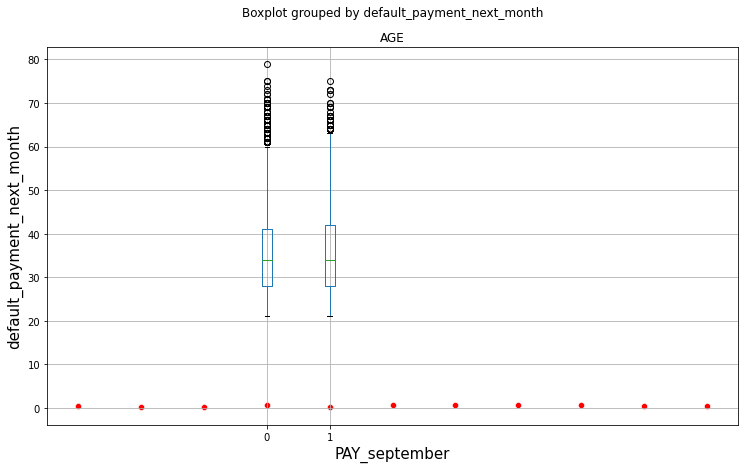

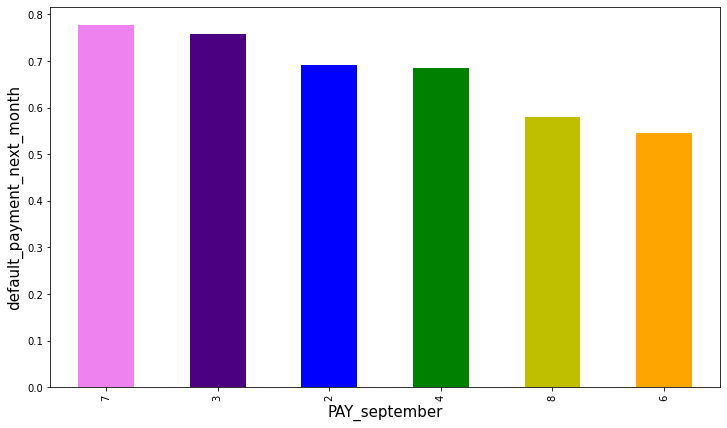

 
 
 
PAY_AUGUST
 
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
Name: PAY_august, dtype: int64
 
11
 
PAY_august
 6    0.750000
 3    0.616564
 7    0.600000
 5    0.600000
 2    0.556150
 4    0.505051
-2    0.182708
 1    0.178571
-1    0.159669
 0    0.159123
Name: default_payment_next_month, dtype: float64
 


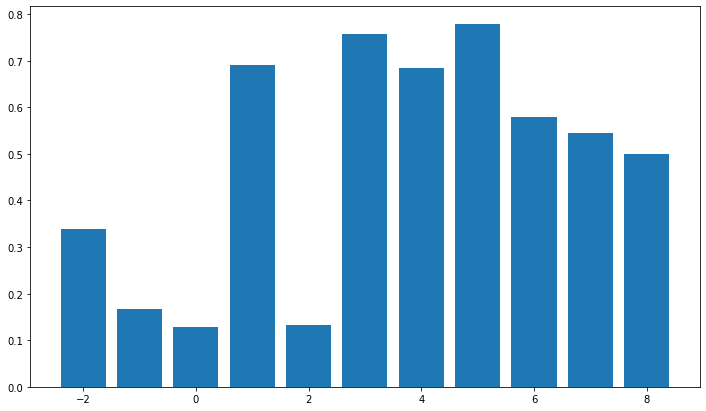

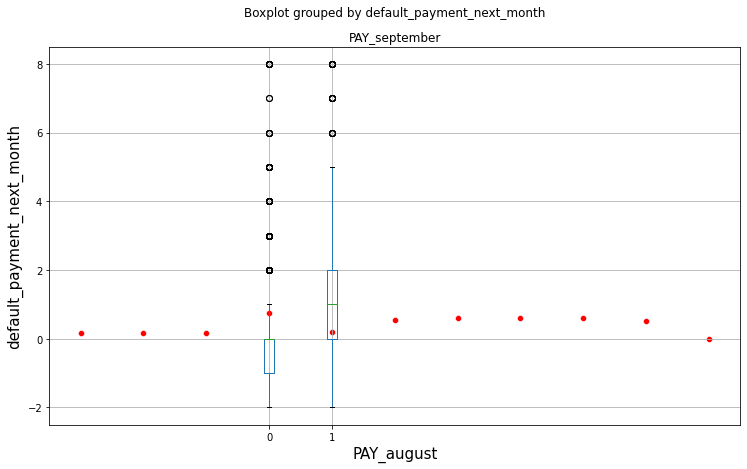

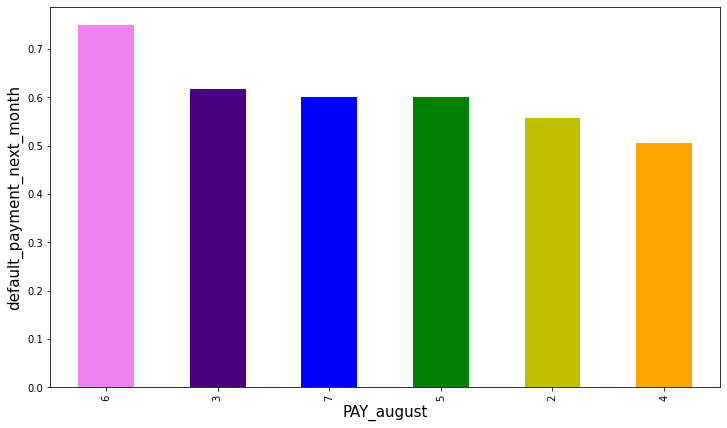

 
 
 
PAY_JULY
 
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
Name: PAY_july, dtype: int64
 
11
 
PAY_july
 7    0.814815
 8    0.666667
 6    0.608696
 4    0.578947
 3    0.575000
 5    0.571429
 2    0.515580
 1    0.250000
-2    0.185312
 0    0.174512
Name: default_payment_next_month, dtype: float64
 


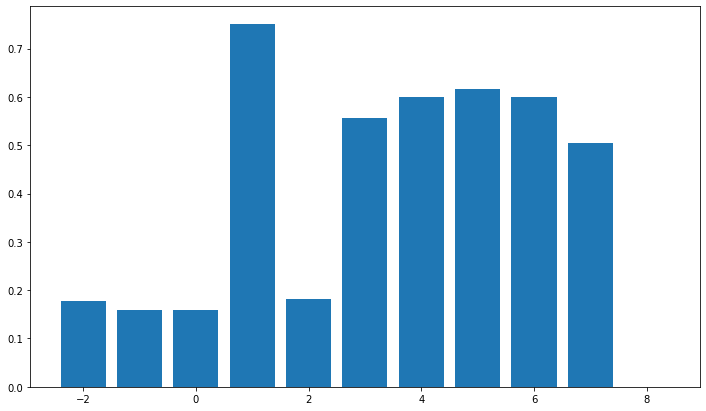

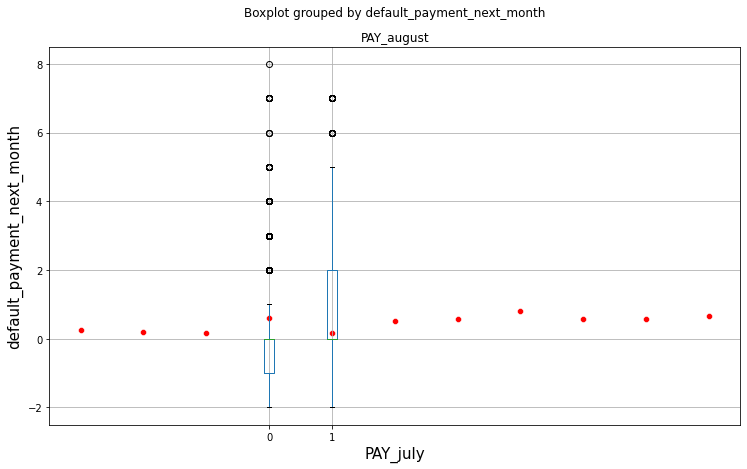

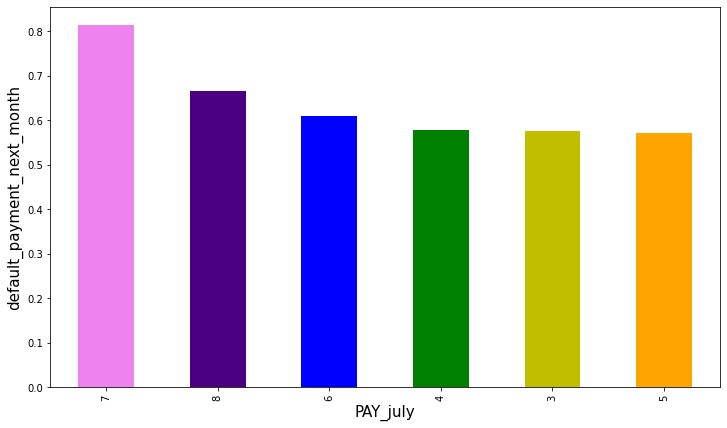

 
 
 
PAY_JUNE
 
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
Name: PAY_june, dtype: int64
 
11
 
PAY_june
 7    0.827586
 4    0.666667
 3    0.611111
 2    0.523267
 5    0.514286
 8    0.500000
 1    0.500000
 6    0.400000
-2    0.192502
 0    0.183288
Name: default_payment_next_month, dtype: float64
 


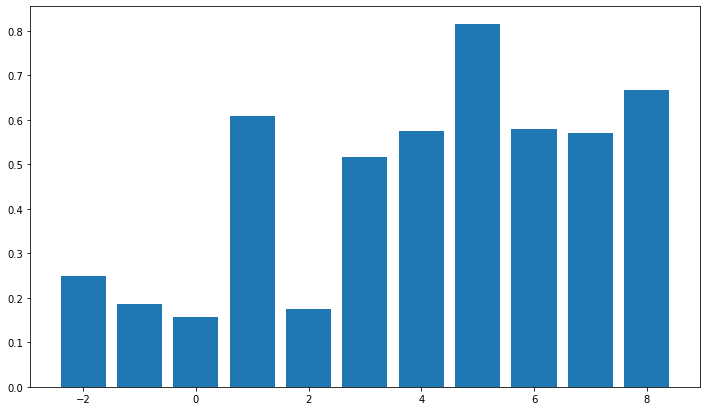

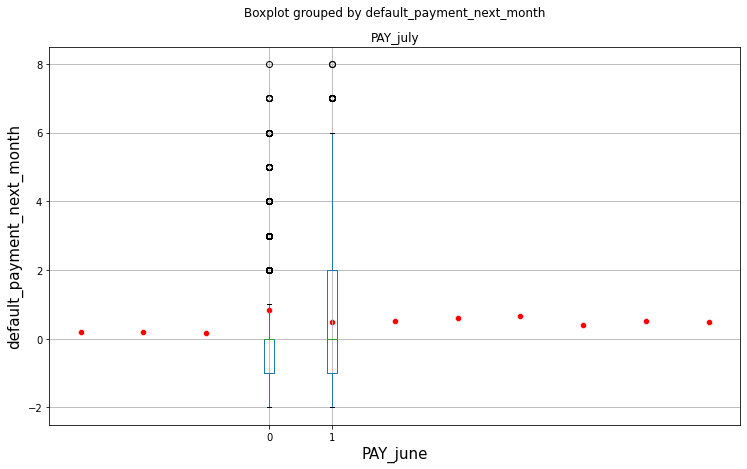

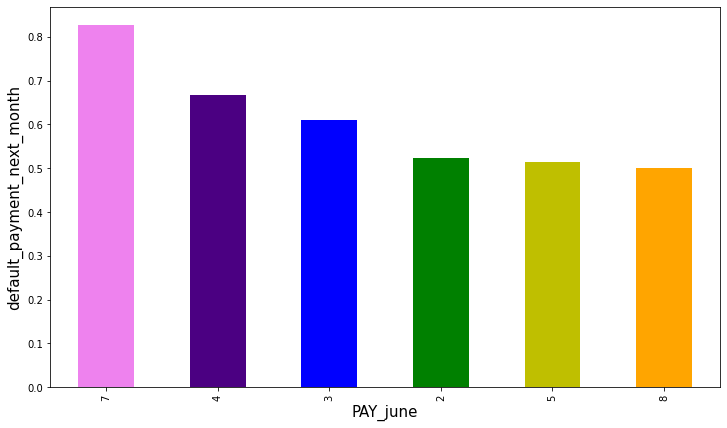

 
 
 
PAY_MAY
 
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
Name: PAY_may, dtype: int64
 
10
 
PAY_may
 8    1.000000
 7    0.827586
 6    0.750000
 3    0.634831
 4    0.607143
 5    0.588235
 2    0.541889
-2    0.196876
 0    0.188529
-1    0.161943
Name: default_payment_next_month, dtype: float64
 


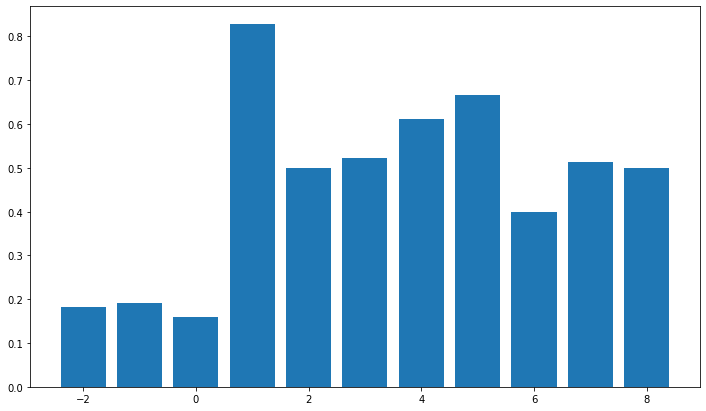

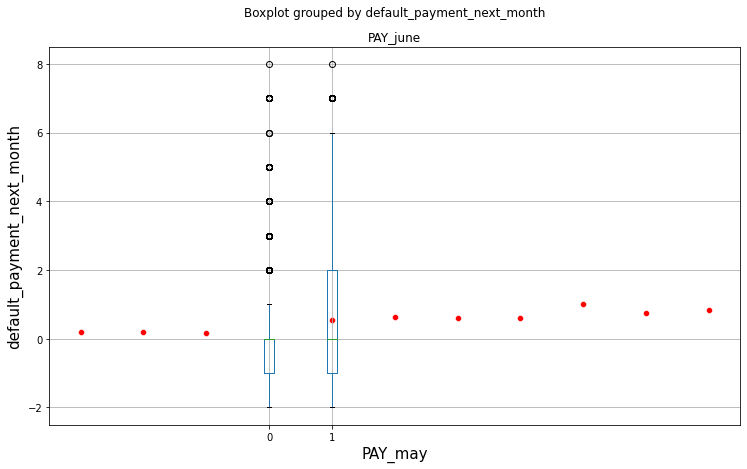

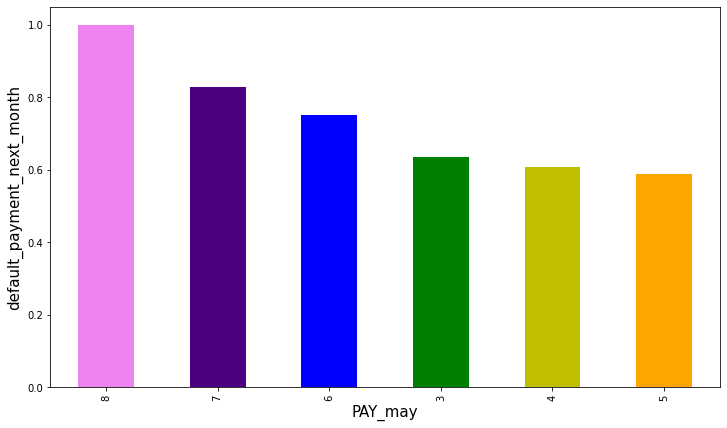

 
 
 
PAY_APRIL
 
 0    16286
-1     5740
-2     4895
 2     2766
 3      184
Name: PAY_april, dtype: int64
 
10
 
PAY_april
 8    1.000000
 7    0.826087
 6    0.736842
 3    0.641304
 4    0.632653
 5    0.538462
 2    0.506508
-2    0.200409
 0    0.188444
-1    0.169861
Name: default_payment_next_month, dtype: float64
 


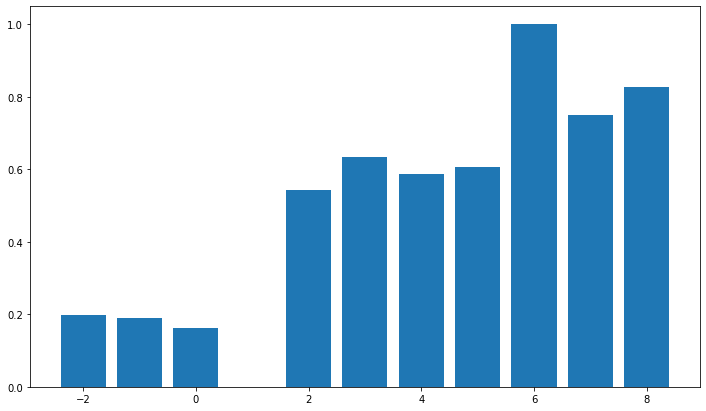

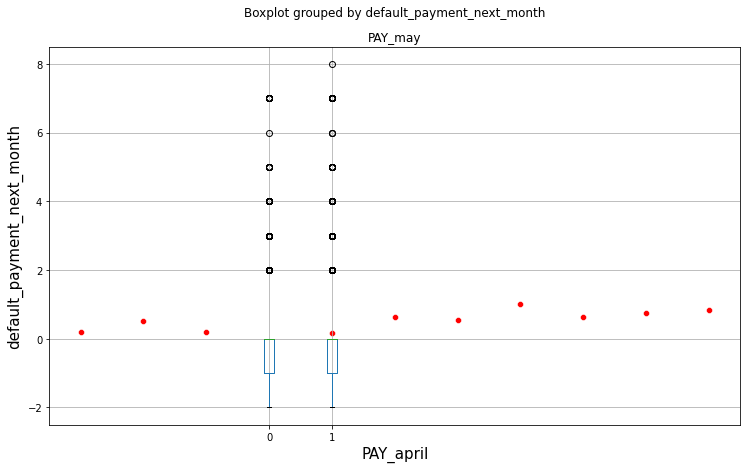

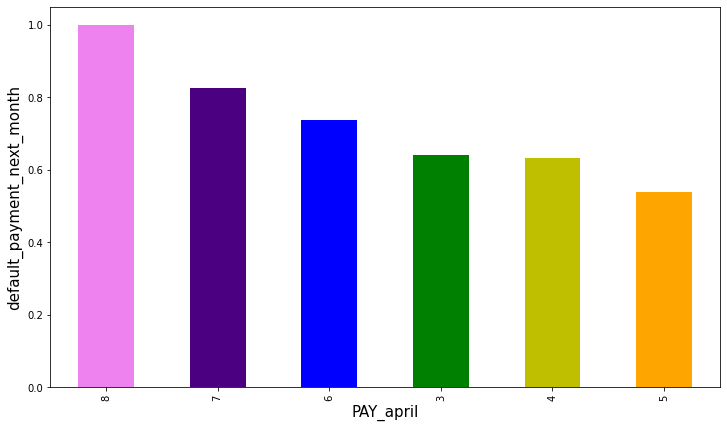

 
 
 
BILL_AMT_SEPTEMBER
 
0      2008
390     244
780      76
326      72
316      63
Name: BILL_AMT_september, dtype: int64
 
22723
 
BILL_AMT_september
37709    1.0
11113    1.0
73073    1.0
10904    1.0
10901    1.0
73250    1.0
73259    1.0
73267    1.0
73302    1.0
10866    1.0
Name: default_payment_next_month, dtype: float64
 


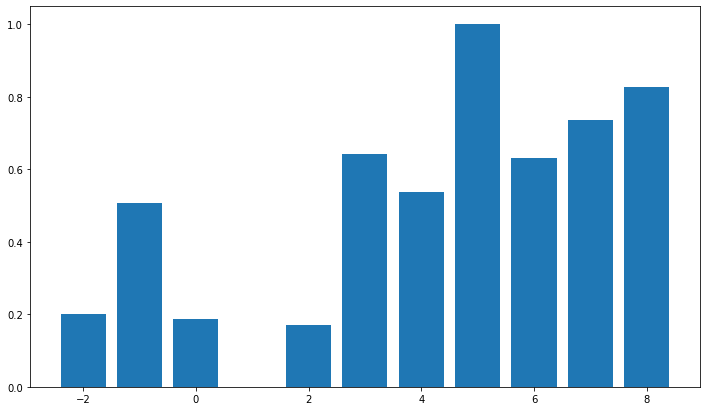

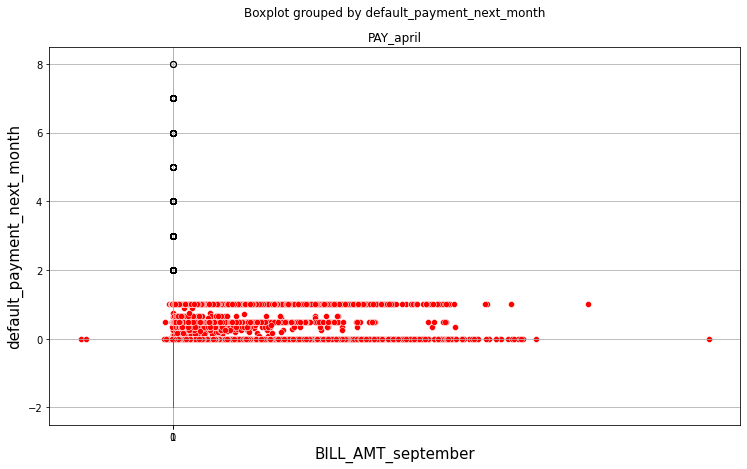

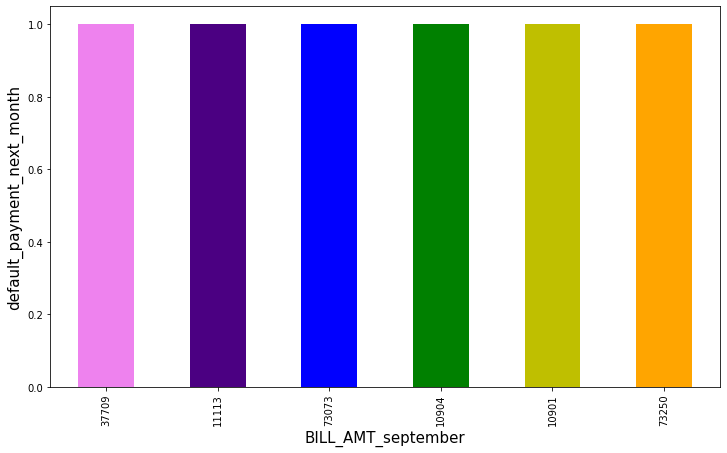

 
 
 
BILL_AMT_AUGUST
 
0      2506
390     231
326      75
780      75
316      72
Name: BILL_AMT_august, dtype: int64
 
22346
 
BILL_AMT_august
36171     1.0
59967     1.0
60003     1.0
132458    1.0
3557      1.0
132472    1.0
3556      1.0
14050     1.0
14078     1.0
60020     1.0
Name: default_payment_next_month, dtype: float64
 


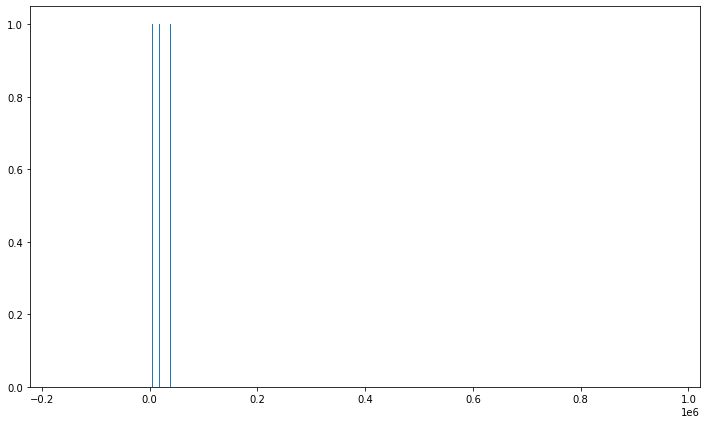

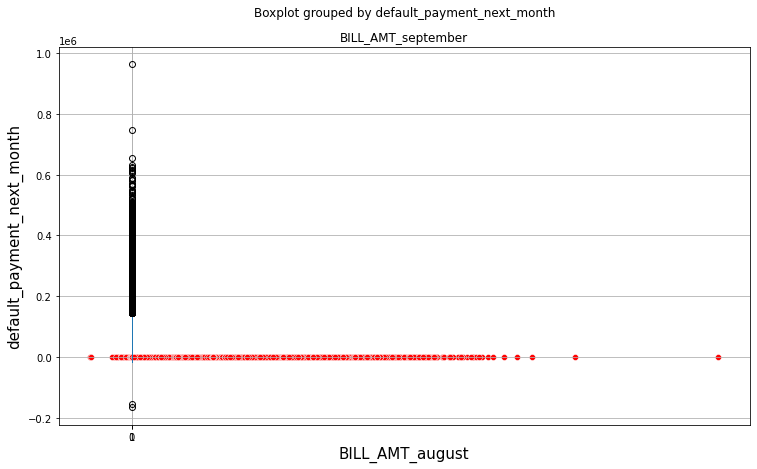

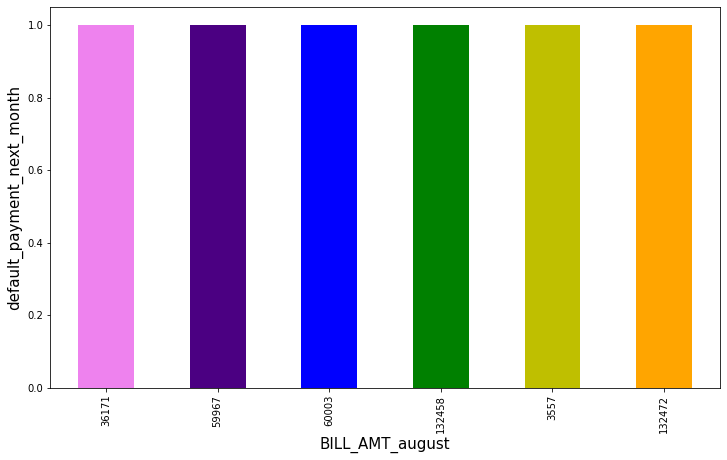

 
 
 
BILL_AMT_JULY
 
0      2870
390     275
780      74
326      63
316      62
Name: BILL_AMT_july, dtype: int64
 
22026
 
BILL_AMT_july
34284    1.0
19240    1.0
43878    1.0
19212    1.0
6462     1.0
96845    1.0
6442     1.0
96867    1.0
6437     1.0
96898    1.0
Name: default_payment_next_month, dtype: float64
 


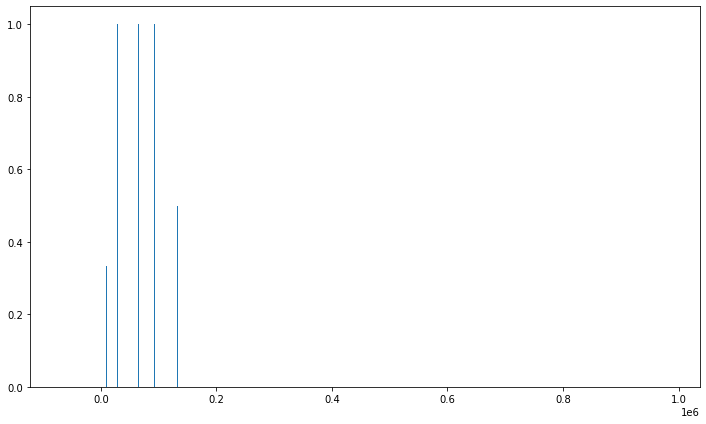

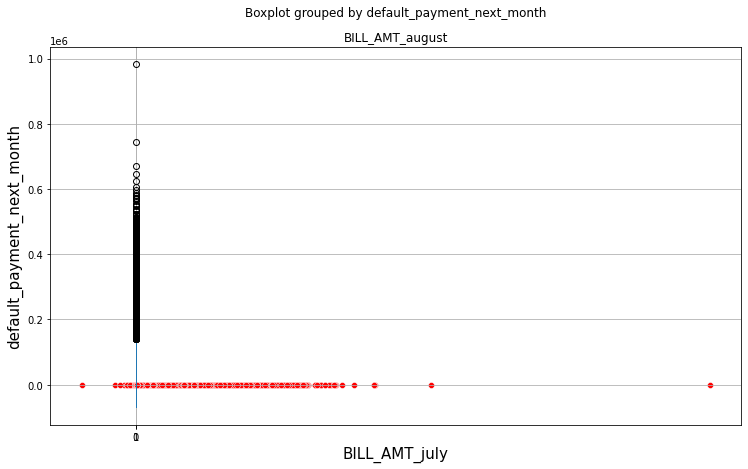

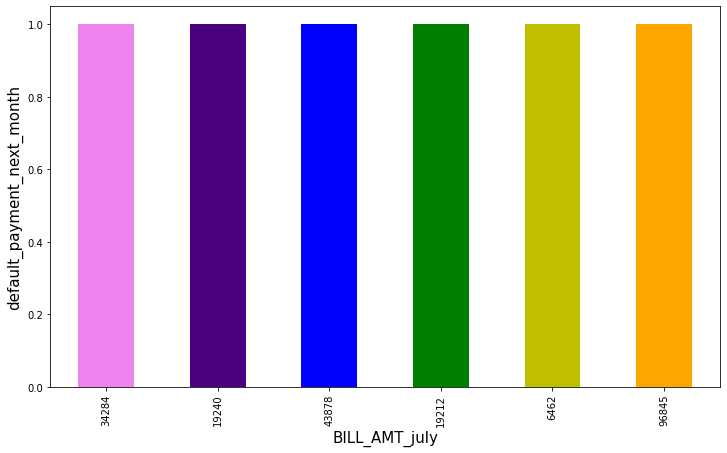

 
 
 
BILL_AMT_JUNE
 
0      3195
390     246
780     101
316      68
326      62
Name: BILL_AMT_june, dtype: int64
 
21548
 
BILL_AMT_june
9774     1.0
6271     1.0
91380    1.0
38640    1.0
6285     1.0
18483    1.0
38634    1.0
91549    1.0
38600    1.0
18488    1.0
Name: default_payment_next_month, dtype: float64
 


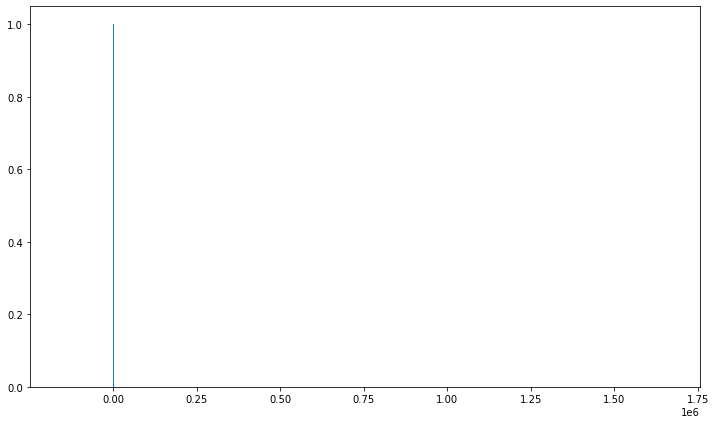

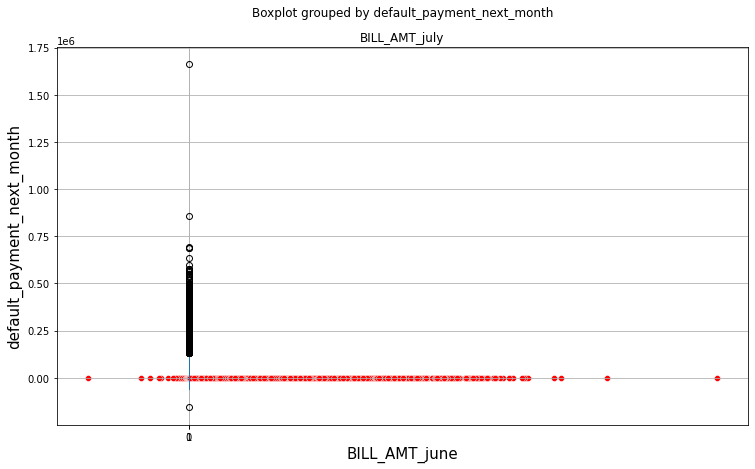

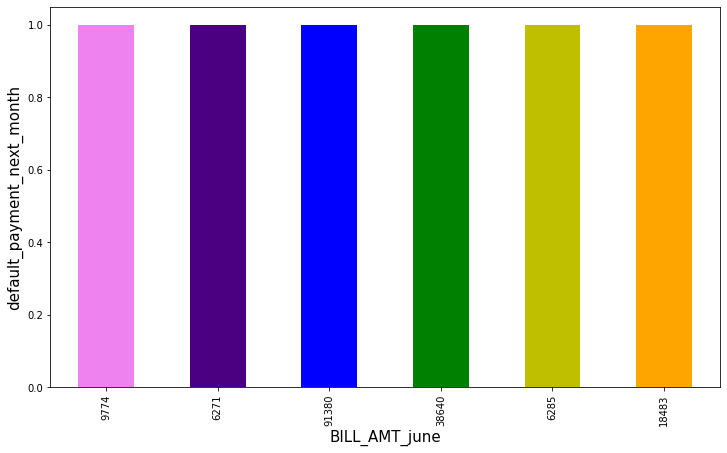

 
 
 
BILL_AMT_MAY
 
0      3506
390     235
780      94
316      79
326      62
Name: BILL_AMT_may, dtype: int64
 
21010
 
BILL_AMT_may
29212    1.0
87893    1.0
35967    1.0
35965    1.0
88018    1.0
5885     1.0
5875     1.0
35836    1.0
88261    1.0
5868     1.0
Name: default_payment_next_month, dtype: float64
 


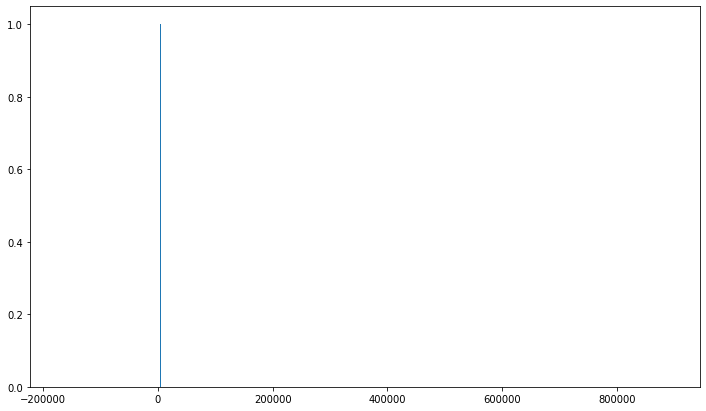

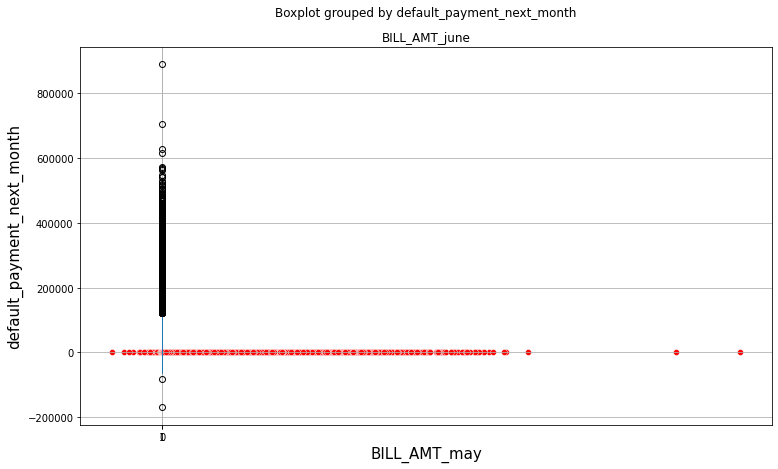

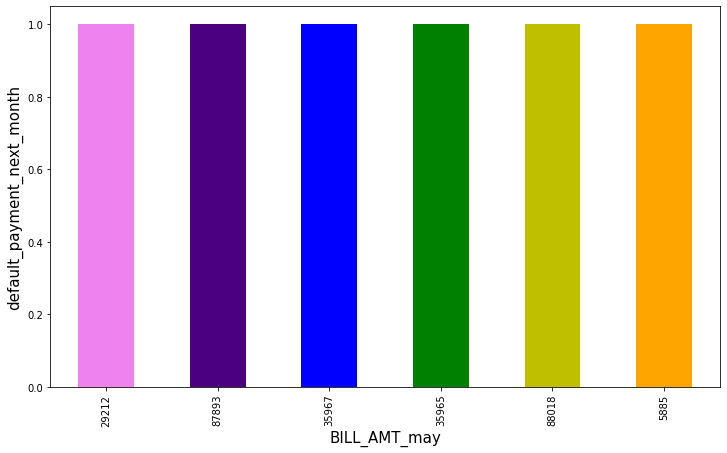

 
 
 
BILL_AMT_APRIL
 
0      4020
390     207
780      86
150      78
316      77
Name: BILL_AMT_april, dtype: int64
 
20604
 
BILL_AMT_april
-339603    1.0
 107893    1.0
 29675     1.0
 29671     1.0
 29621     1.0
 29605     1.0
 29575     1.0
 29549     1.0
 29546     1.0
 29482     1.0
Name: default_payment_next_month, dtype: float64
 


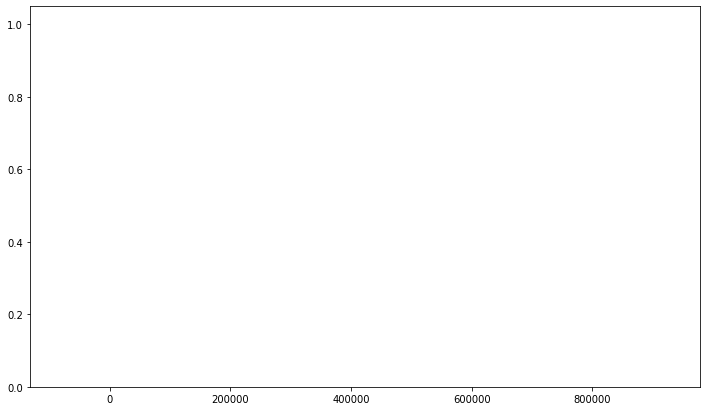

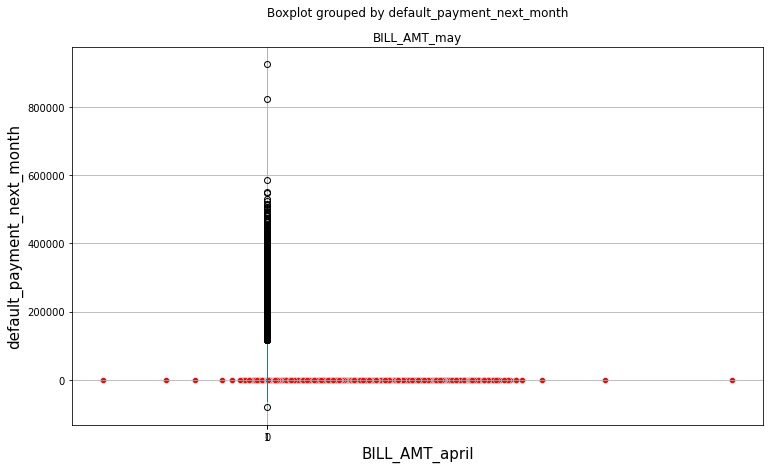

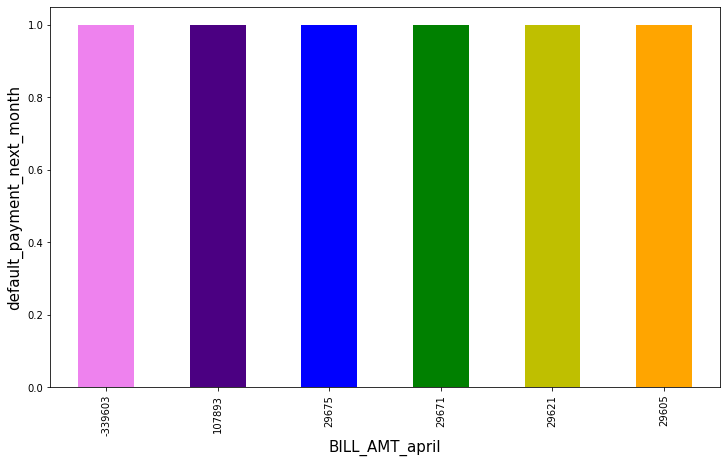

 
 
 
PAY_AMT_SEPTEMBER
 
0       5249
2000    1363
3000     891
5000     698
1500     507
Name: PAY_AMT_september, dtype: int64
 
7943
 
PAY_AMT_september
8077     1.0
6451     1.0
6616     1.0
12151    1.0
12155    1.0
781      1.0
6611     1.0
33882    1.0
1967     1.0
33808    1.0
Name: default_payment_next_month, dtype: float64
 


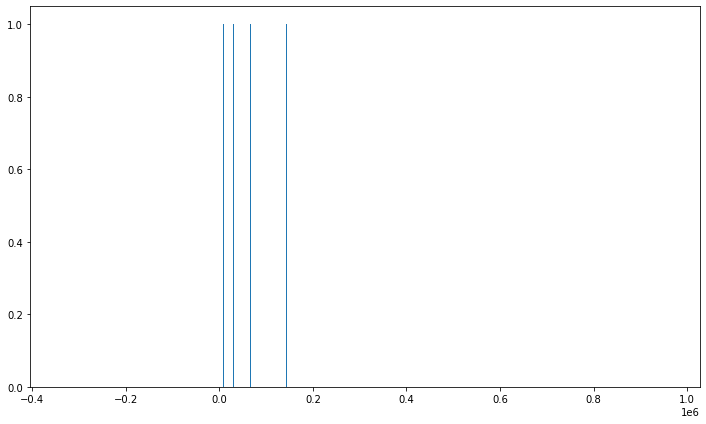

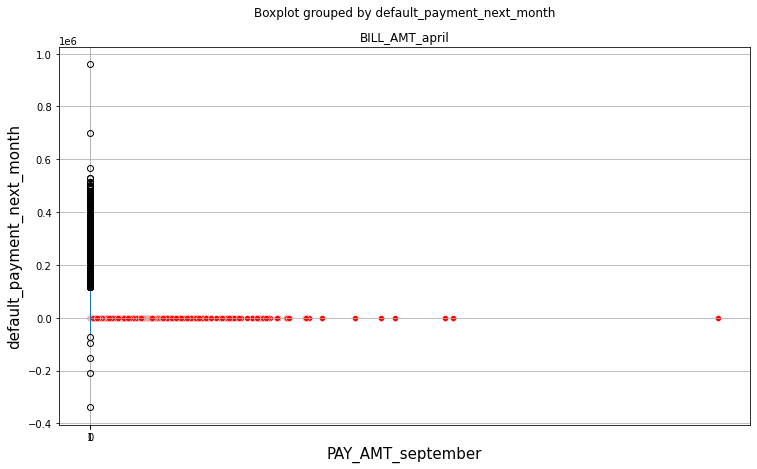

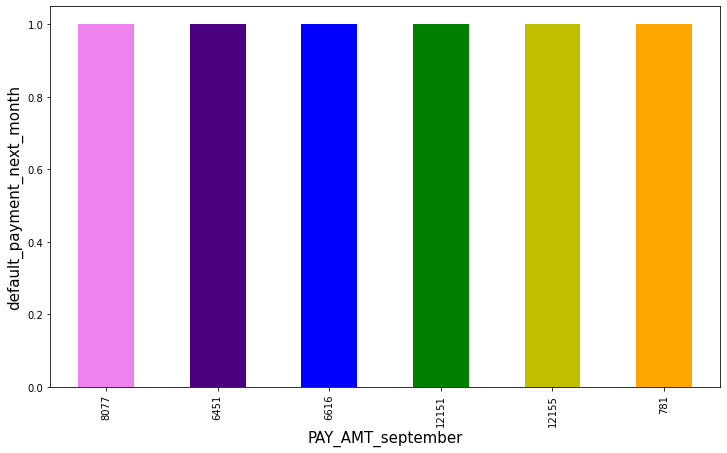

 
 
 
PAY_AMT_AUGUST
 
0       5396
2000    1290
3000     857
5000     717
1000     594
Name: PAY_AMT_august, dtype: int64
 
7899
 
PAY_AMT_august
8276     1.0
11672    1.0
7347     1.0
11380    1.0
1345     1.0
3325     1.0
724      1.0
726      1.0
11350    1.0
2232     1.0
Name: default_payment_next_month, dtype: float64
 


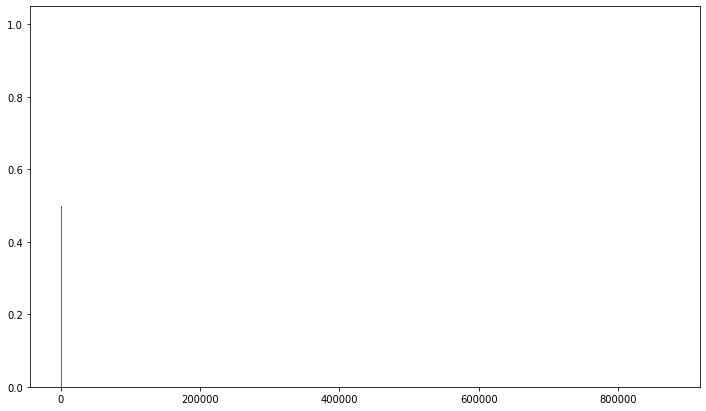

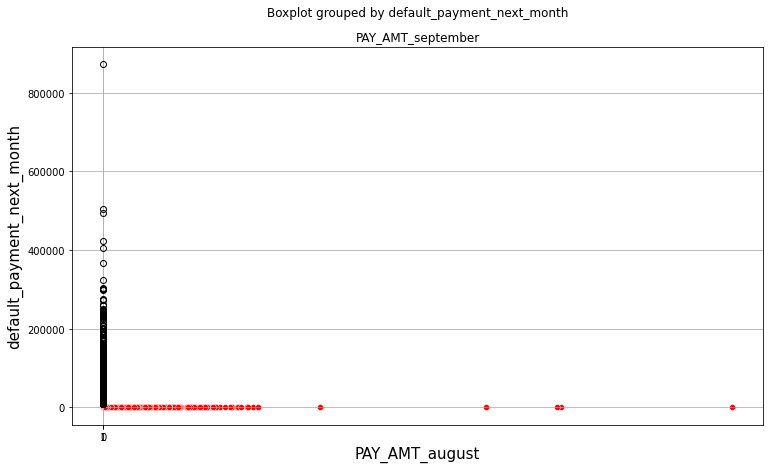

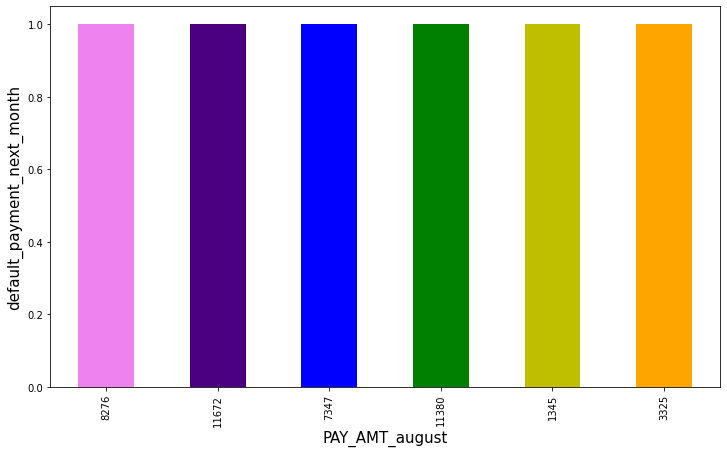

 
 
 
PAY_AMT_JULY
 
0       5968
2000    1285
1000    1103
3000     870
5000     721
Name: PAY_AMT_july, dtype: int64
 
7518
 
PAY_AMT_july
4327     1.0
7527     1.0
7553     1.0
7572     1.0
7580     1.0
25846    1.0
2671     1.0
7623     1.0
7629     1.0
2654     1.0
Name: default_payment_next_month, dtype: float64
 


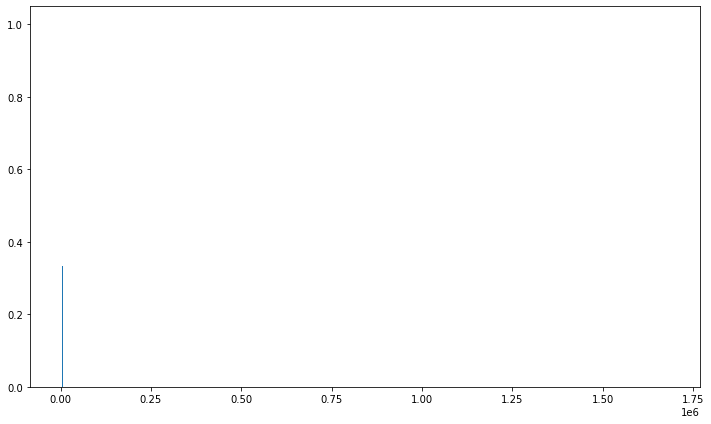

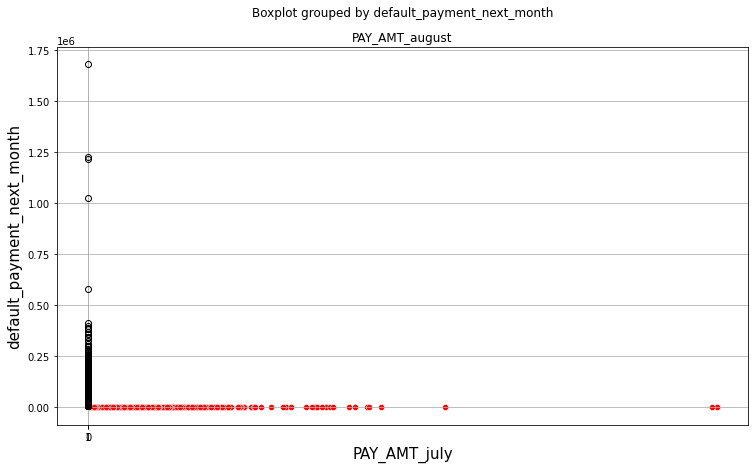

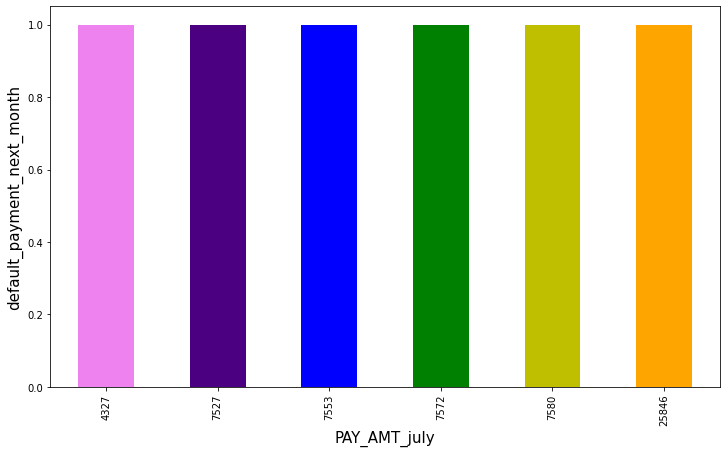

 
 
 
PAY_AMT_JUNE
 
0       6408
1000    1394
2000    1214
3000     887
5000     810
Name: PAY_AMT_june, dtype: int64
 
6937
 
PAY_AMT_june
1743     1.0
6247     1.0
18901    1.0
40710    1.0
6128     1.0
6130     1.0
6131     1.0
40200    1.0
2768     1.0
2765     1.0
Name: default_payment_next_month, dtype: float64
 


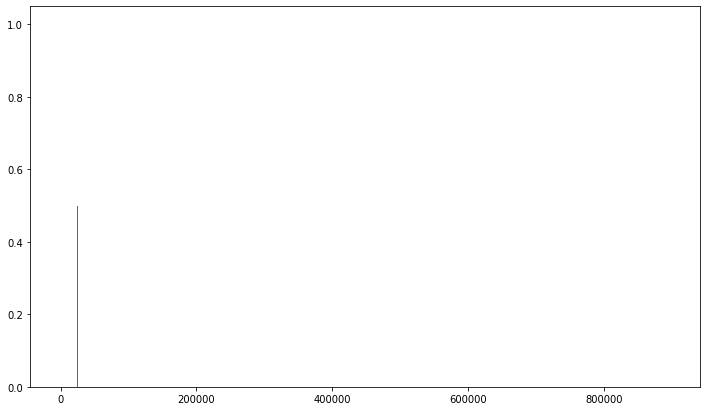

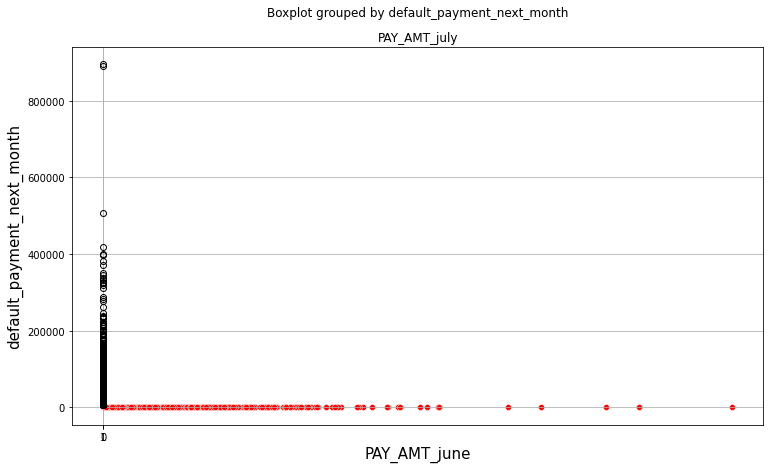

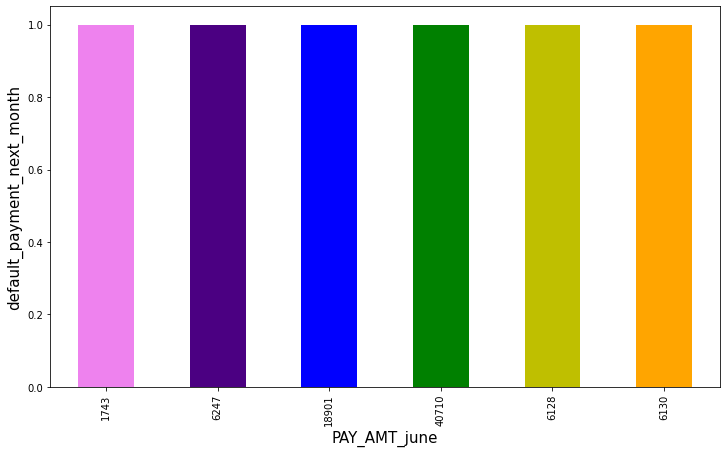

 
 
 
PAY_AMT_MAY
 
0       6703
1000    1340
2000    1323
3000     947
5000     814
Name: PAY_AMT_may, dtype: int64
 
6897
 
PAY_AMT_may
1082    1.0
6884    1.0
6821    1.0
6833    1.0
6839    1.0
1592    1.0
6850    1.0
2462    1.0
6867    1.0
6870    1.0
Name: default_payment_next_month, dtype: float64
 


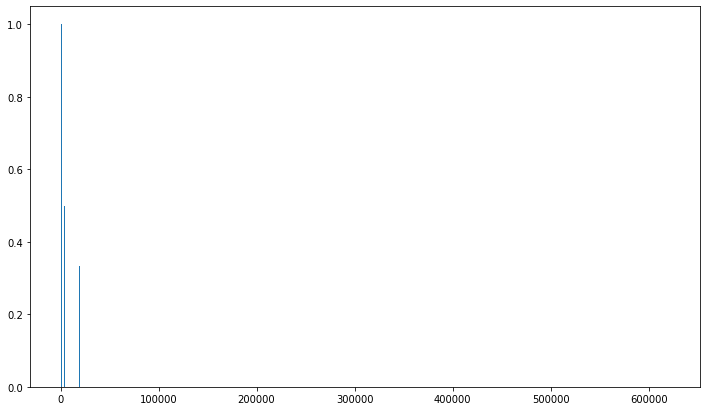

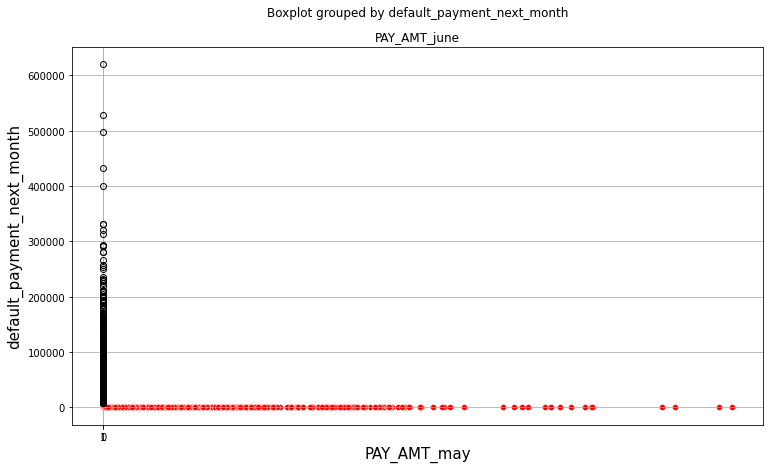

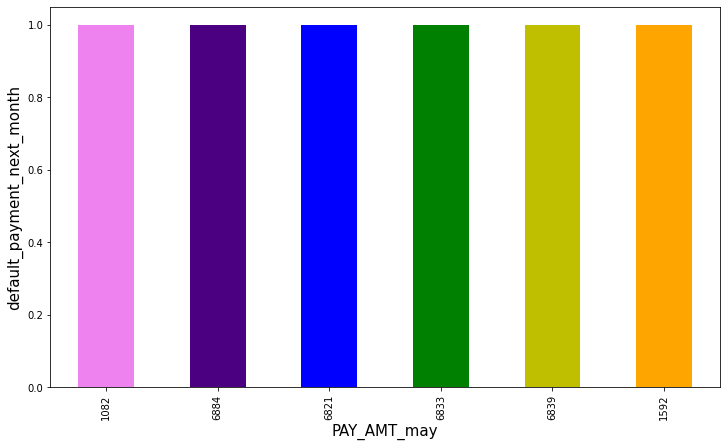

 
 
 
PAY_AMT_APRIL
 
0       7173
1000    1299
2000    1295
3000     914
5000     808
Name: PAY_AMT_april, dtype: int64
 
6939
 
PAY_AMT_april
4731     1.0
3515     1.0
21947    1.0
3563     1.0
22001    1.0
3554     1.0
22114    1.0
22127    1.0
3508     1.0
3344     1.0
Name: default_payment_next_month, dtype: float64
 


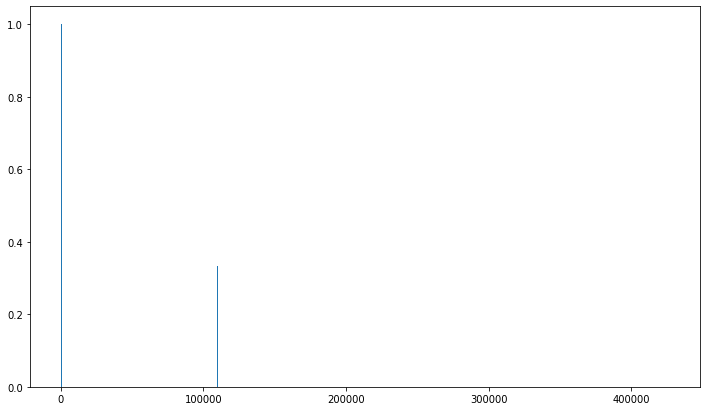

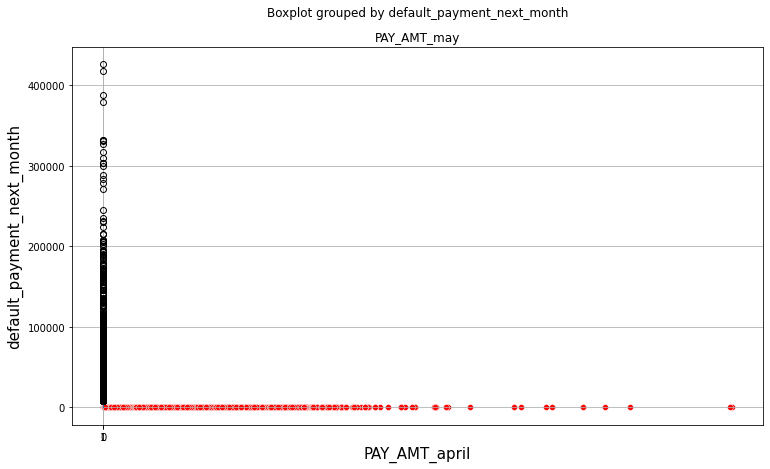

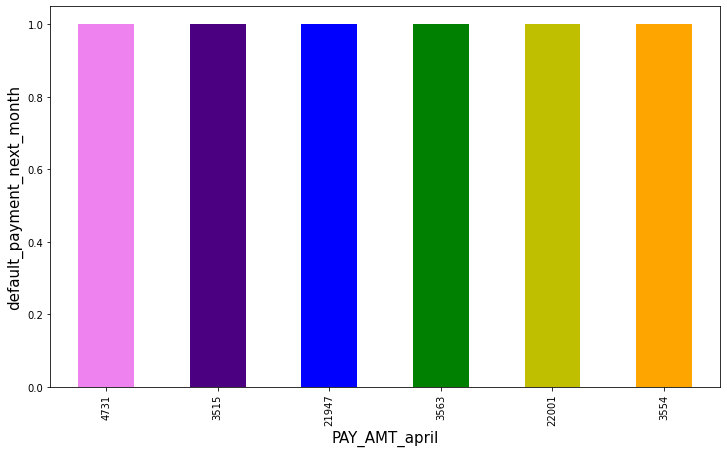

 
 
 
DEFAULT_PAYMENT_NEXT_MONTH
 
0    23364
1     6636
Name: default_payment_next_month, dtype: int64
 
2
 
default_payment_next_month
1    1
0    0
Name: default_payment_next_month, dtype: int64
 


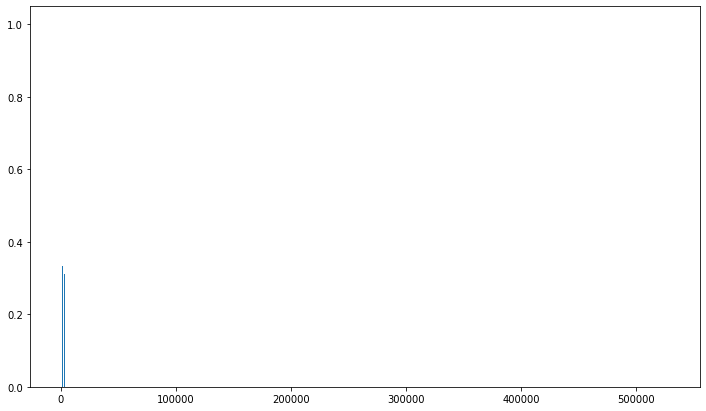

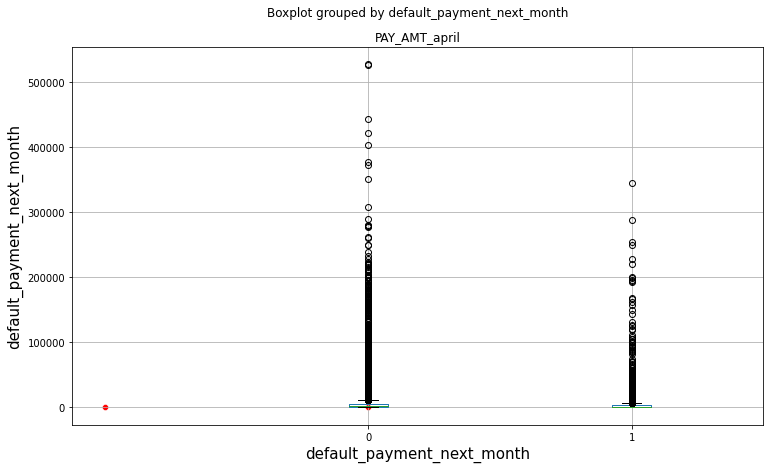

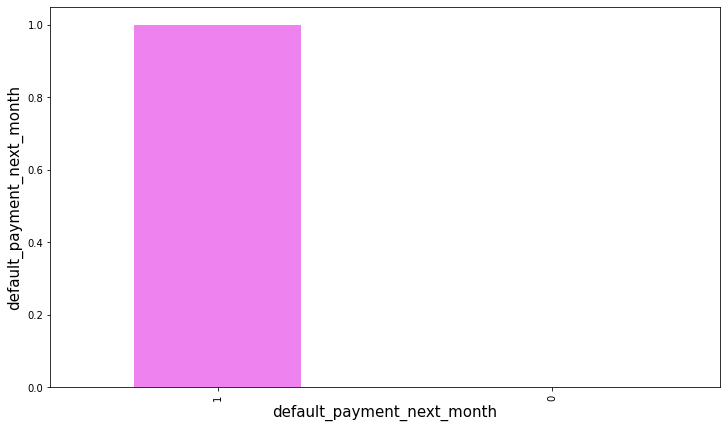

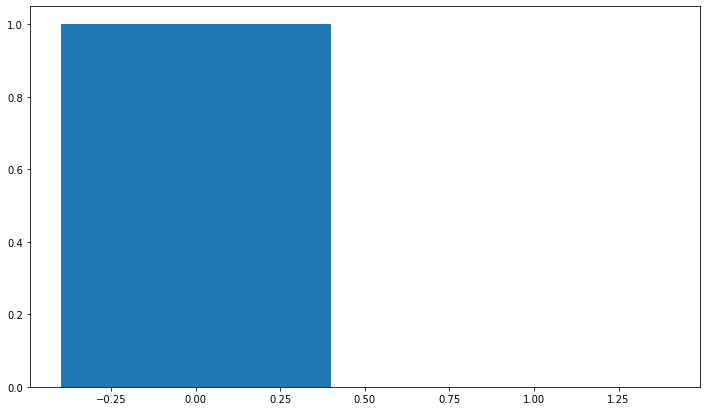

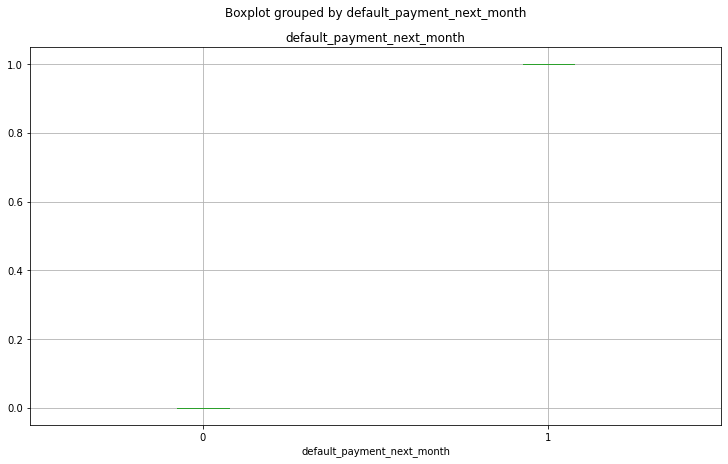

In [772]:
for column in dataset.columns:
  column_wise_analysis(dataset,column)


In [773]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'PAY_july', 'PAY_june', 'PAY_may',
       'PAY_april', 'BILL_AMT_september', 'BILL_AMT_august', 'BILL_AMT_july',
       'BILL_AMT_june', 'BILL_AMT_may', 'BILL_AMT_april', 'PAY_AMT_september',
       'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june', 'PAY_AMT_may',
       'PAY_AMT_april', 'default_payment_next_month'],
      dtype='object')

Gender= 1


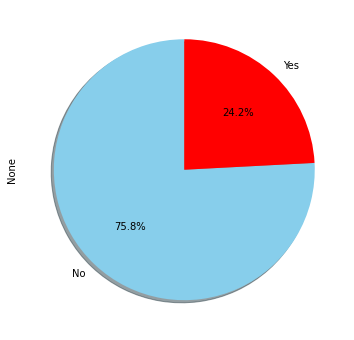

Gender= 2


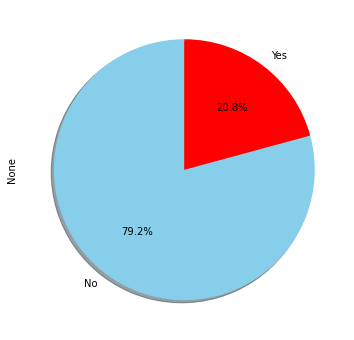

In [774]:
for i in [1,2]:
  print("Gender=",i)
  dataset[dataset['SEX']==i].loc[:,['default_payment_next_month']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )
  plt.show()

Education= 1


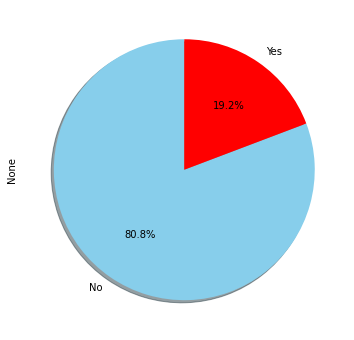

Education= 2


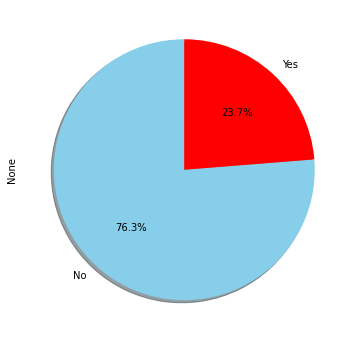

Education= 3


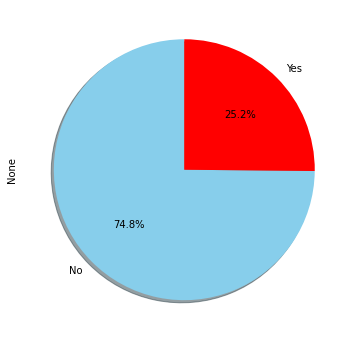

Education= 4


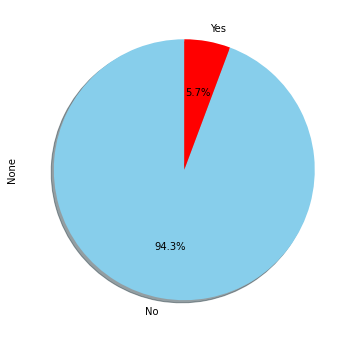

In [775]:
for i in [1,2,3,4]:
  print("Education=",i)
  dataset[dataset['EDUCATION']==i].loc[:,['default_payment_next_month']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )
  plt.show()

Marriage = 1


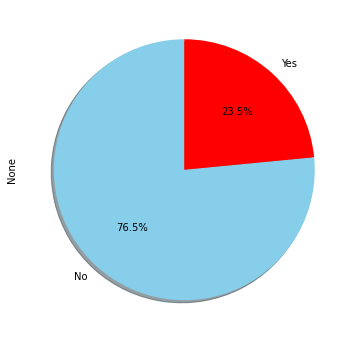

Marriage = 2


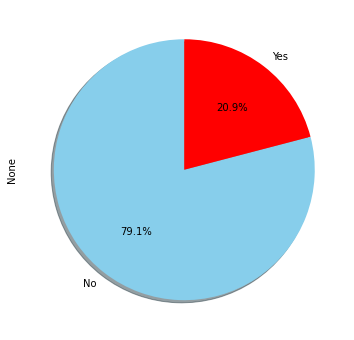

Marriage = 3


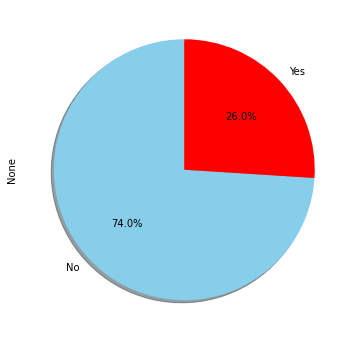

In [776]:
for i in [1,2,3]:
  print("Marriage =",i)
  dataset[dataset['MARRIAGE']==i].loc[:,['default_payment_next_month']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )
  plt.show()

PAY_september = -1


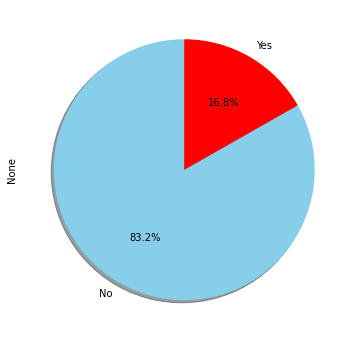

PAY_august = -1


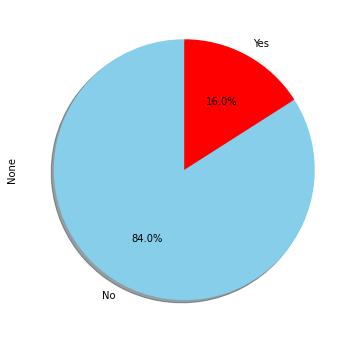

PAY_july = -1


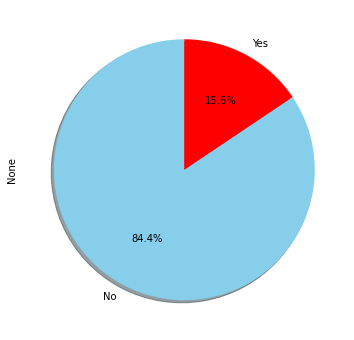

PAY_june = -1


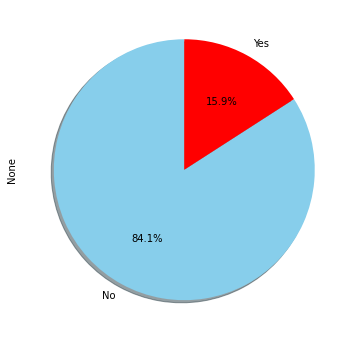

PAY_may = -1


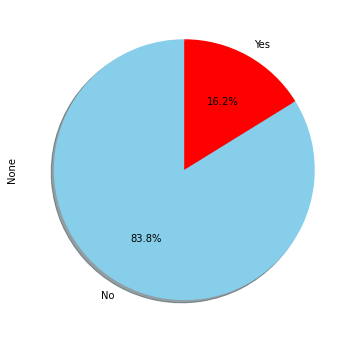

PAY_april = -1


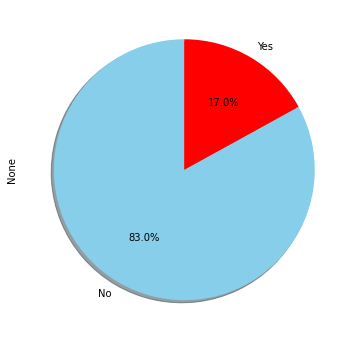

PAY_september = 0


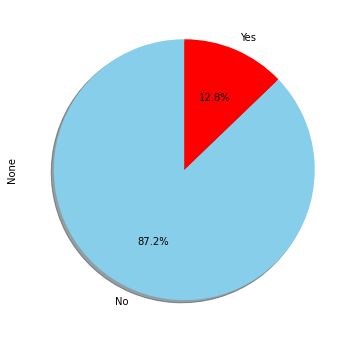

PAY_august = 0


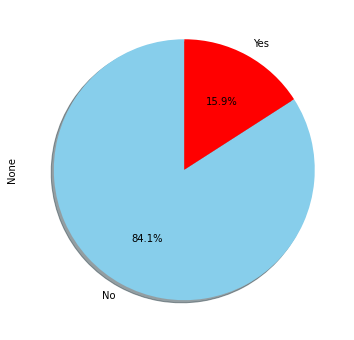

PAY_july = 0


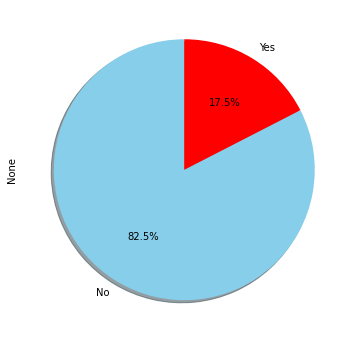

PAY_june = 0


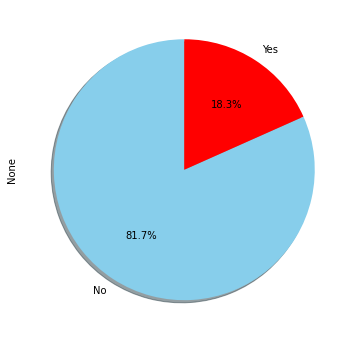

PAY_may = 0


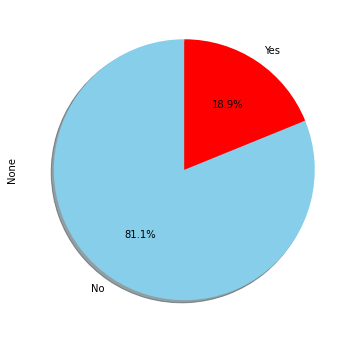

PAY_april = 0


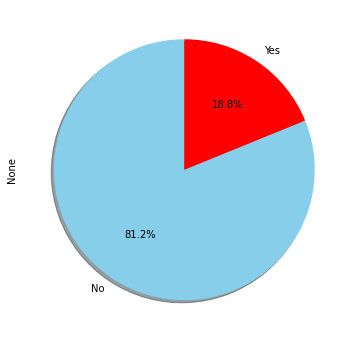

PAY_september = 1


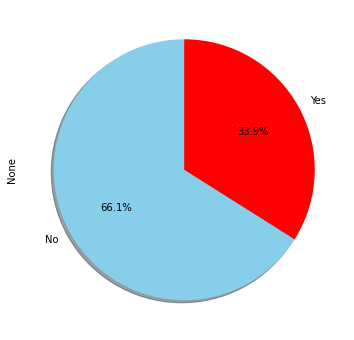

PAY_august = 1


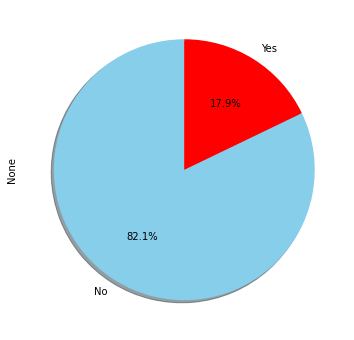

PAY_july = 1


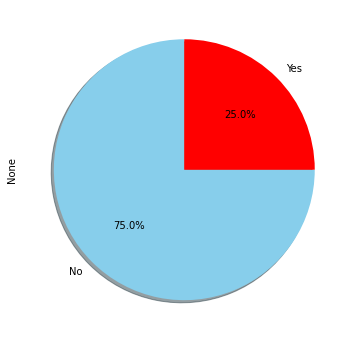

PAY_june = 1


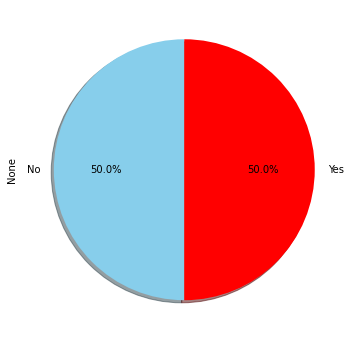

PAY_may = 1


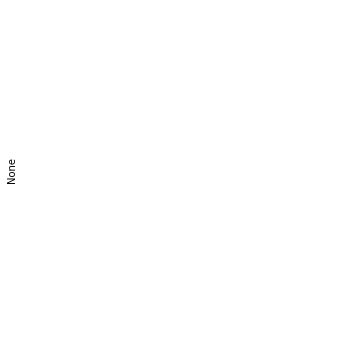

PAY_april = 1


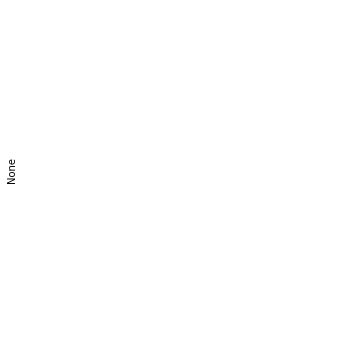

PAY_september = 2


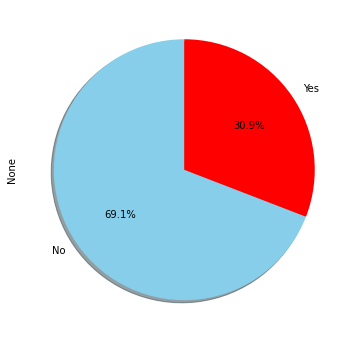

PAY_august = 2


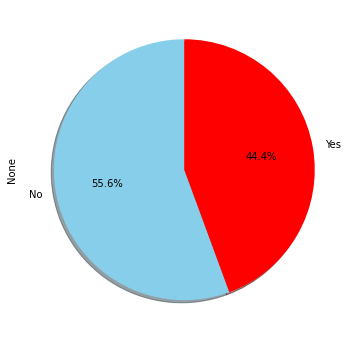

PAY_july = 2


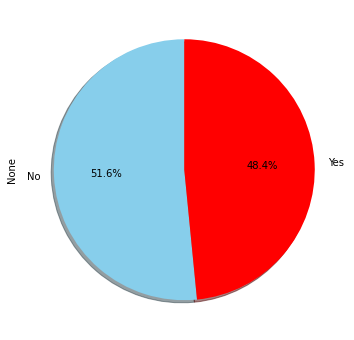

PAY_june = 2


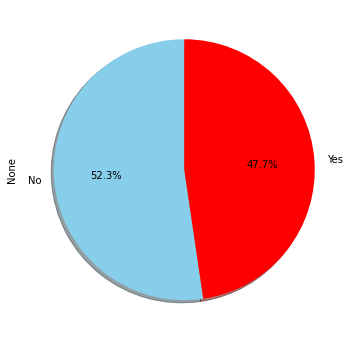

PAY_may = 2


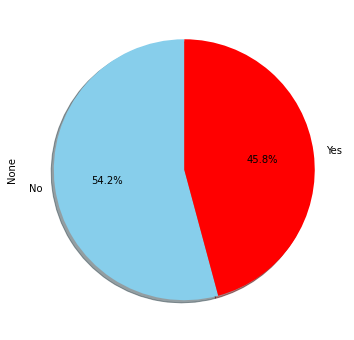

PAY_april = 2


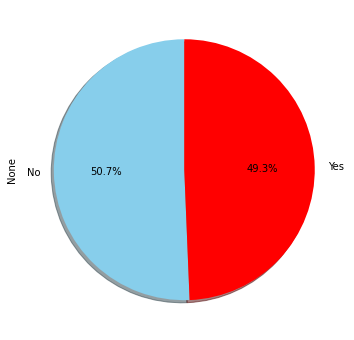

PAY_september = 3


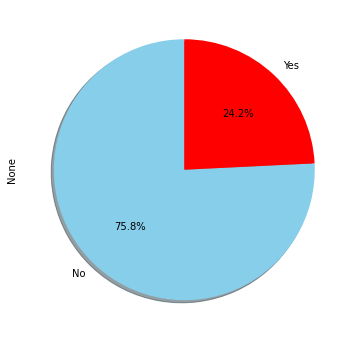

PAY_august = 3


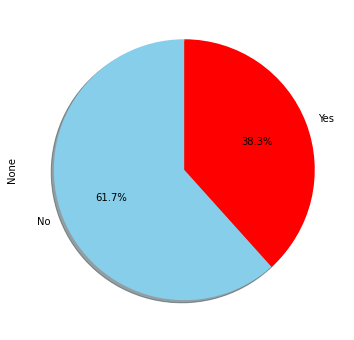

PAY_july = 3


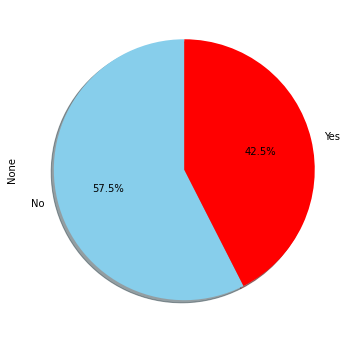

PAY_june = 3


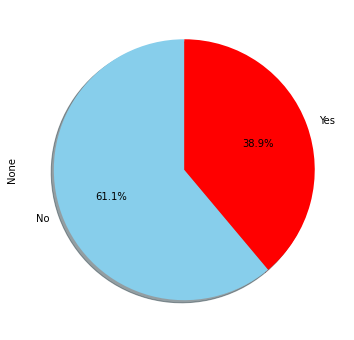

PAY_may = 3


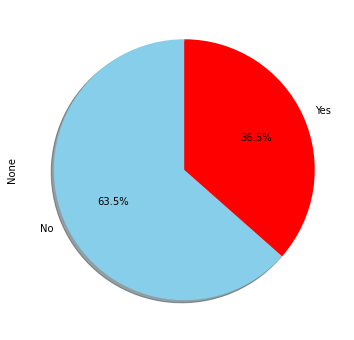

PAY_april = 3


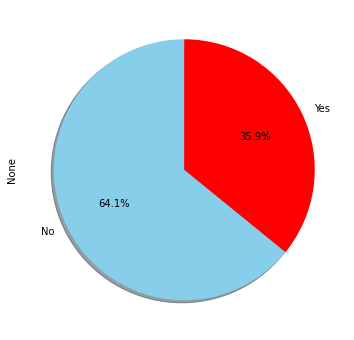

PAY_september = 4


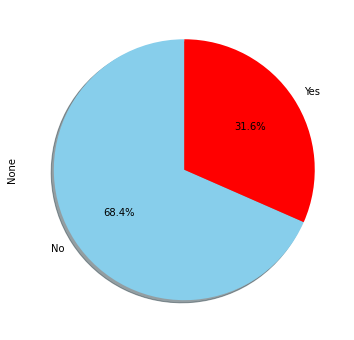

PAY_august = 4


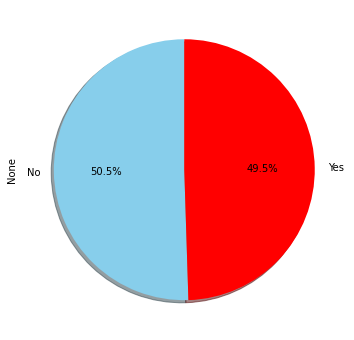

PAY_july = 4


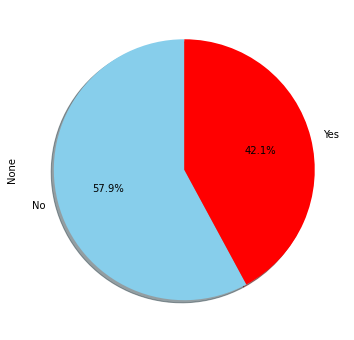

PAY_june = 4


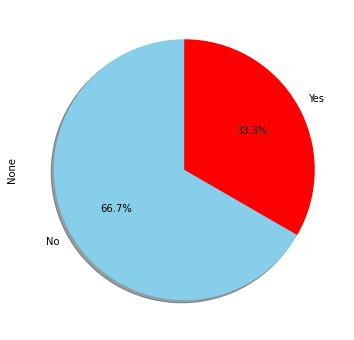

PAY_may = 4


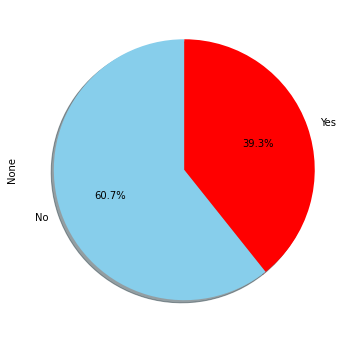

PAY_april = 4


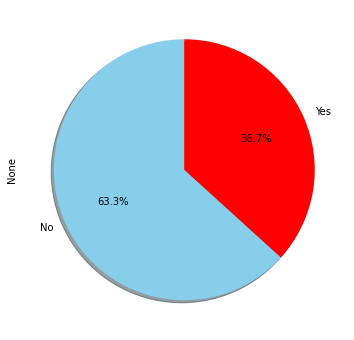

PAY_september = 5


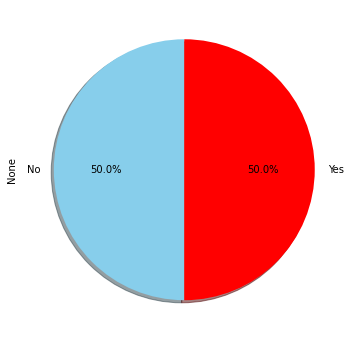

PAY_august = 5


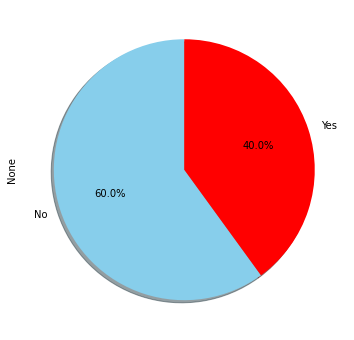

PAY_july = 5


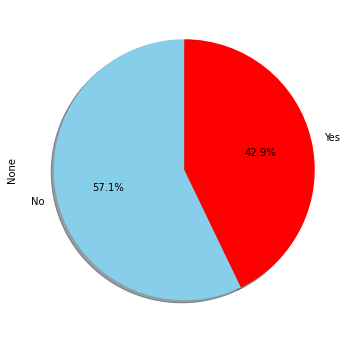

PAY_june = 5


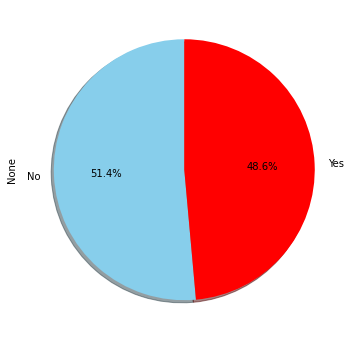

PAY_may = 5


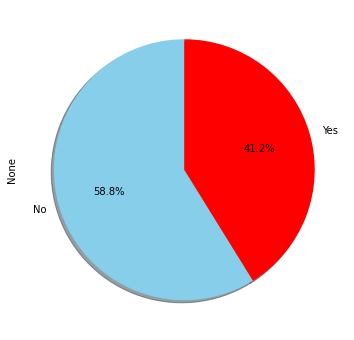

PAY_april = 5


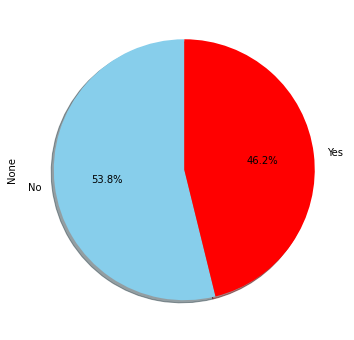

PAY_september = 6


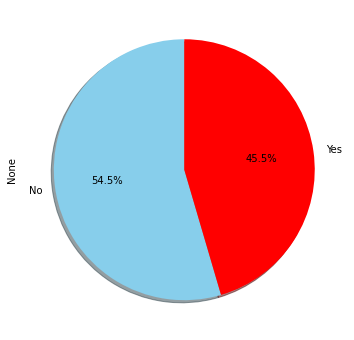

PAY_august = 6


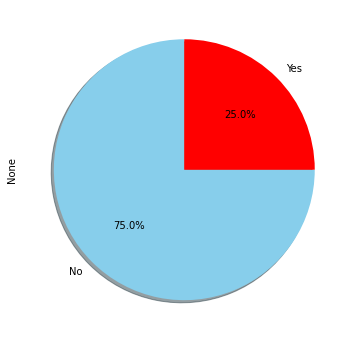

PAY_july = 6


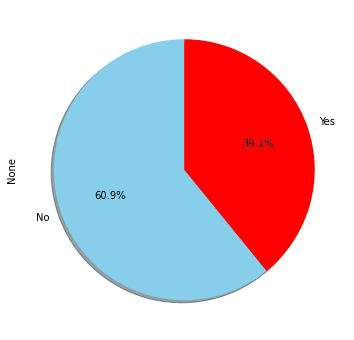

PAY_june = 6


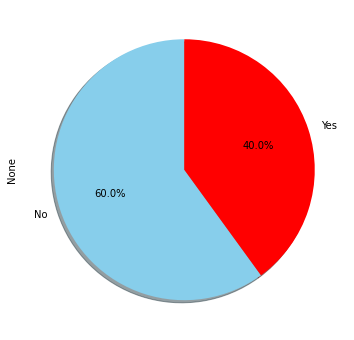

PAY_may = 6


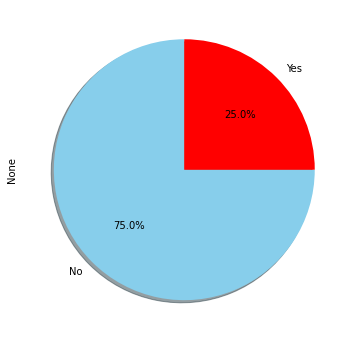

PAY_april = 6


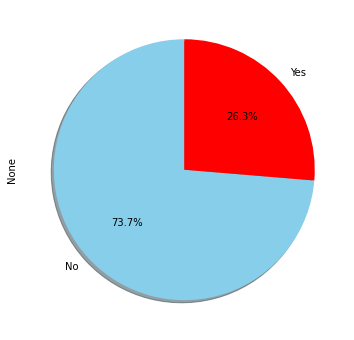

PAY_september = 7


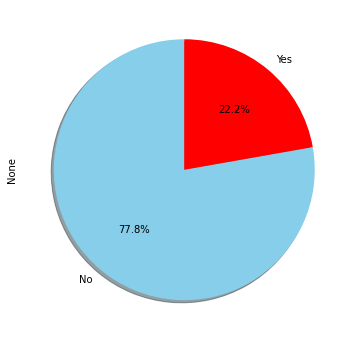

PAY_august = 7


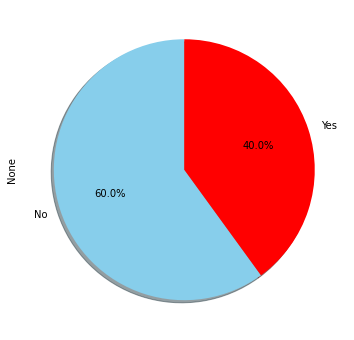

PAY_july = 7


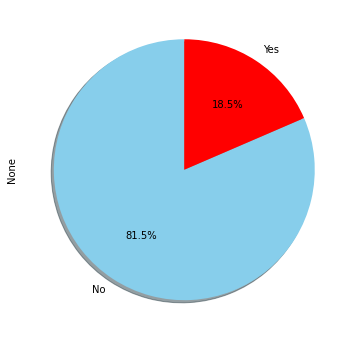

PAY_june = 7


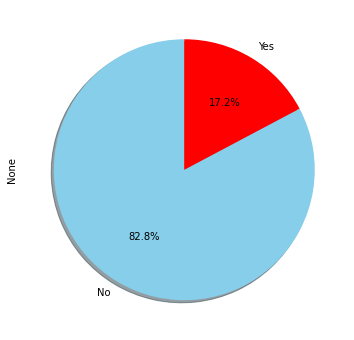

PAY_may = 7


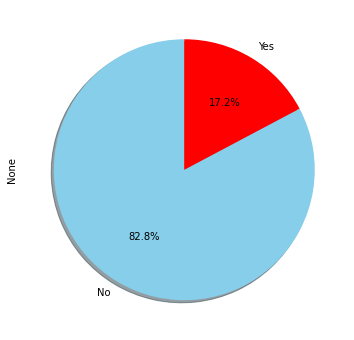

PAY_april = 7


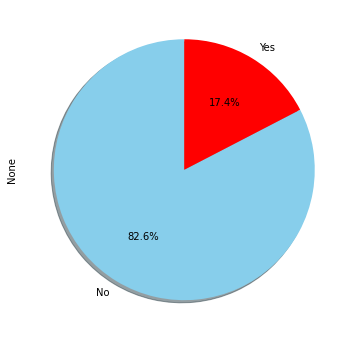

PAY_september = 8


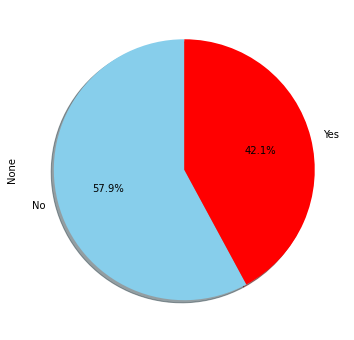

PAY_august = 8


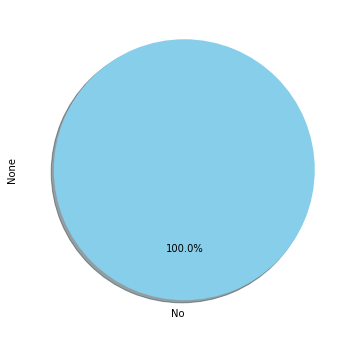

PAY_july = 8


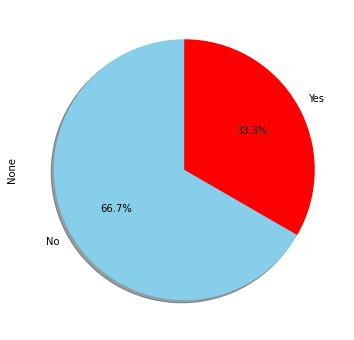

PAY_june = 8


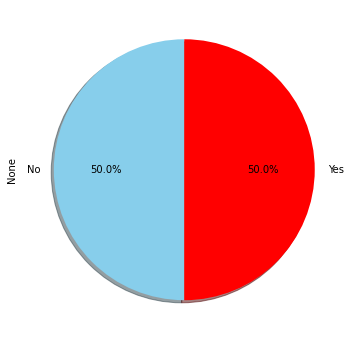

PAY_may = 8


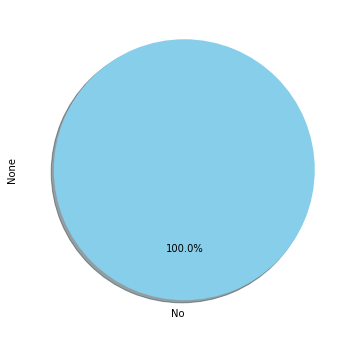

PAY_april = 8


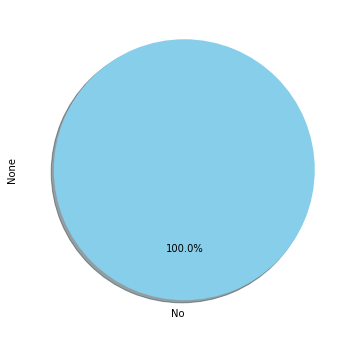

PAY_september = 9


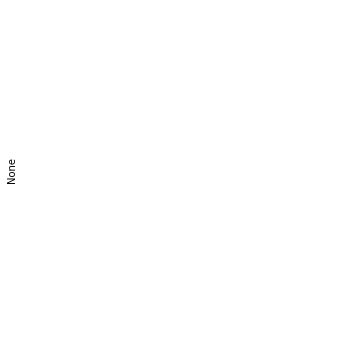

PAY_august = 9


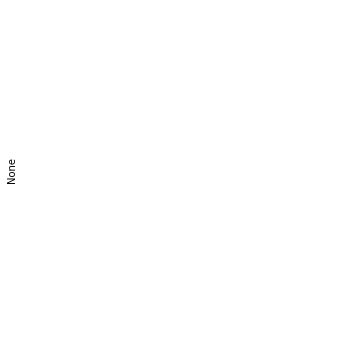

PAY_july = 9


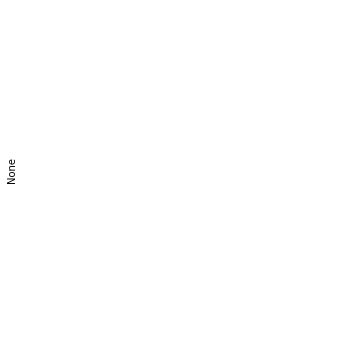

PAY_june = 9


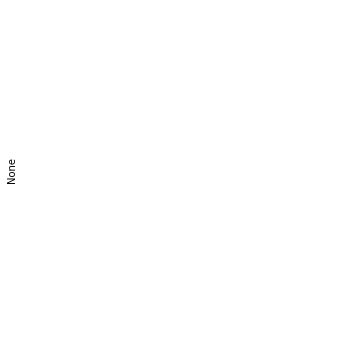

PAY_may = 9


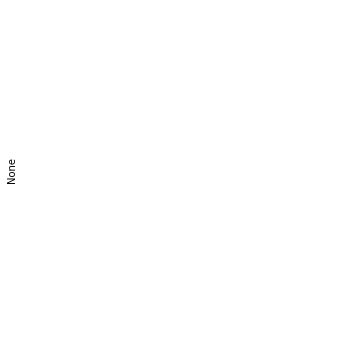

PAY_april = 9


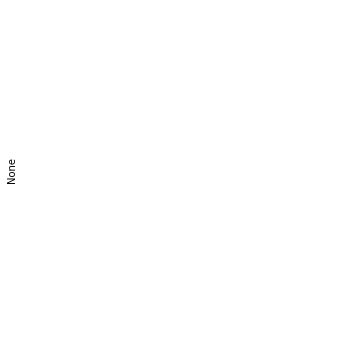

PAY_september = 10


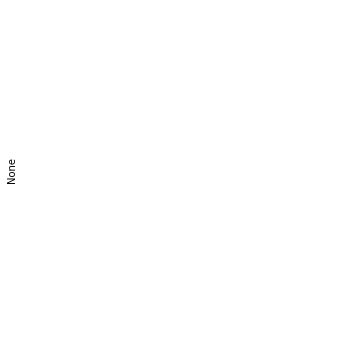

PAY_august = 10


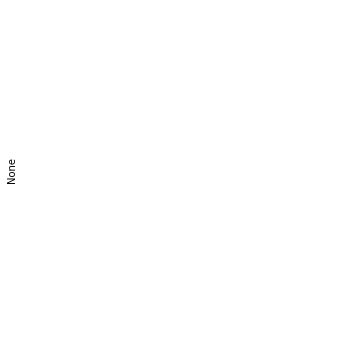

PAY_july = 10


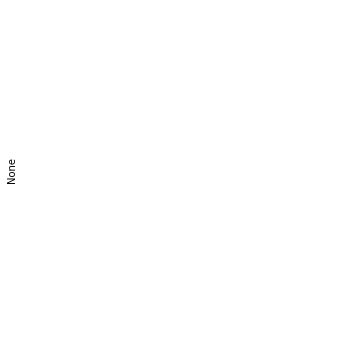

PAY_june = 10


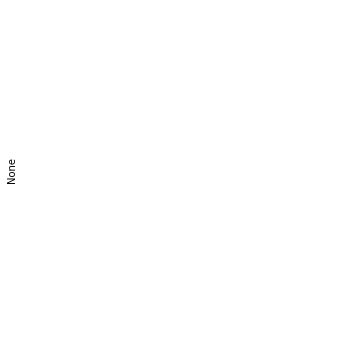

PAY_may = 10


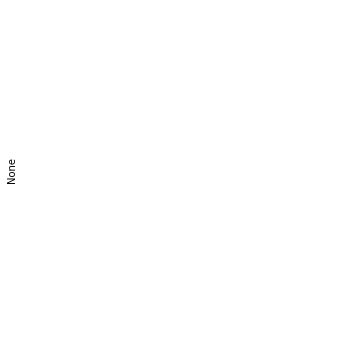

PAY_april = 10


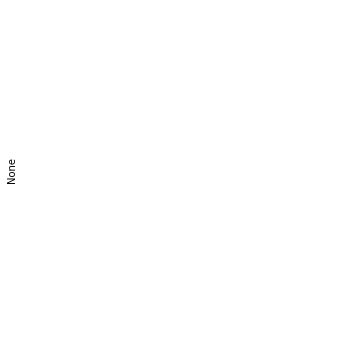

In [777]:
for i in range(-1,11):
  for j in ['PAY_september', 'PAY_august', 'PAY_july', 'PAY_june', 'PAY_may',
       'PAY_april']:
        print(j,"=",i)
        dataset[dataset[j]==i].loc[:,['default_payment_next_month']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                              
                              )
        plt.show()


## **Handling Numeric Features**

In [778]:
numerical_features


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'PAY_july', 'PAY_june', 'PAY_may',
       'PAY_april', 'BILL_AMT_september', 'BILL_AMT_august', 'BILL_AMT_july',
       'BILL_AMT_june', 'BILL_AMT_may', 'BILL_AMT_april', 'PAY_AMT_september',
       'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june', 'PAY_AMT_may',
       'PAY_AMT_april', 'default_payment_next_month'],
      dtype='object')

**Univariate Analysis**

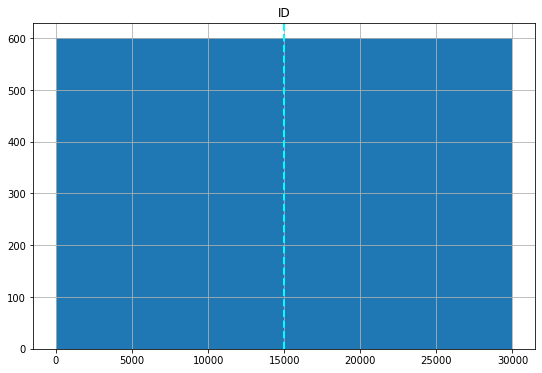

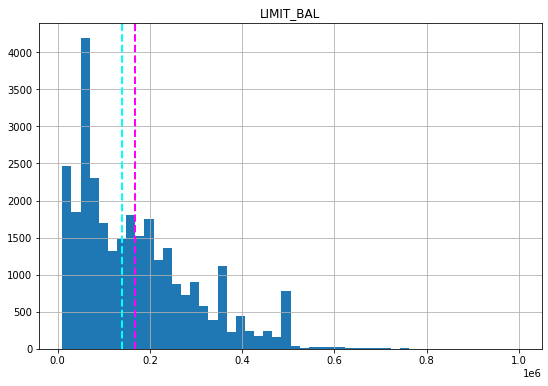

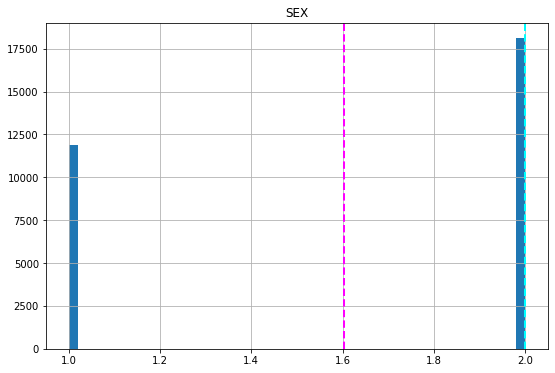

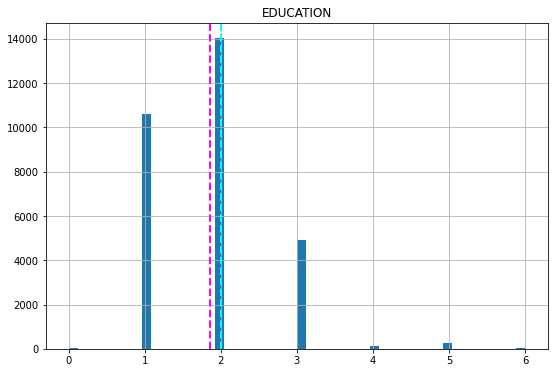

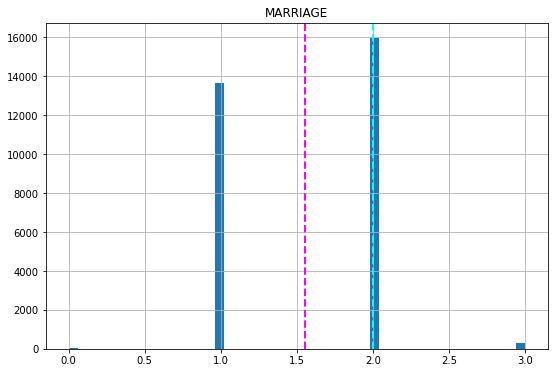

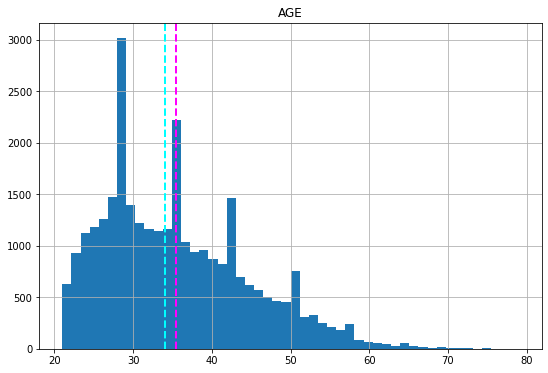

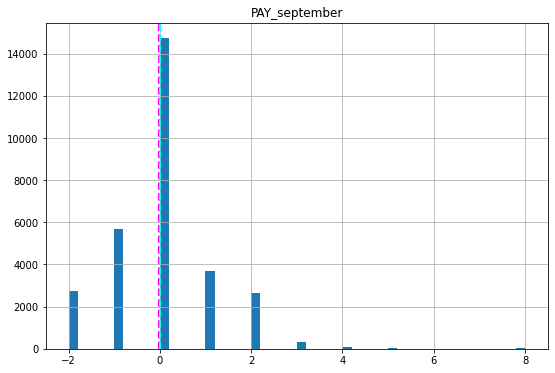

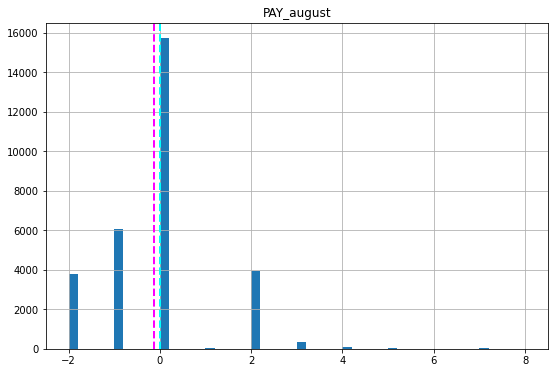

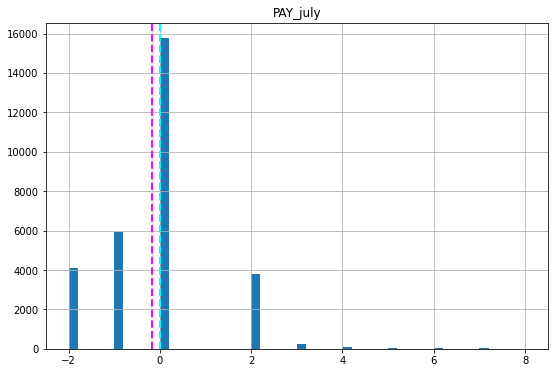

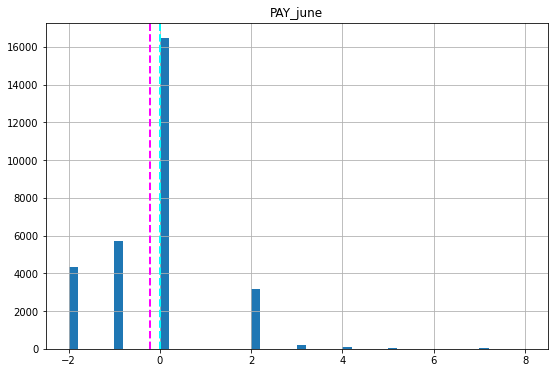

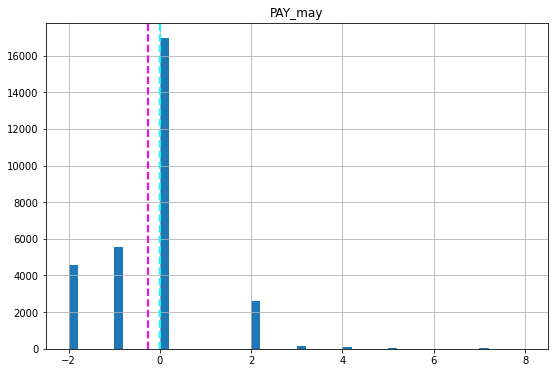

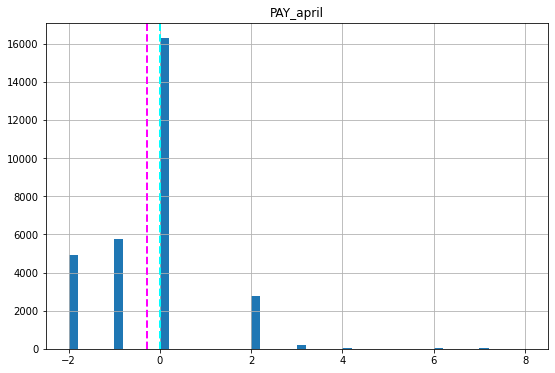

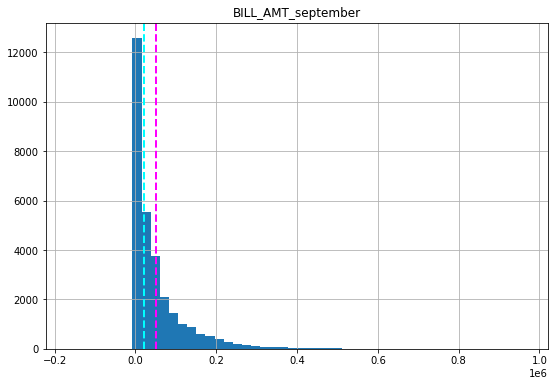

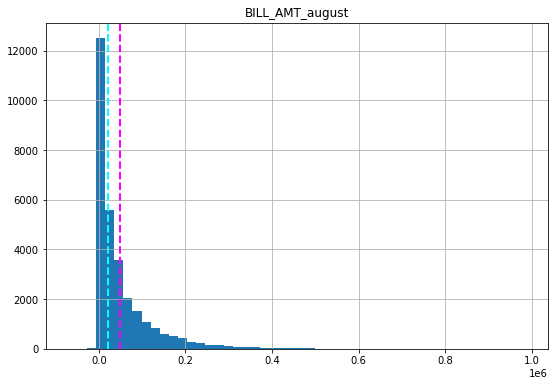

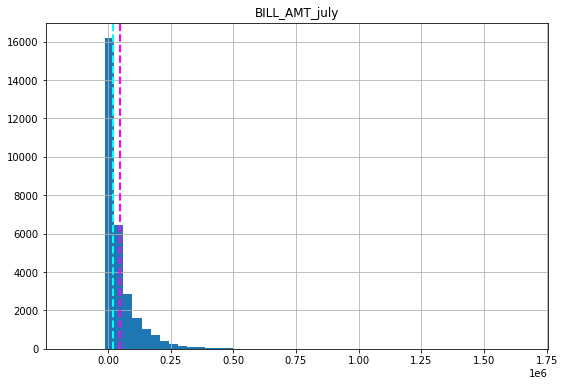

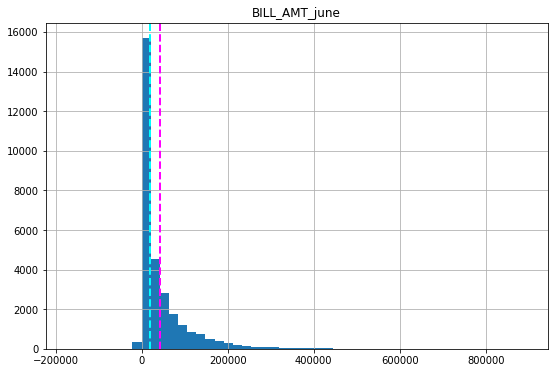

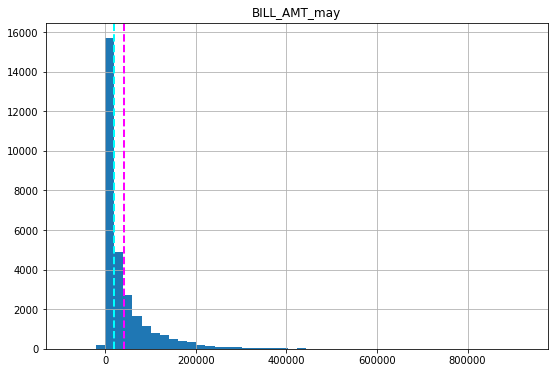

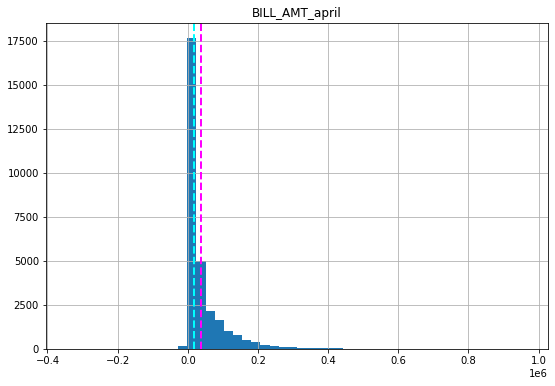

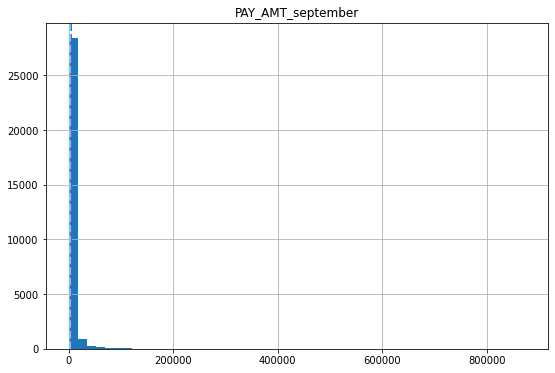

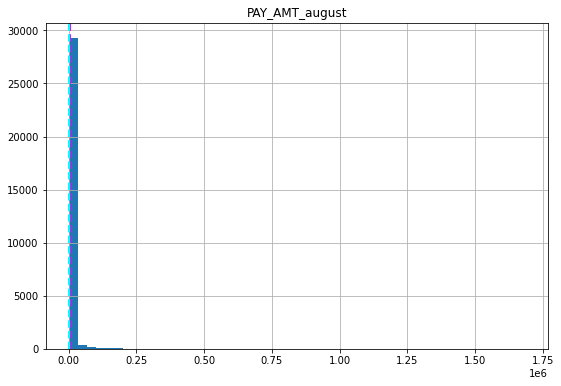

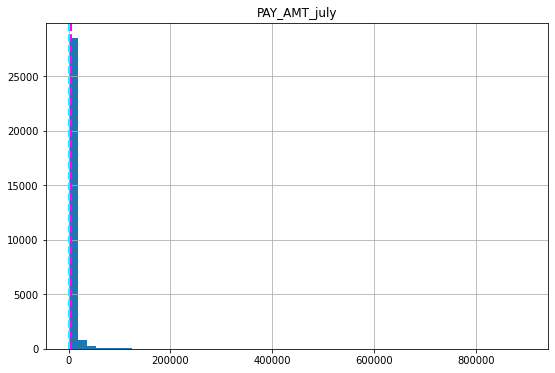

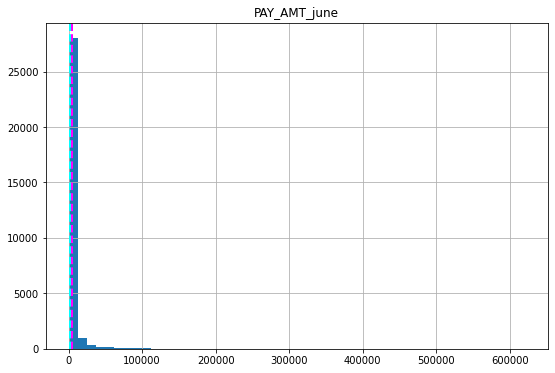

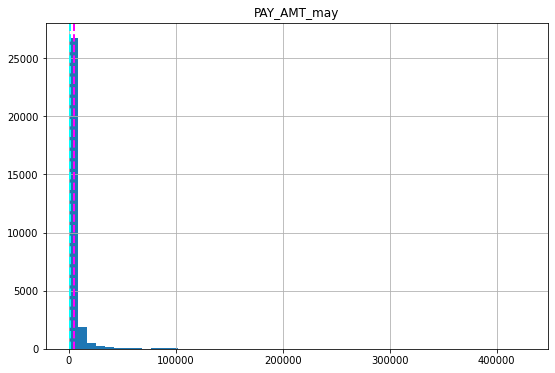

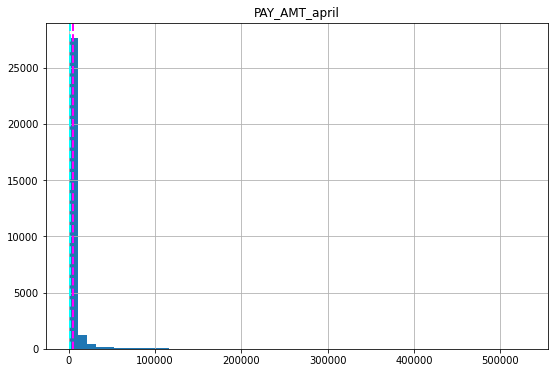

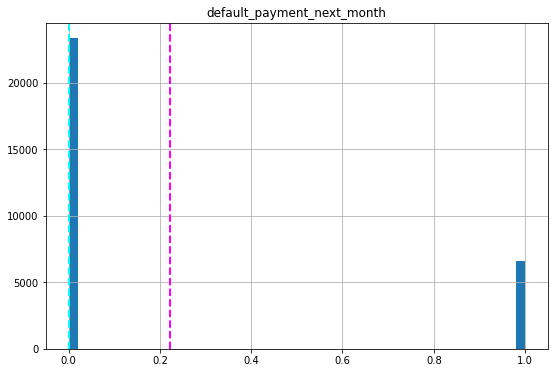

In [779]:
#plot a bar plot for each numerical feature count with Hist Plot (except car_ID)
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (dataset[col])
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

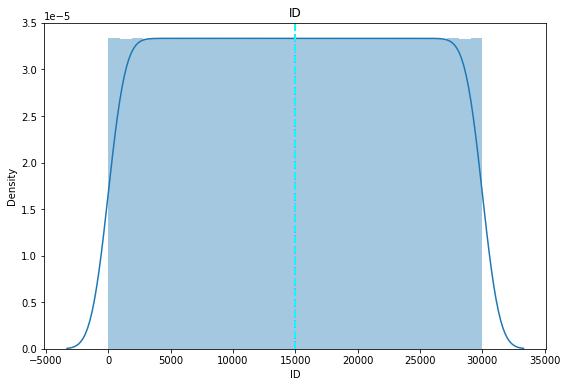

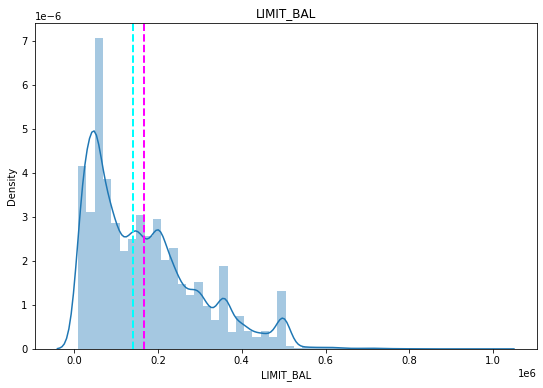

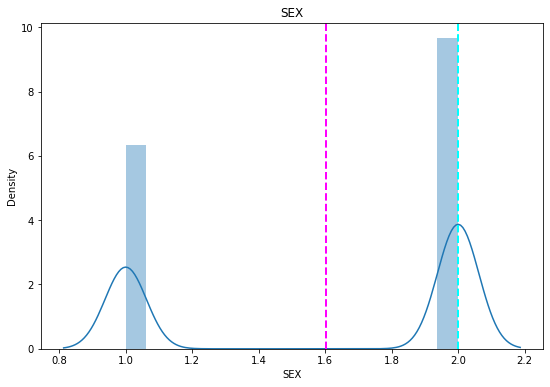

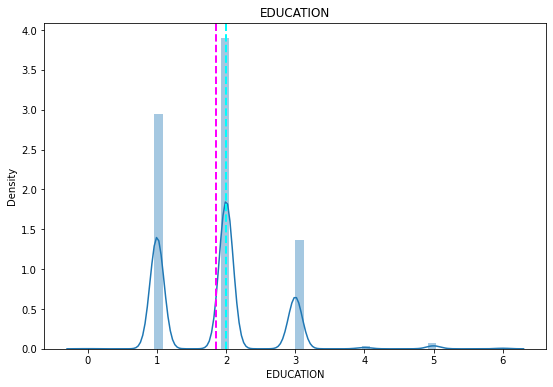

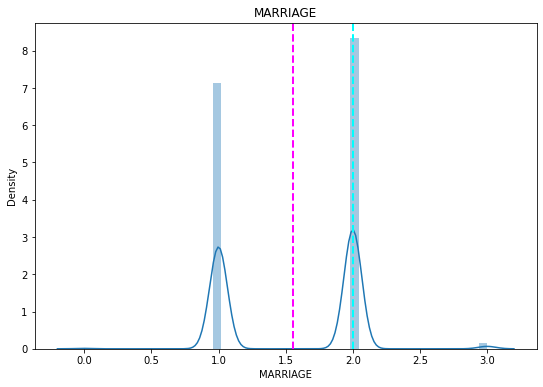

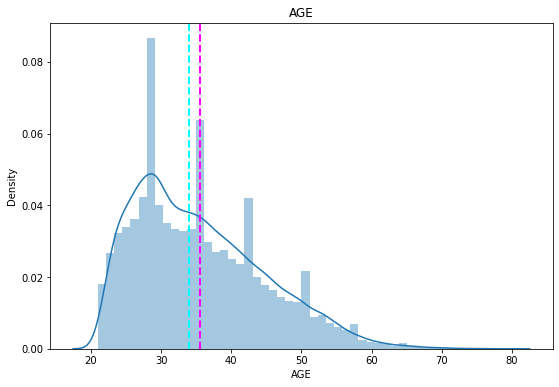

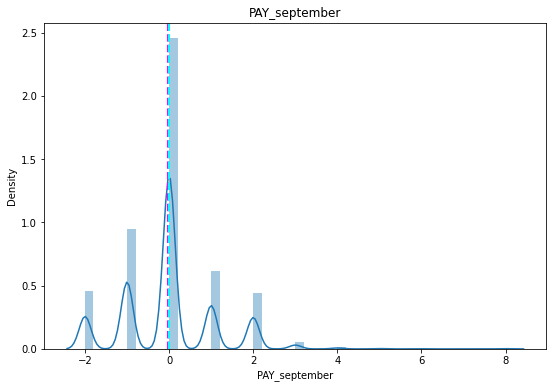

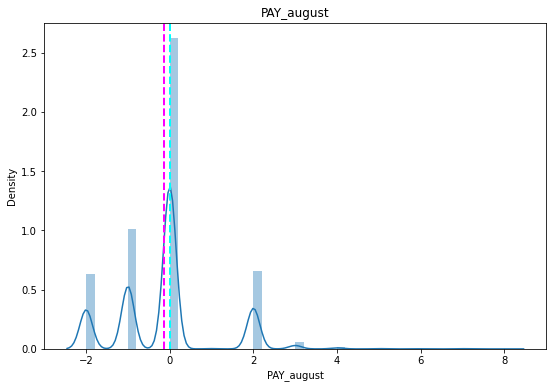

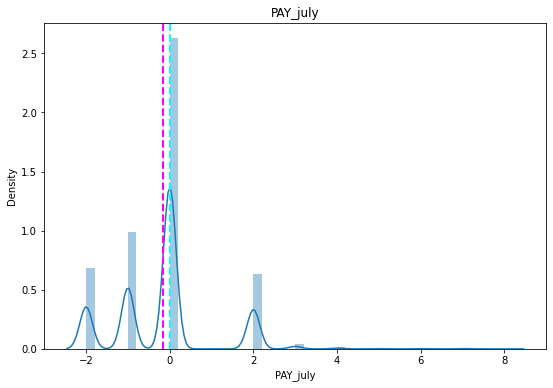

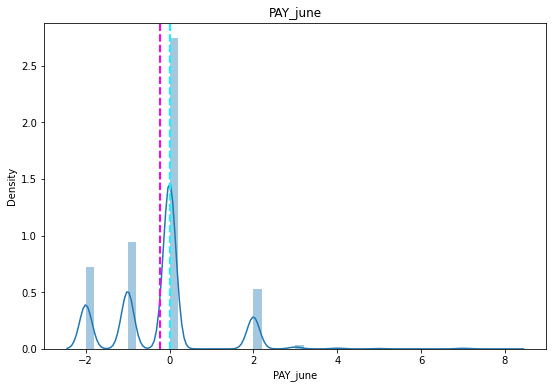

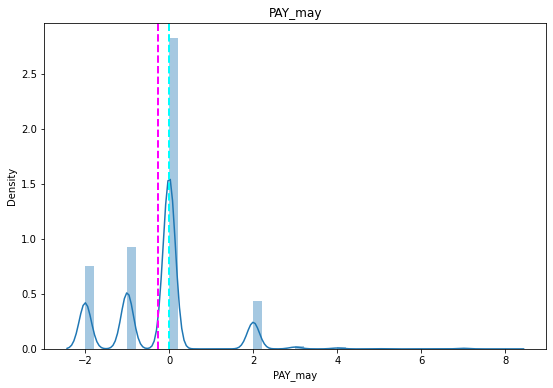

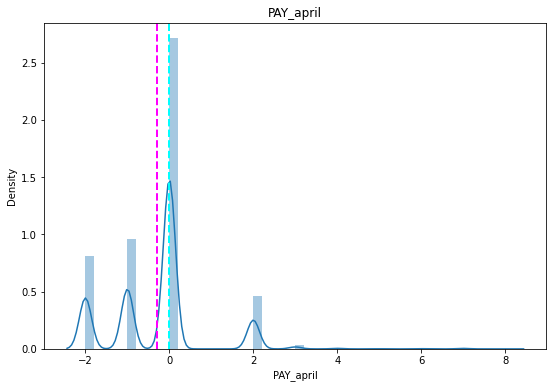

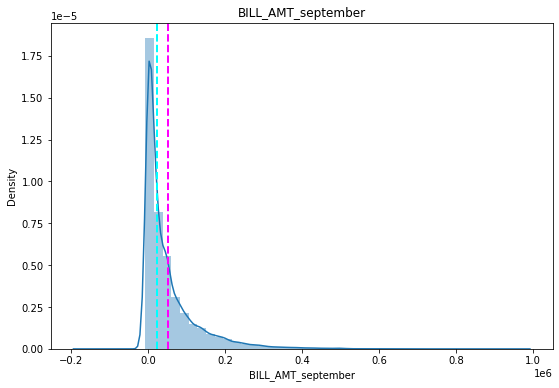

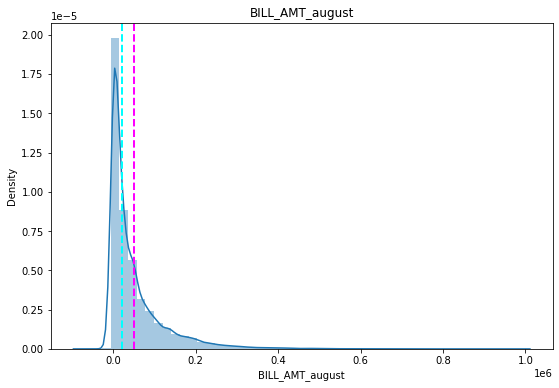

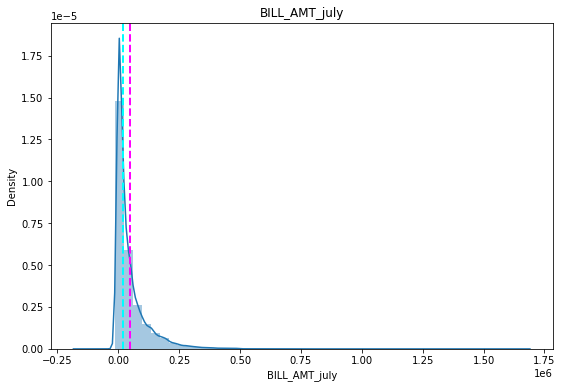

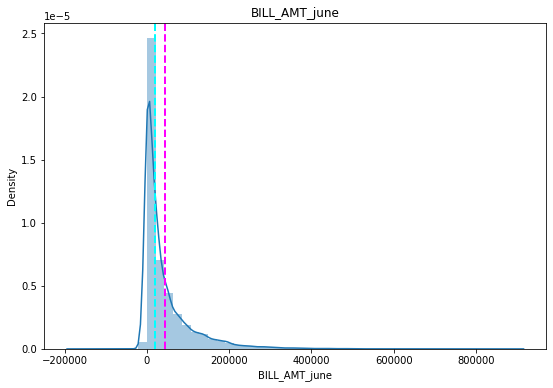

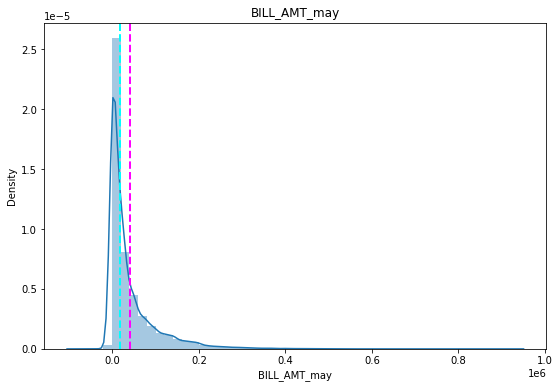

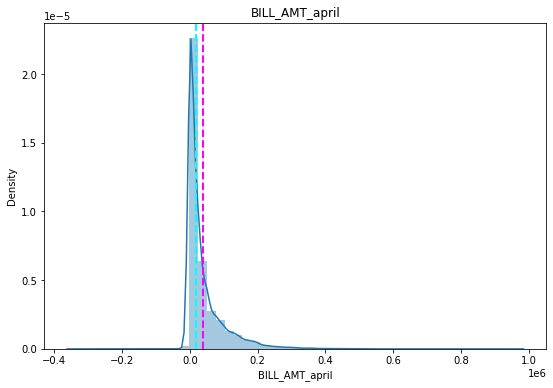

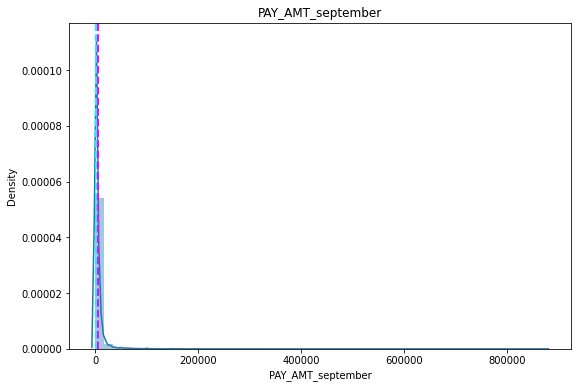

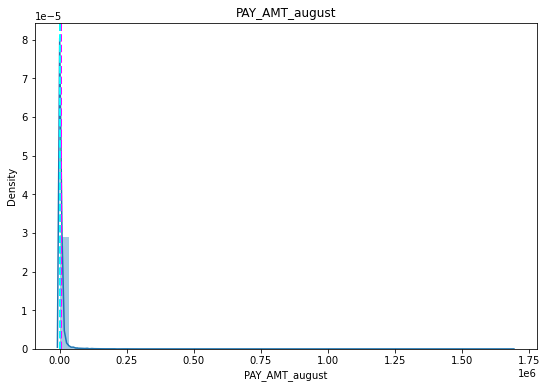

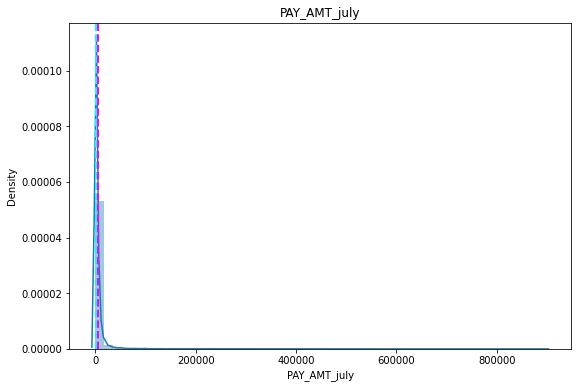

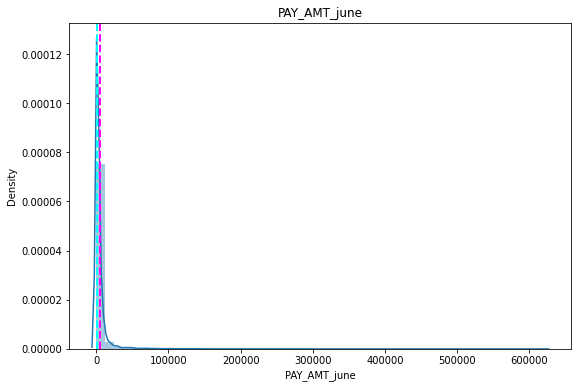

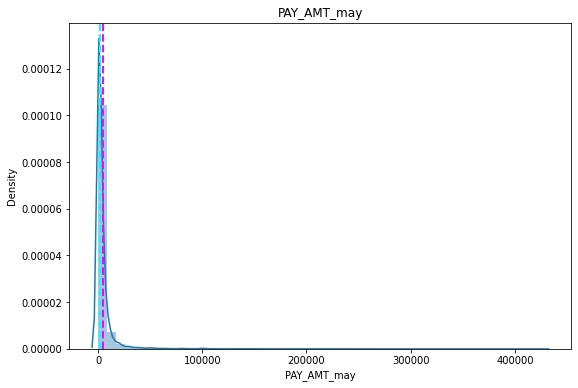

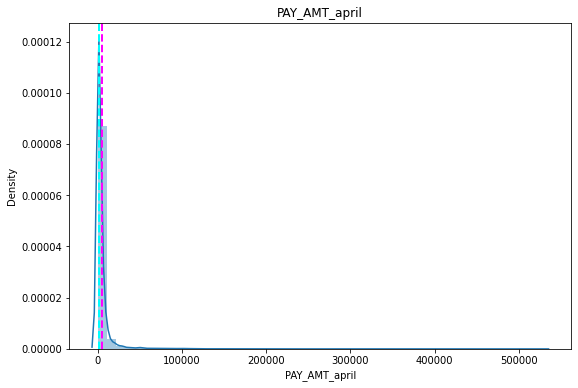

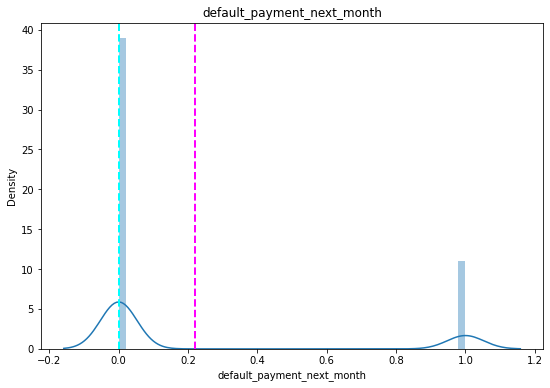

In [780]:
#plot a bar plot for each numerical feature count with Dist Plot (except Car_ID)
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (dataset[col])
  sns.distplot(dataset[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

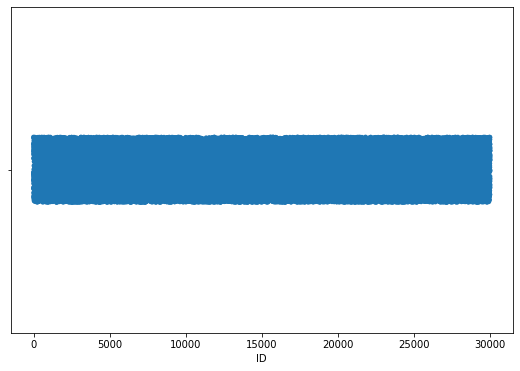

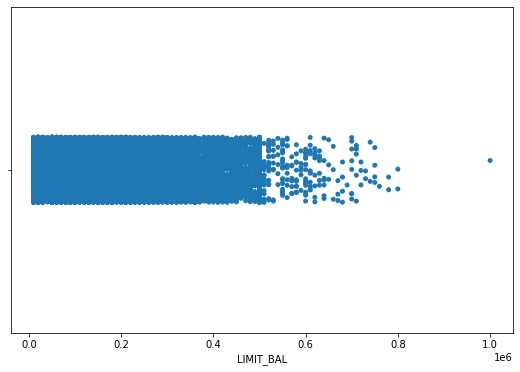

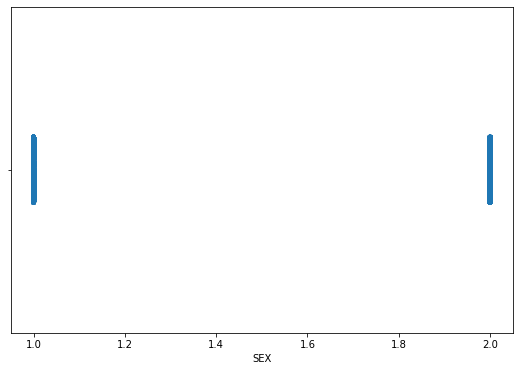

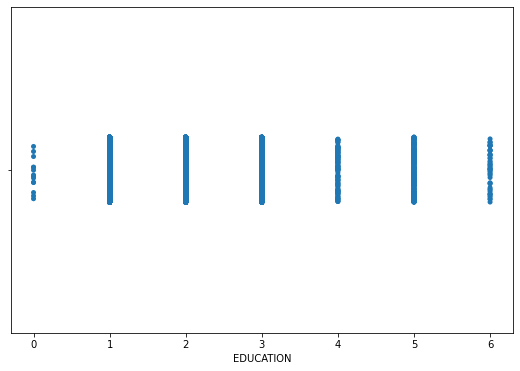

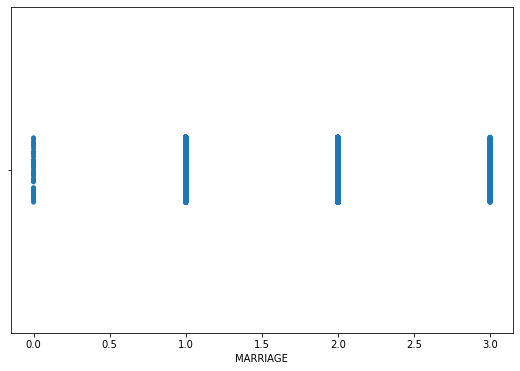

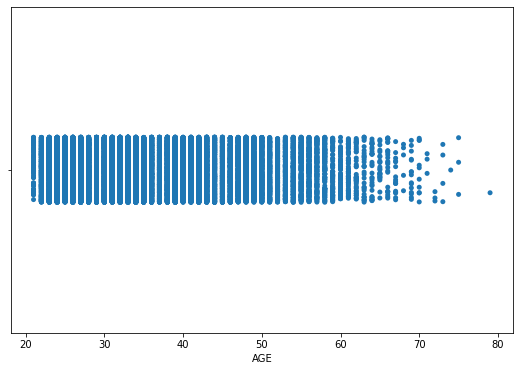

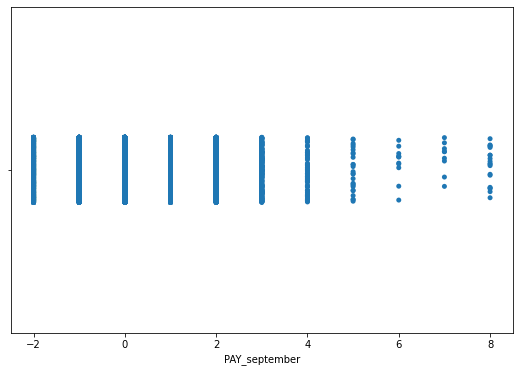

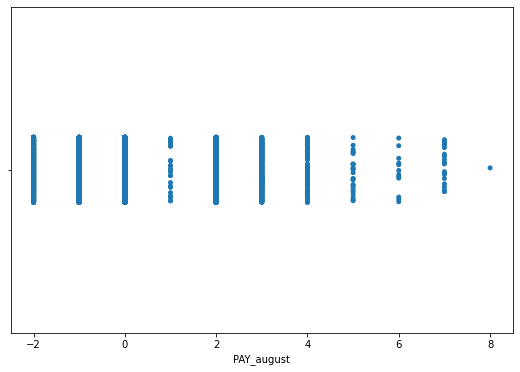

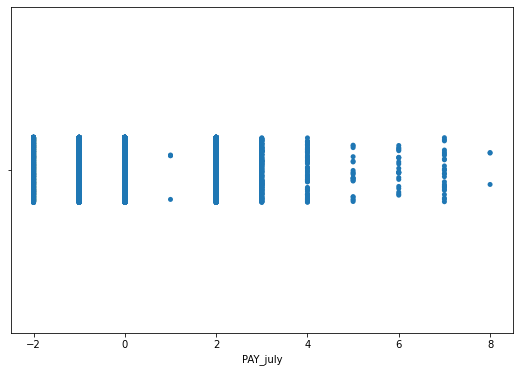

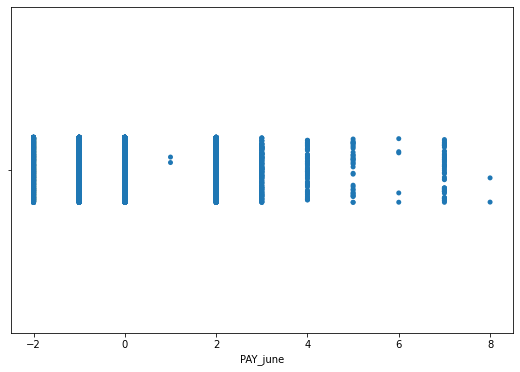

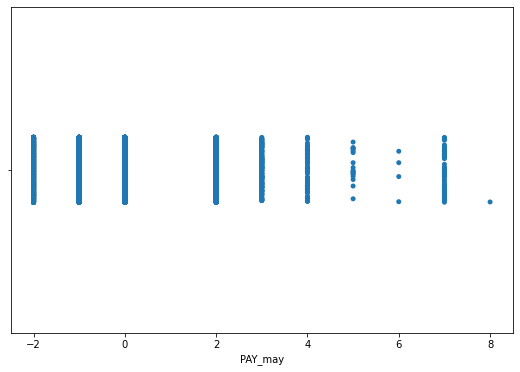

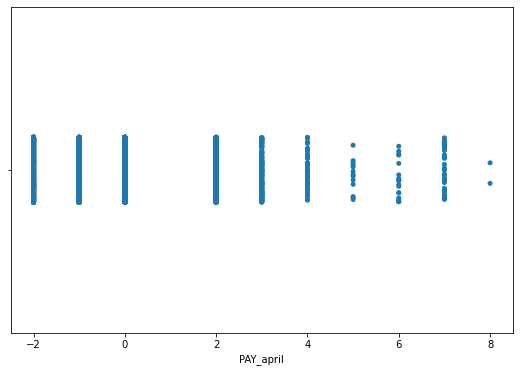

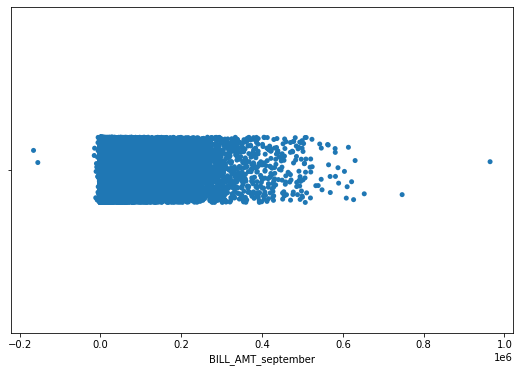

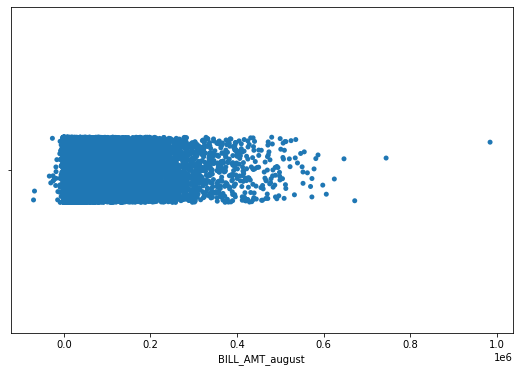

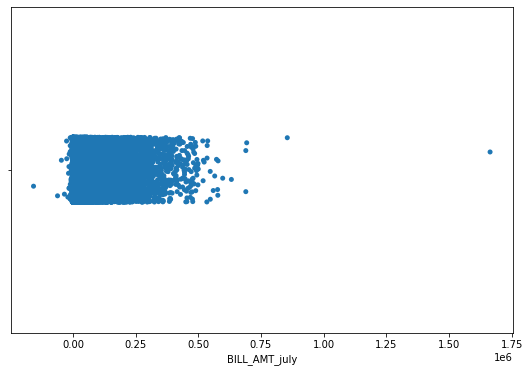

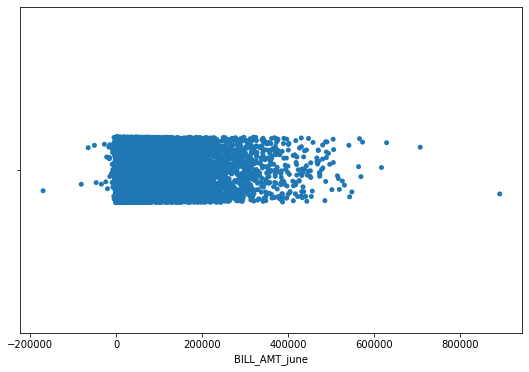

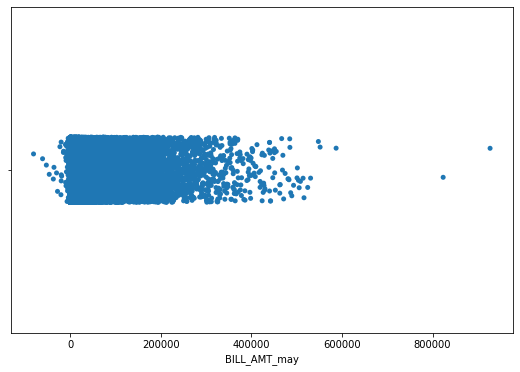

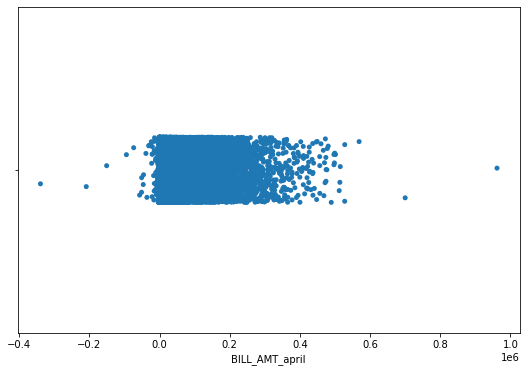

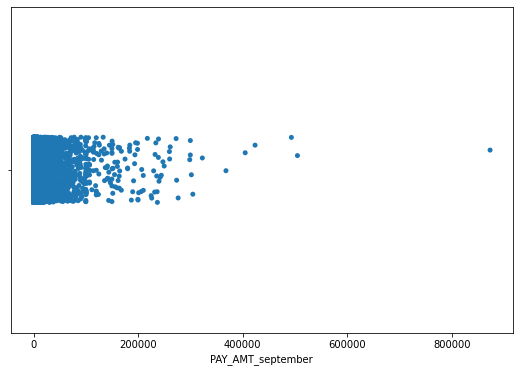

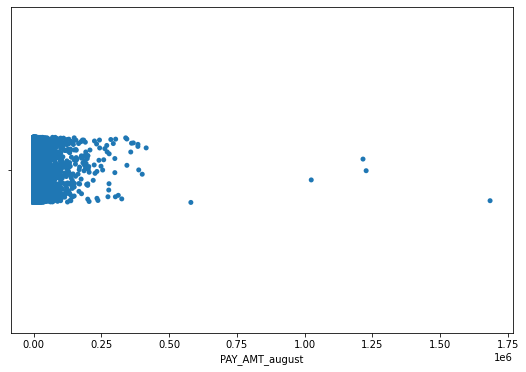

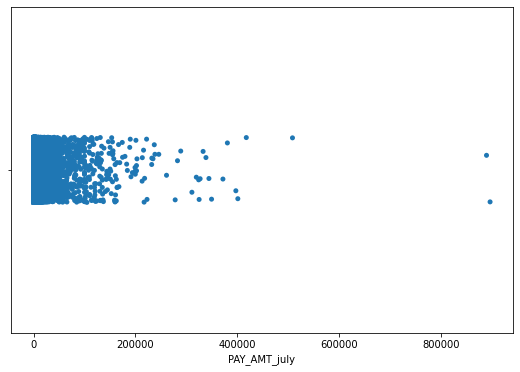

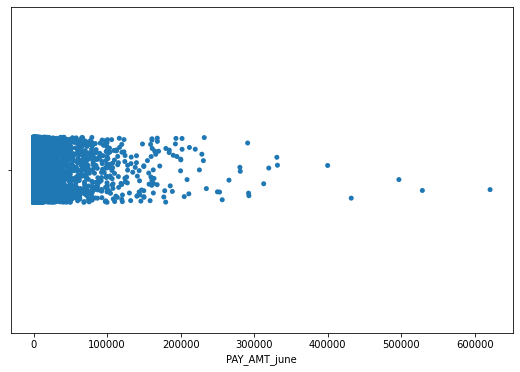

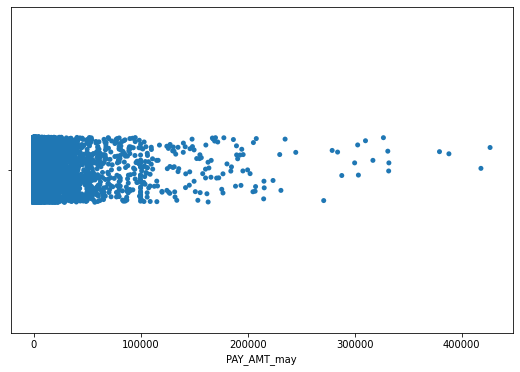

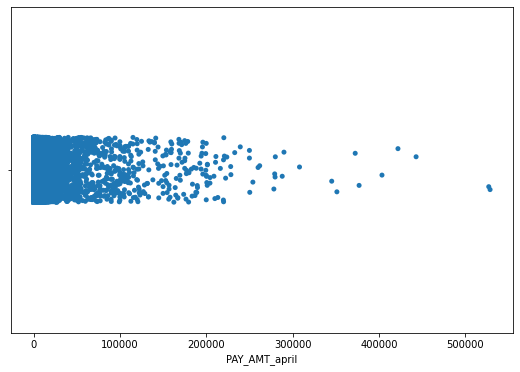

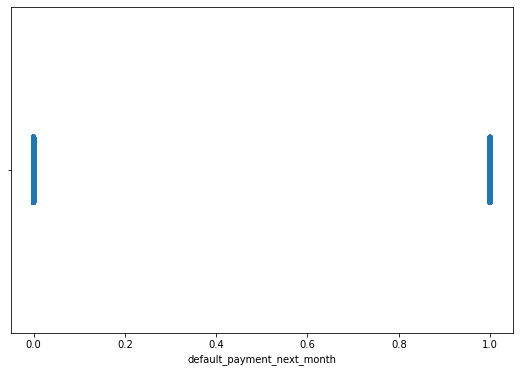

In [781]:
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(dataset[col])

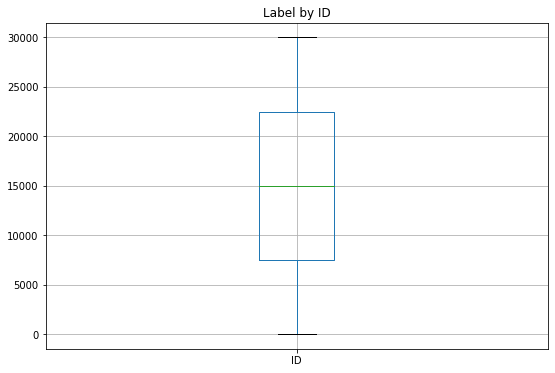

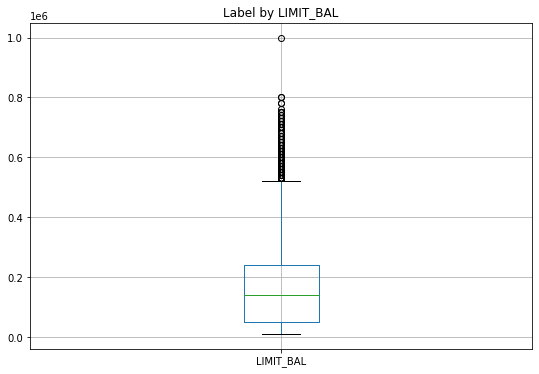

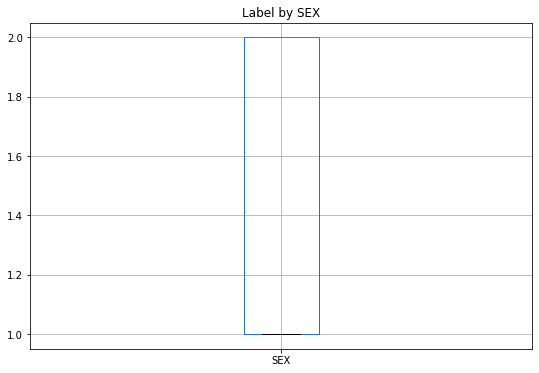

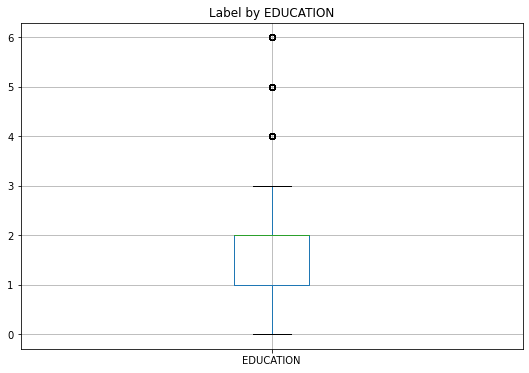

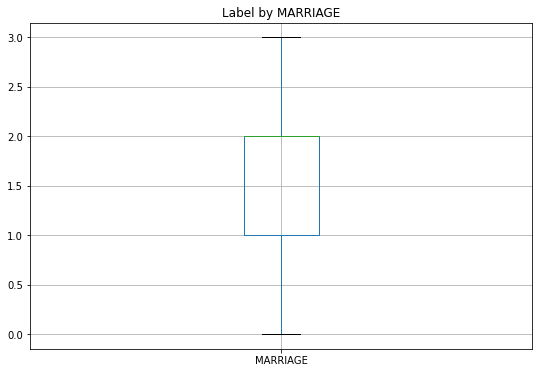

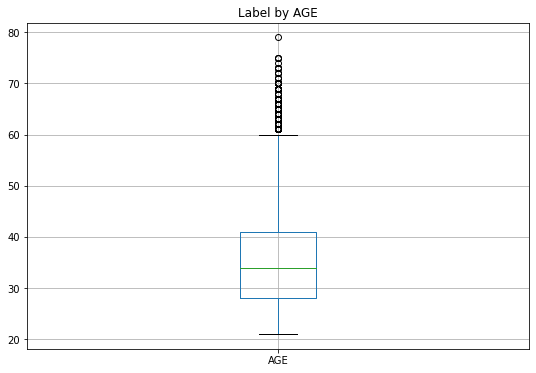

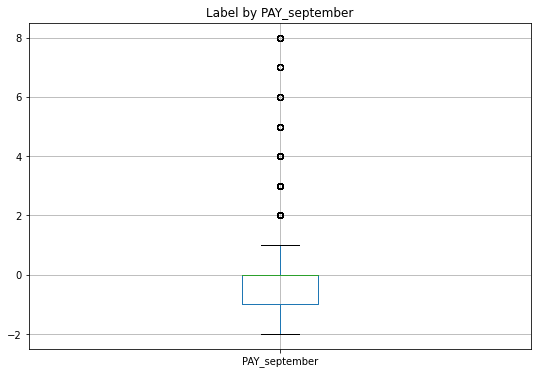

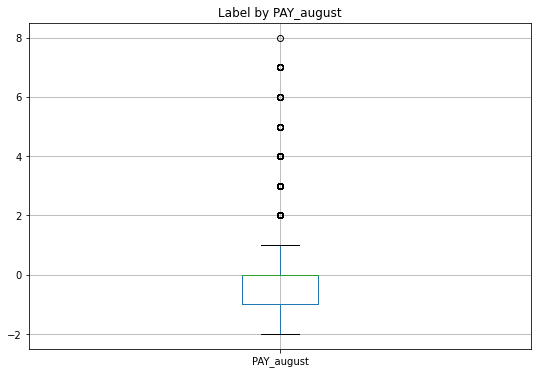

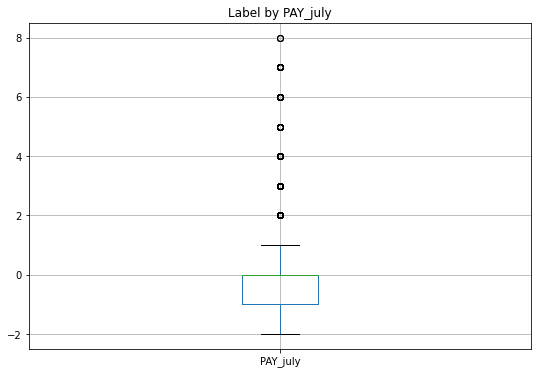

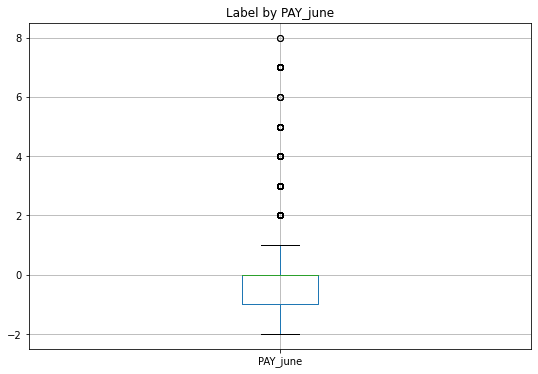

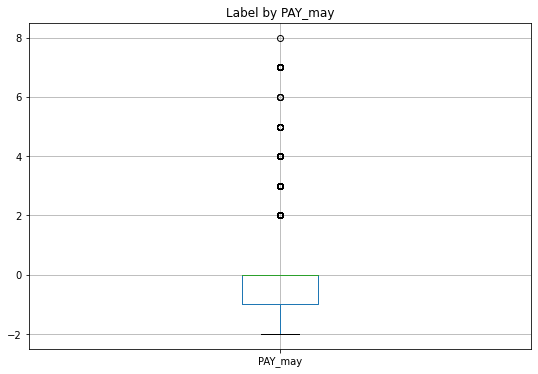

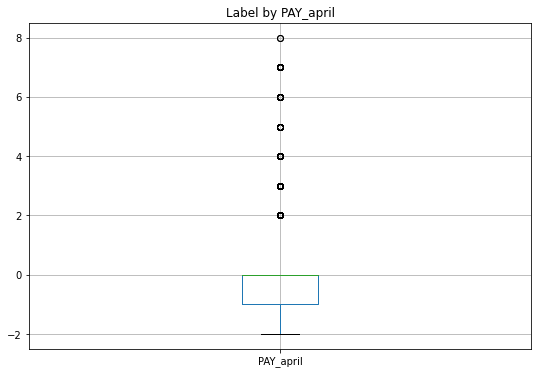

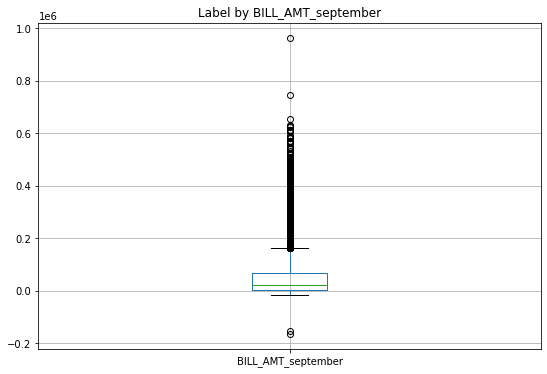

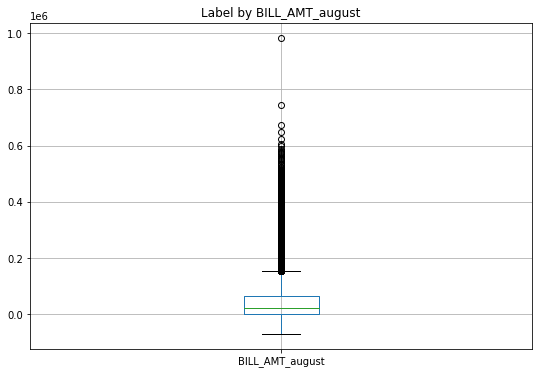

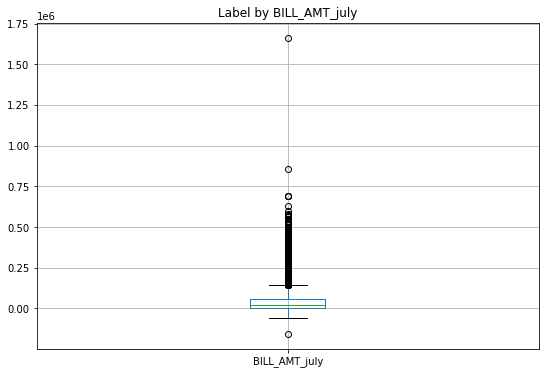

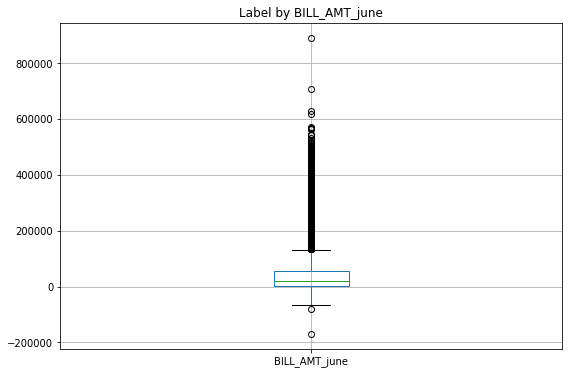

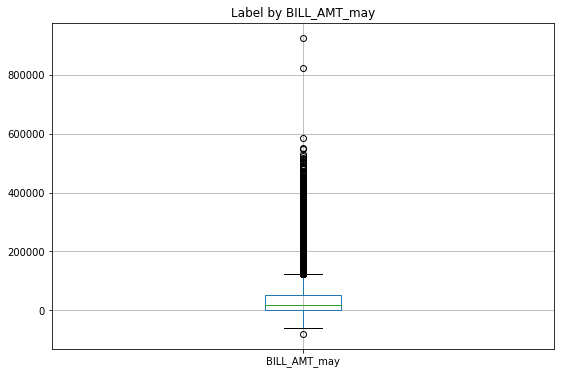

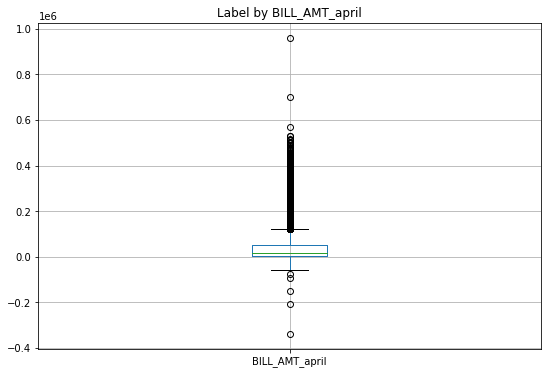

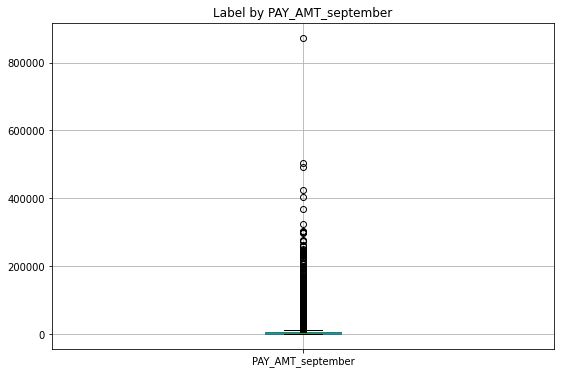

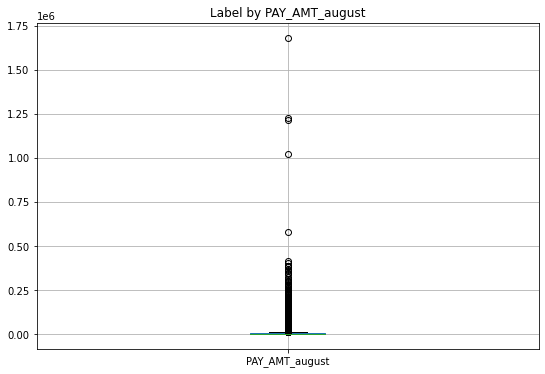

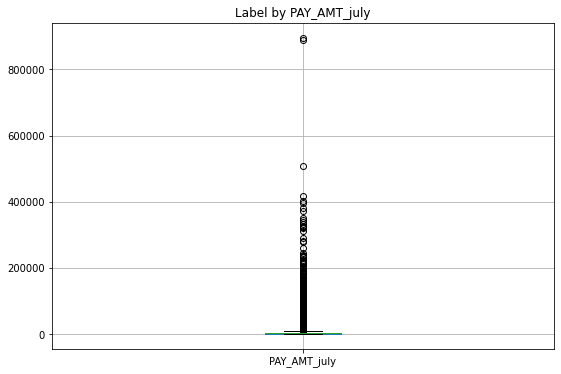

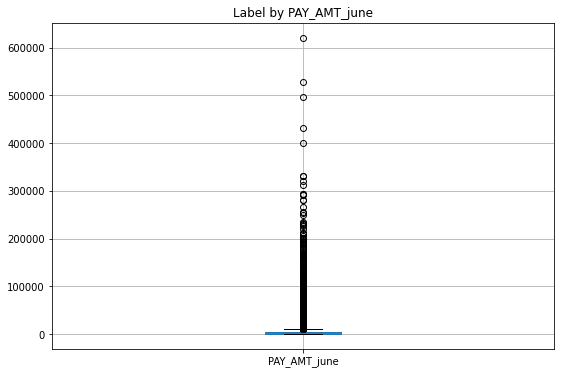

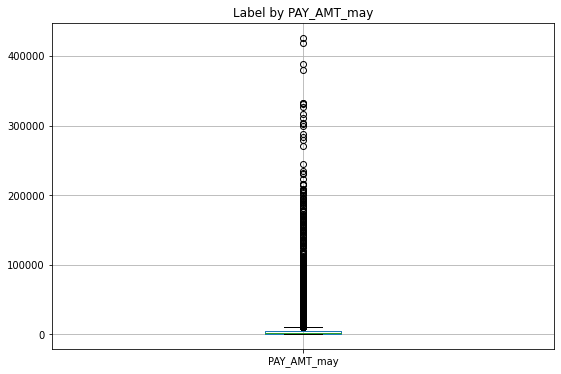

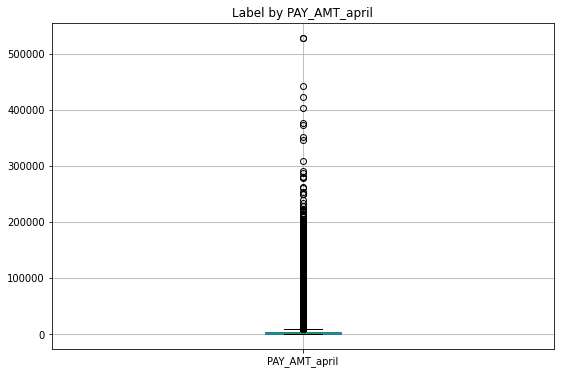

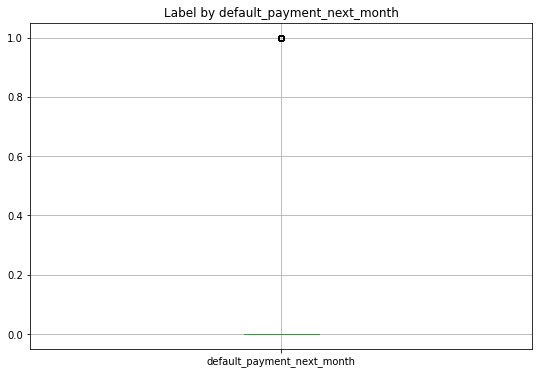

In [782]:
# plot a boxplot for the label by each numerical feature  

for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(col)
    ax.set_title('Label by ' + col)
    #ax.set_ylabel("Churn")
plt.show()

In [783]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'PAY_july', 'PAY_june', 'PAY_may',
       'PAY_april', 'BILL_AMT_september', 'BILL_AMT_august', 'BILL_AMT_july',
       'BILL_AMT_june', 'BILL_AMT_may', 'BILL_AMT_april', 'PAY_AMT_september',
       'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june', 'PAY_AMT_may',
       'PAY_AMT_april', 'default_payment_next_month'],
      dtype='object')

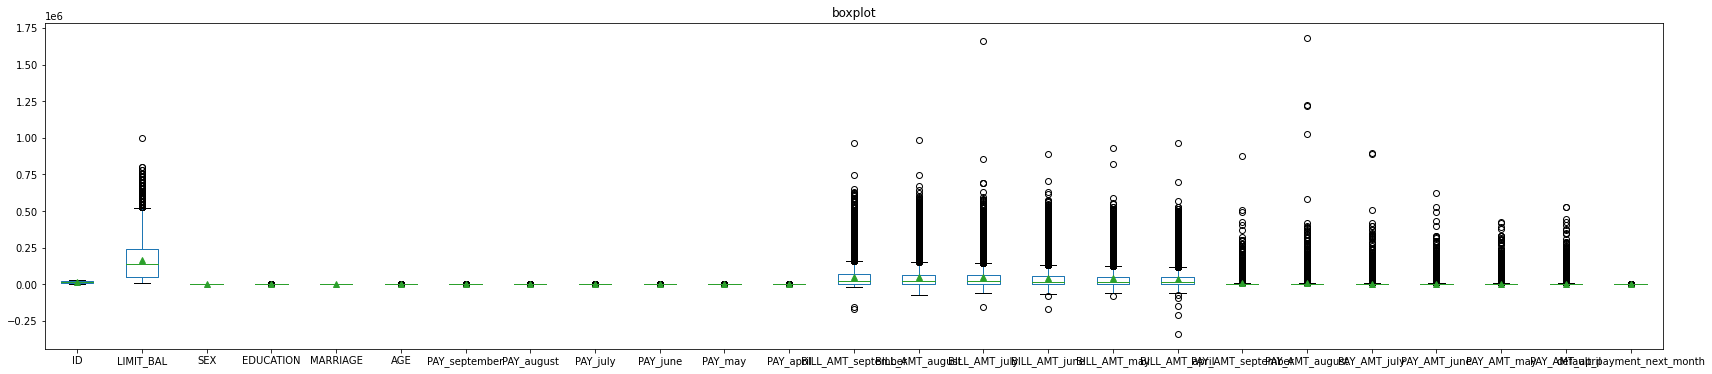

In [784]:
plt.rcParams['figure.figsize']=(29,6)
ax = dataset[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'PAY_july', 'PAY_june', 'PAY_may',
       'PAY_april', 'BILL_AMT_september', 'BILL_AMT_august', 'BILL_AMT_july',
       'BILL_AMT_june', 'BILL_AMT_may', 'BILL_AMT_april', 'PAY_AMT_september',
       'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june', 'PAY_AMT_may',
       'PAY_AMT_april', 'default_payment_next_month']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

**Bivariate Analysis**

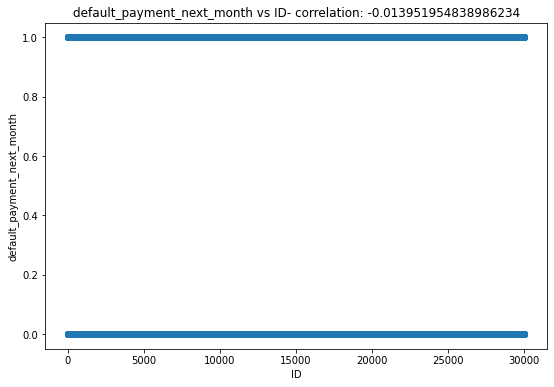

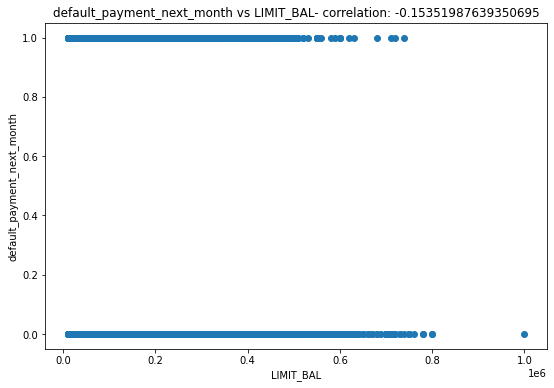

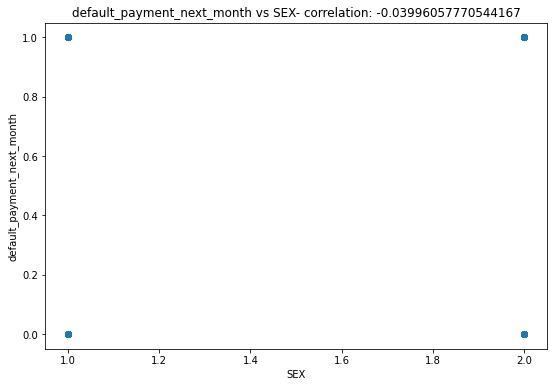

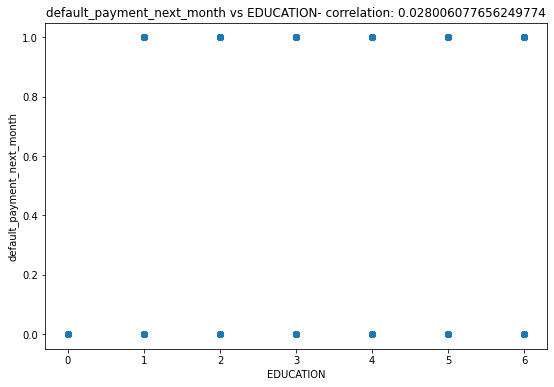

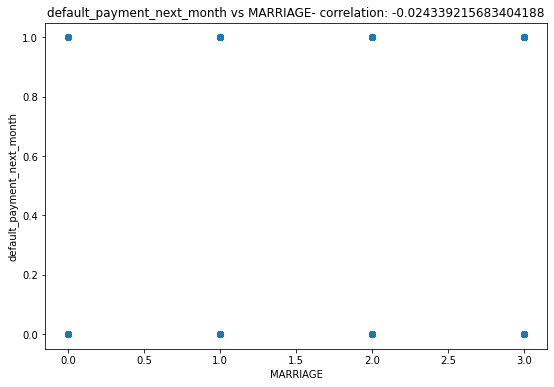

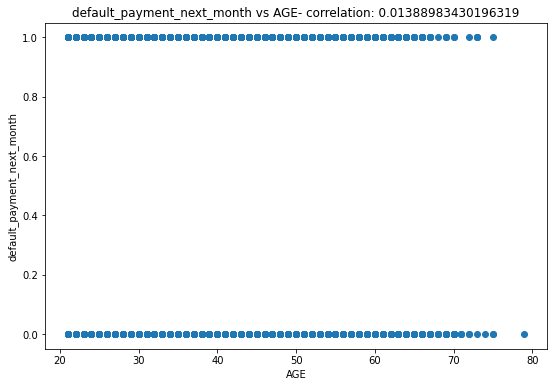

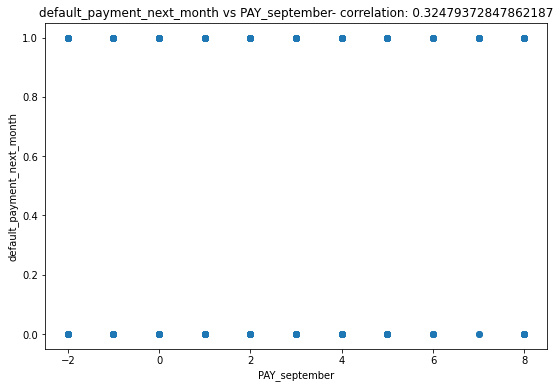

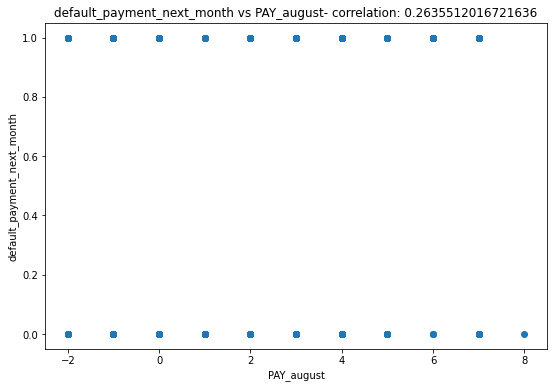

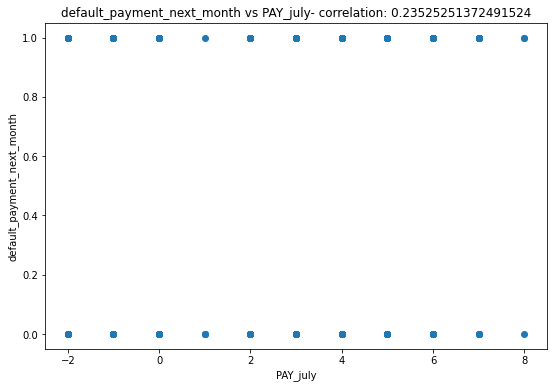

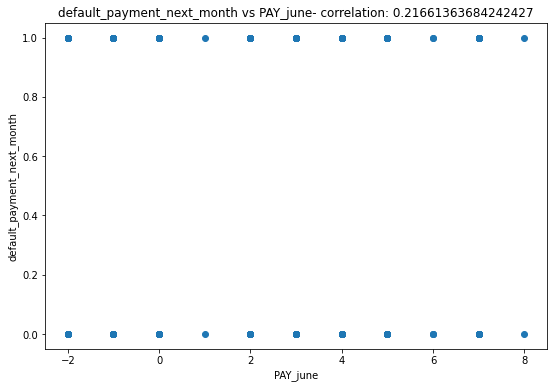

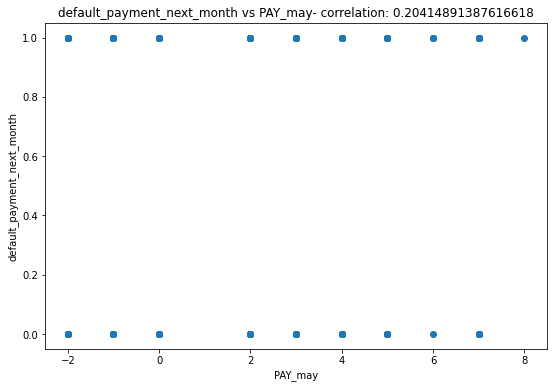

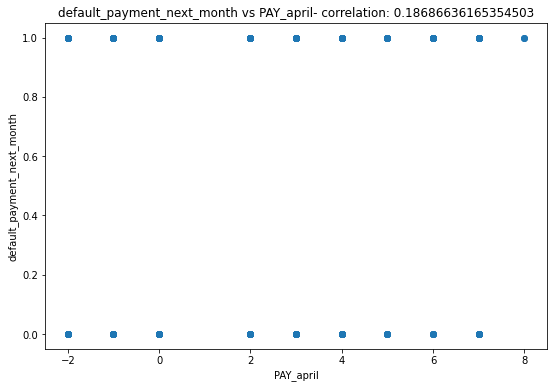

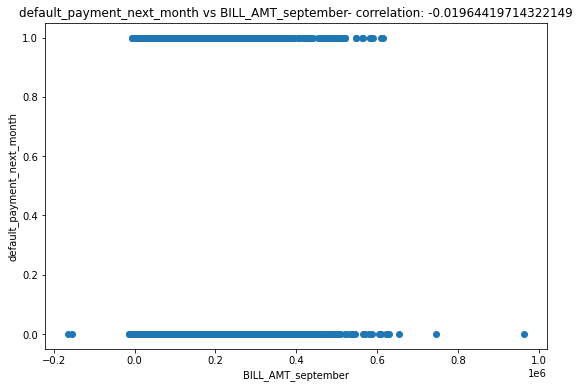

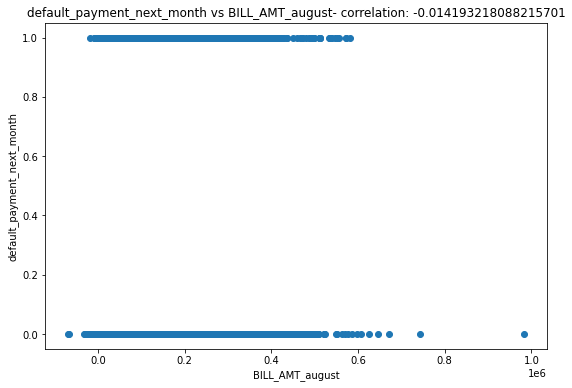

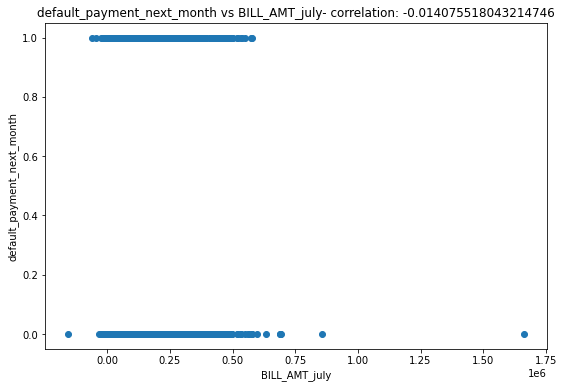

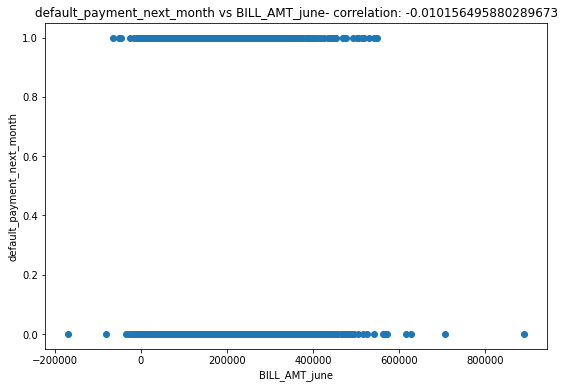

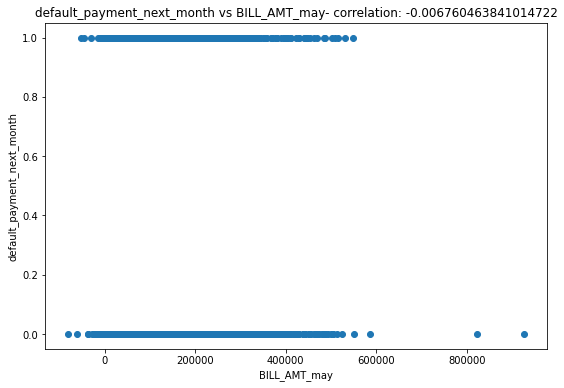

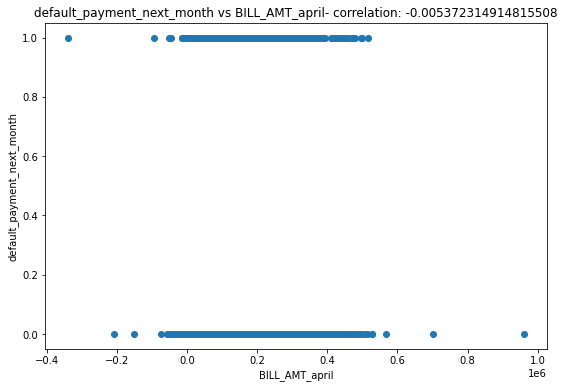

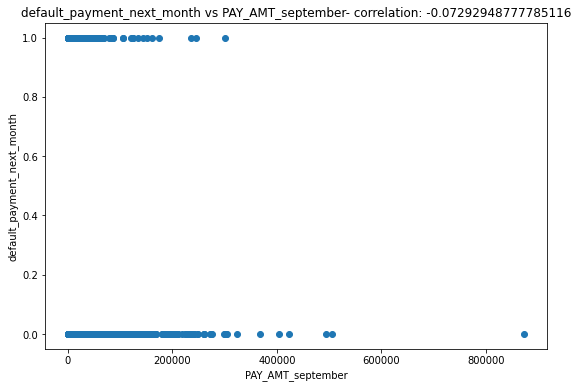

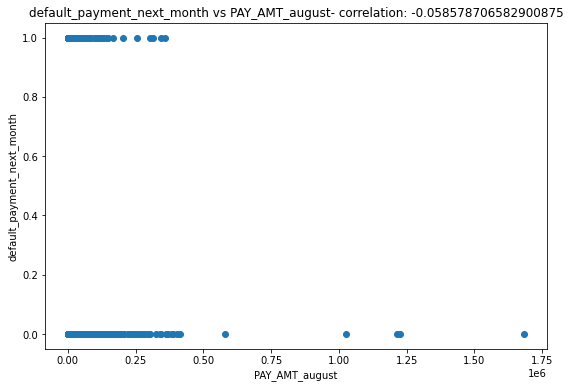

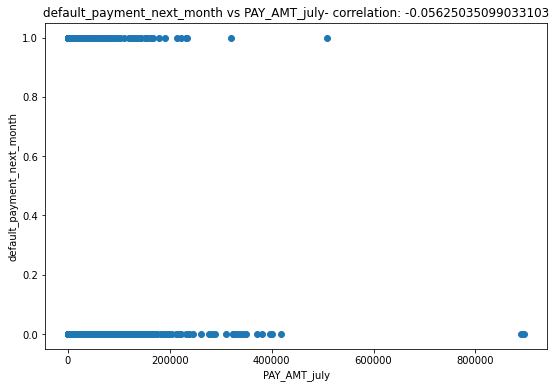

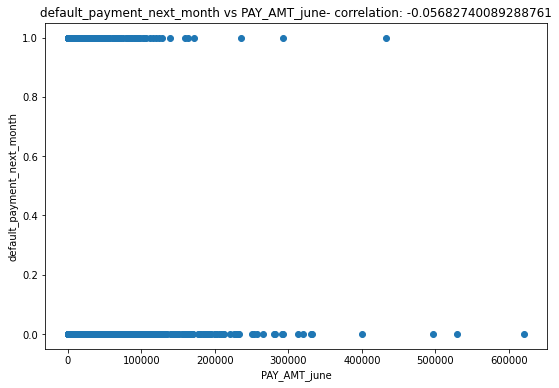

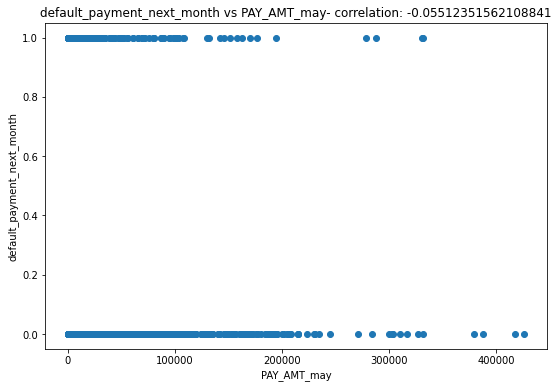

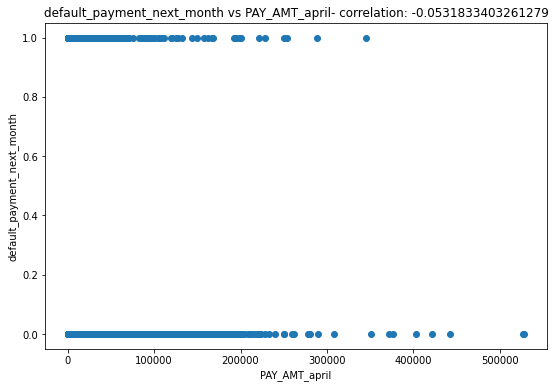

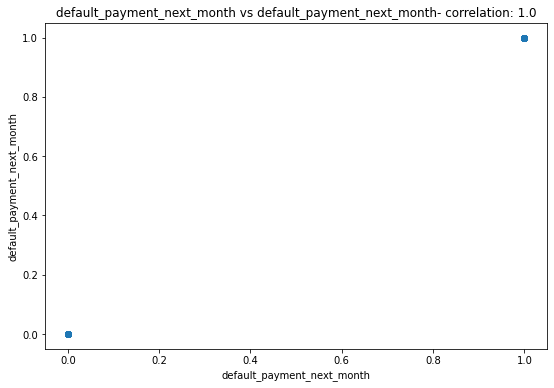

In [786]:
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=dataset[col]
  label=dataset['default_payment_next_month']
  correlation= feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('default_payment_next_month')
  ax.set_title('default_payment_next_month vs ' +col +'- correlation: '+ str(correlation))
  z=np.polyfit(dataset[col], dataset['default_payment_next_month'], 1)
  y_hat = np.poly1d(z)(dataset[col])

 

plt.show()

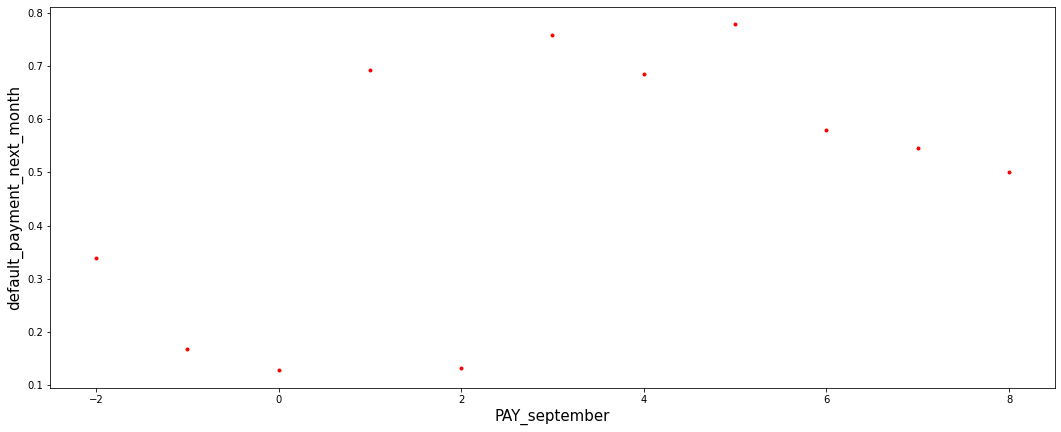

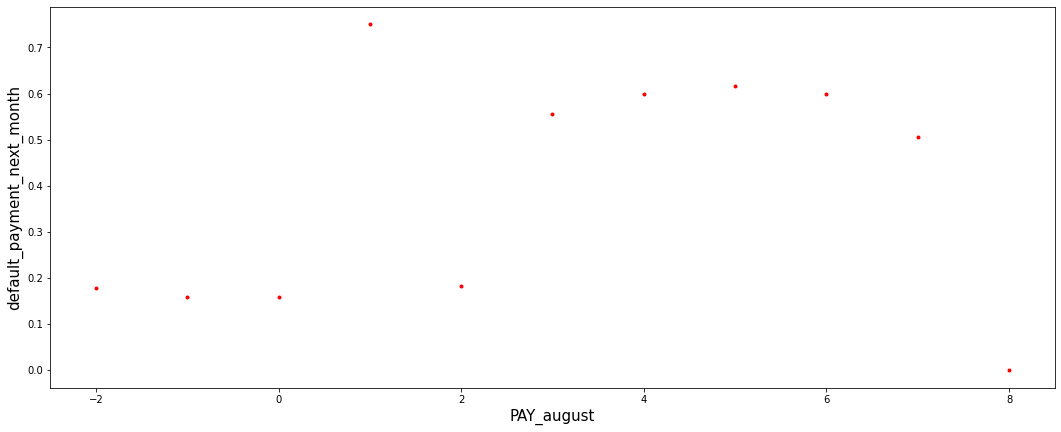

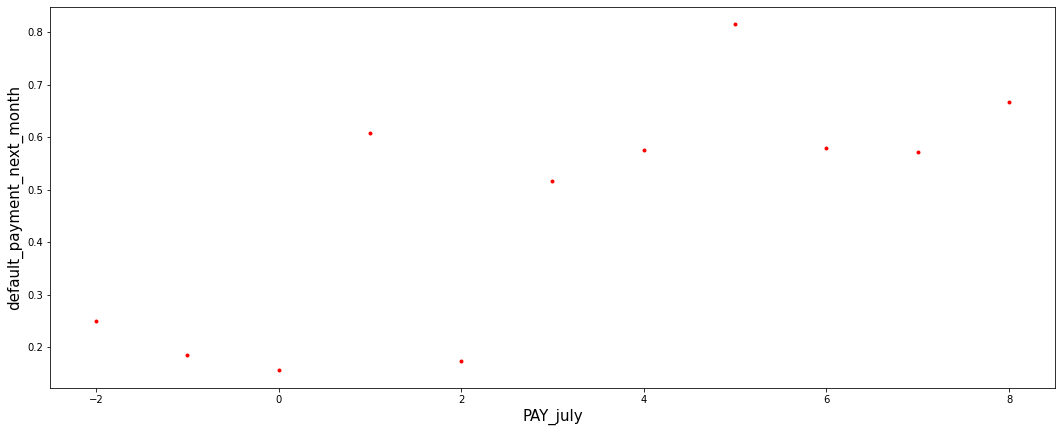

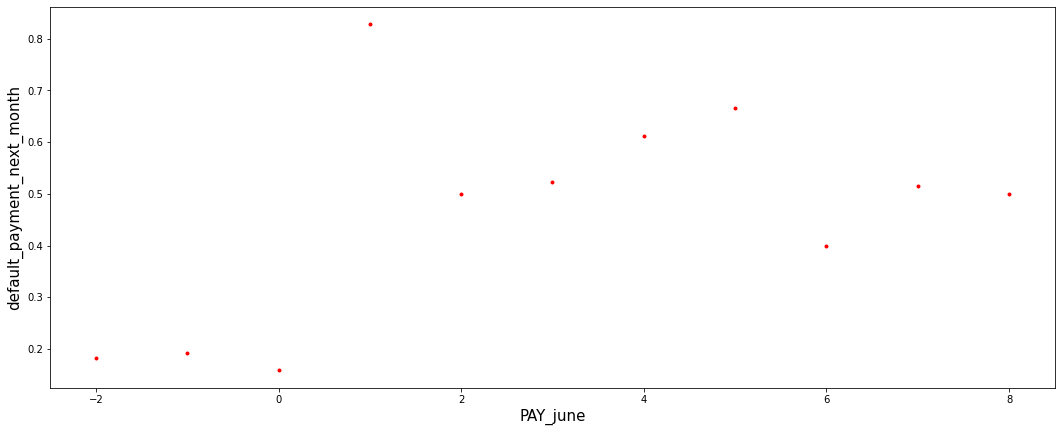

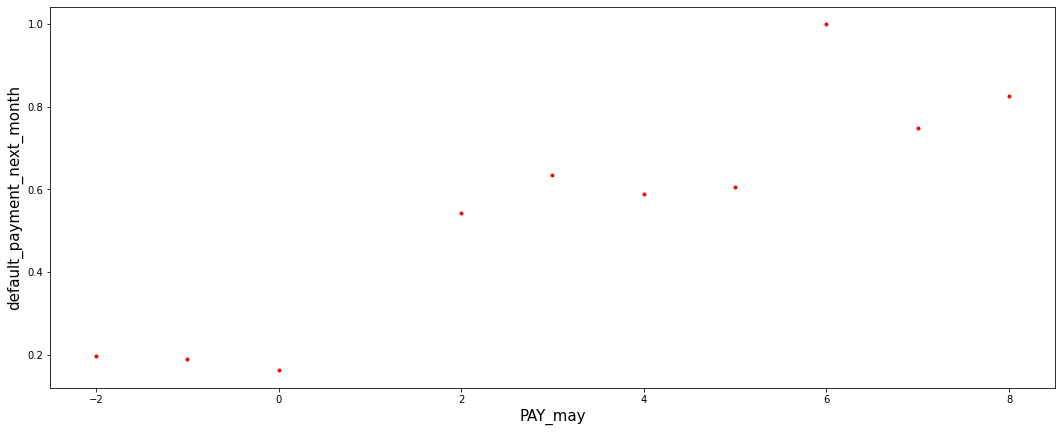

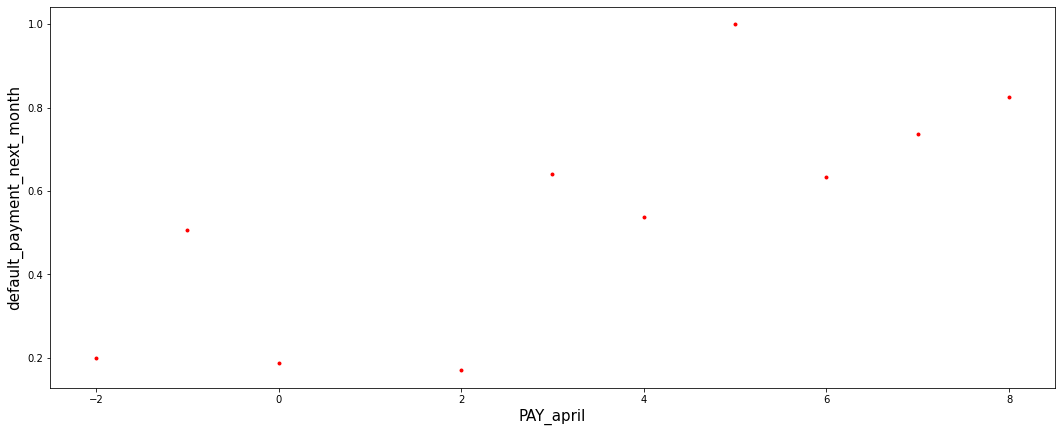

In [32]:
for i in ['PAY_september', 'PAY_august', 'PAY_july', 'PAY_june', 'PAY_may',
       'PAY_april']:
  s1=dataset[i].unique()
  s2=dataset.groupby([i])['default_payment_next_month'].mean()

  plt.rcParams['figure.figsize'] = (18, 7)

  sns.scatterplot(s1,s2,color='r', marker='o', linewidth=2)

  
  plt.xlabel(i, fontsize = 15)
  plt.ylabel('default_payment_next_month', fontsize = 15)
  plt.show()

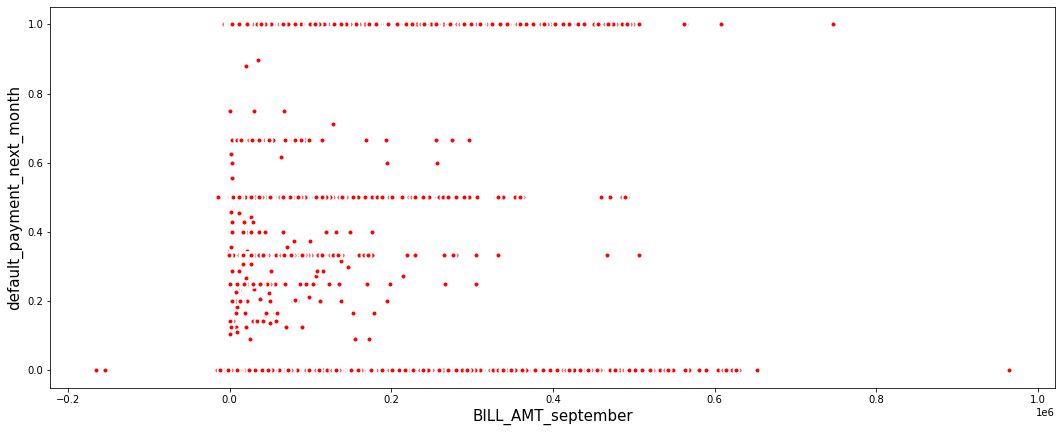

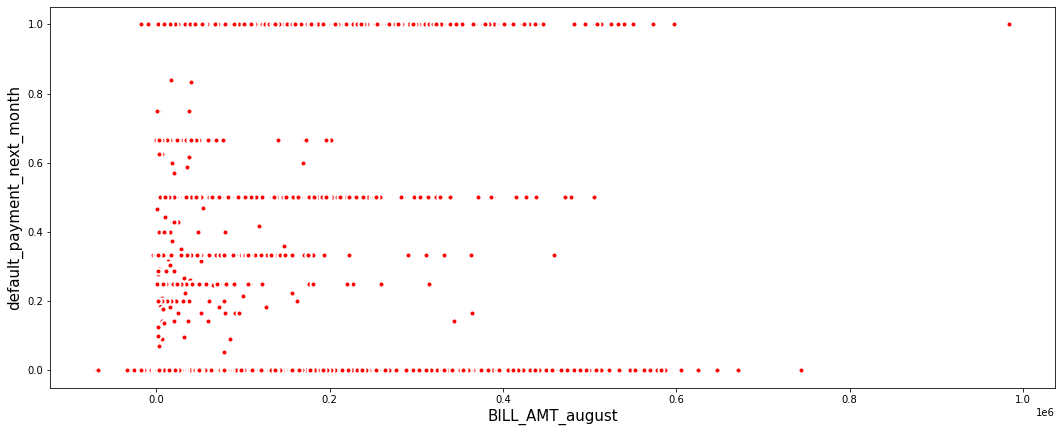

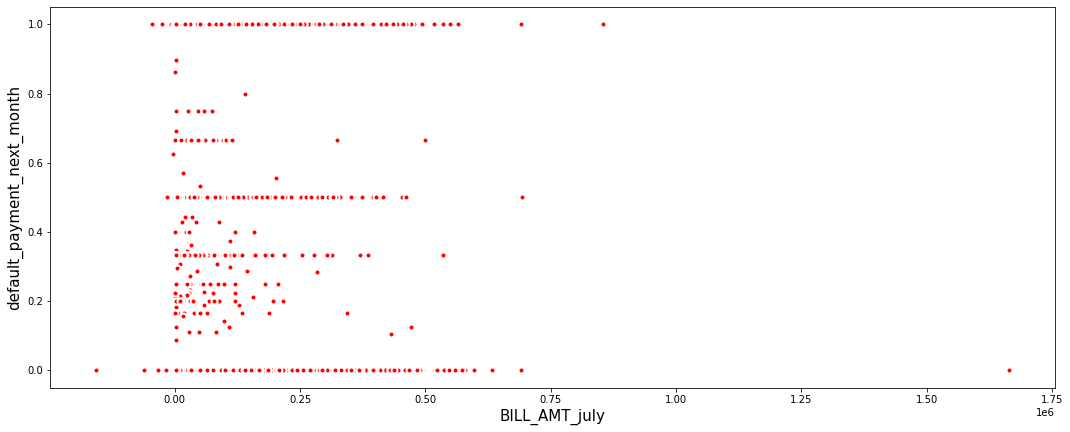

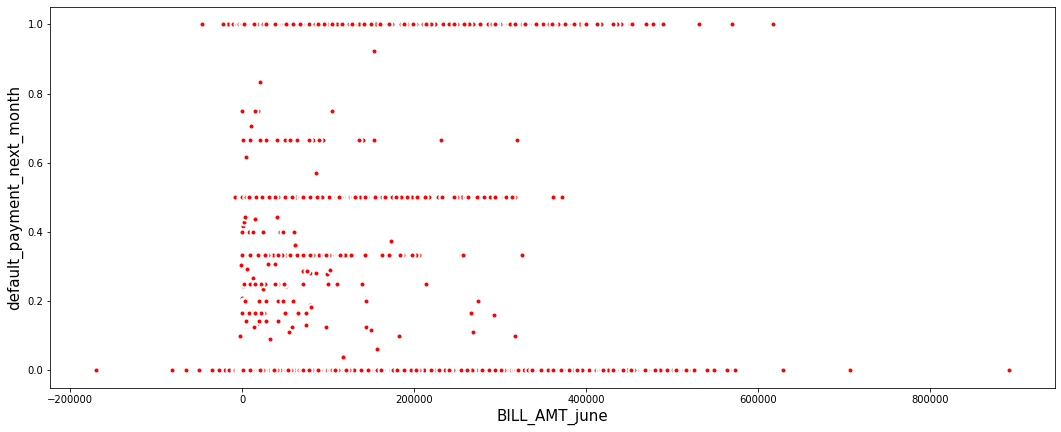

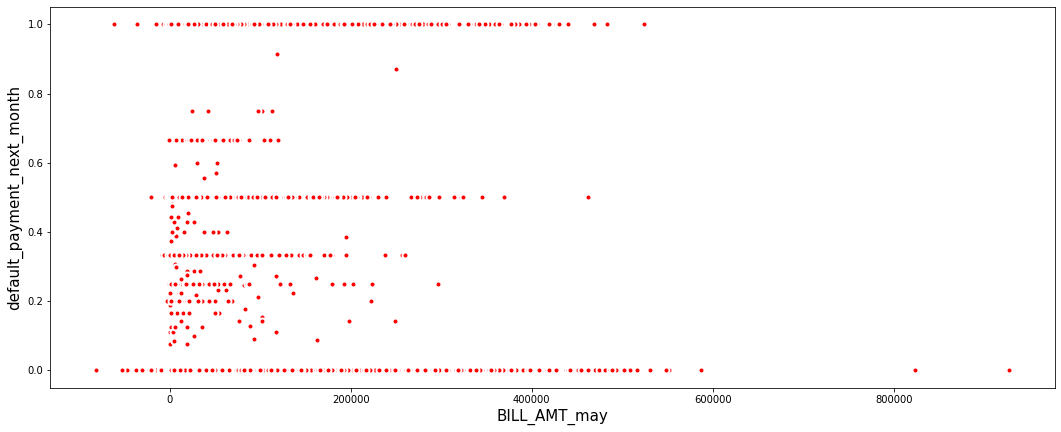

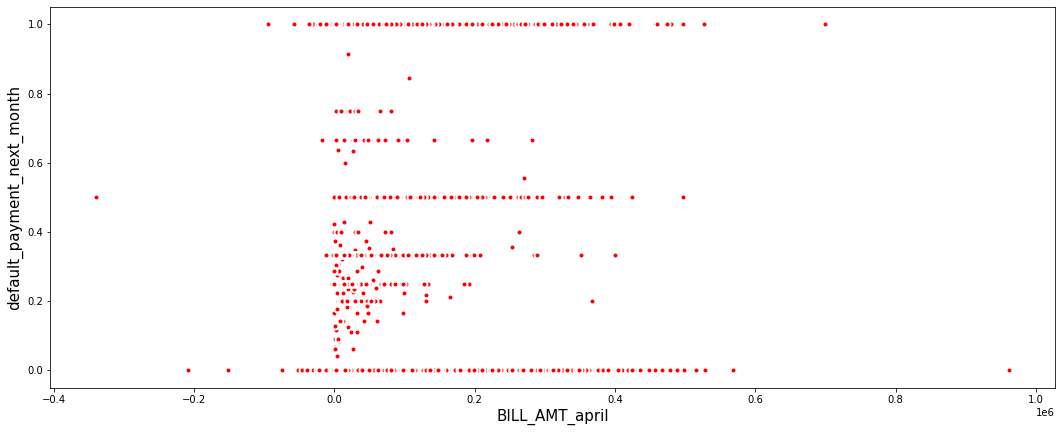

In [31]:
for i in ['BILL_AMT_september', 'BILL_AMT_august', 'BILL_AMT_july',
       'BILL_AMT_june', 'BILL_AMT_may', 'BILL_AMT_april']:
  s1=dataset[i].unique()
  s2=dataset.groupby([i])['default_payment_next_month'].mean()

  plt.rcParams['figure.figsize'] = (18, 7)

  sns.scatterplot(s1,s2,color='r', marker='o', linewidth=2)

  
  plt.xlabel(i, fontsize = 15)
  plt.ylabel('default_payment_next_month', fontsize = 15)
  plt.show()

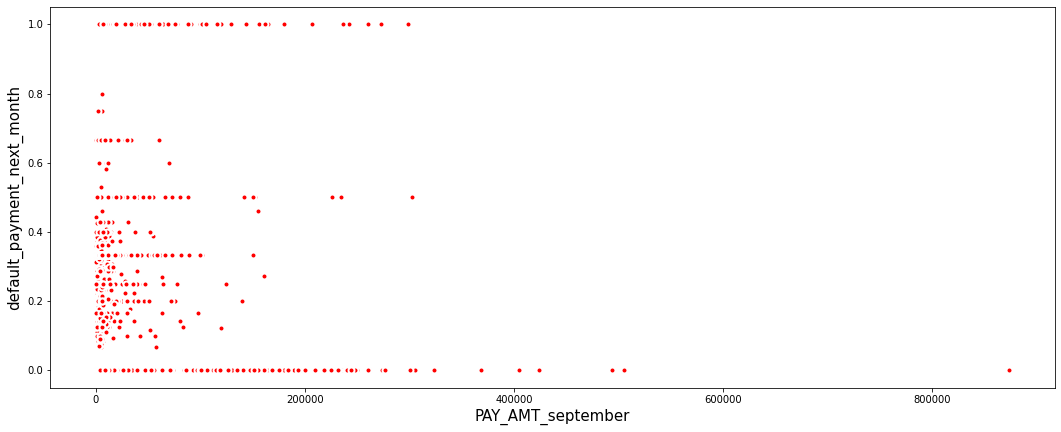

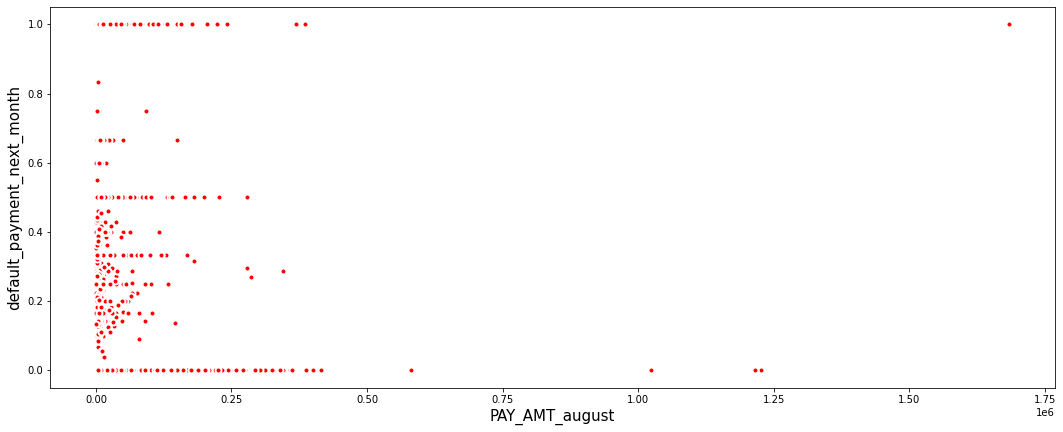

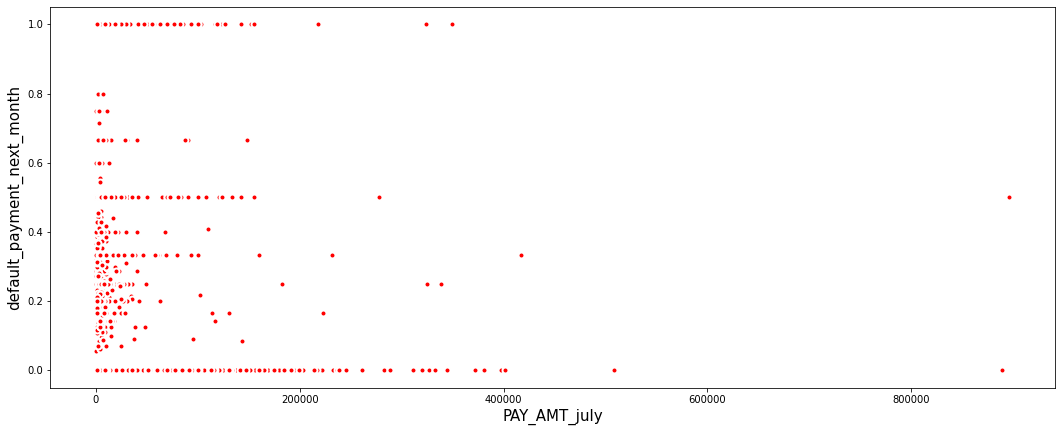

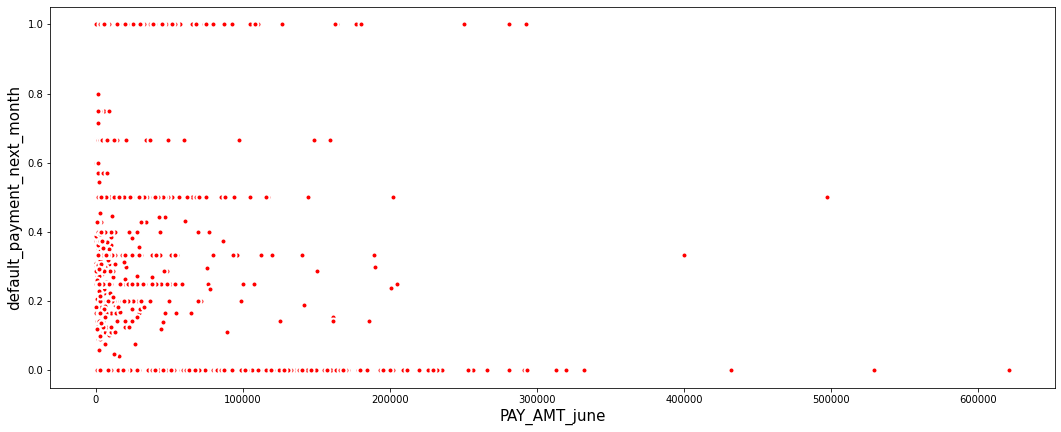

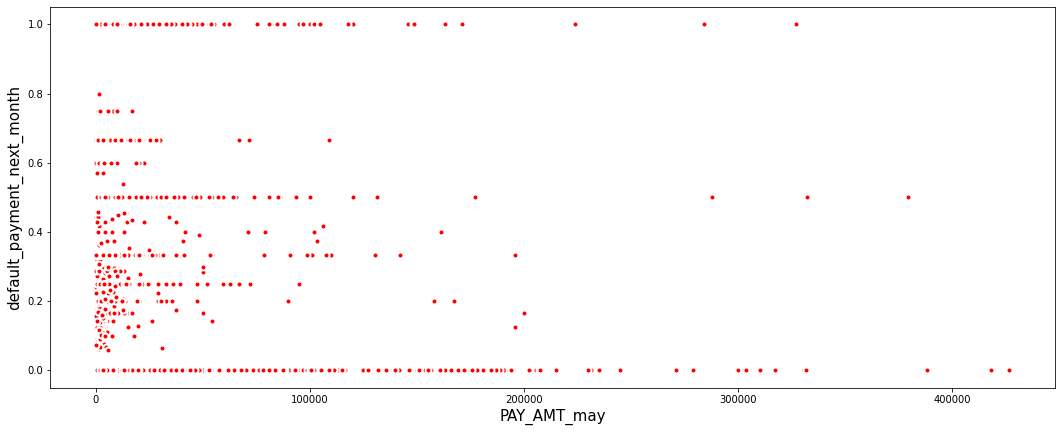

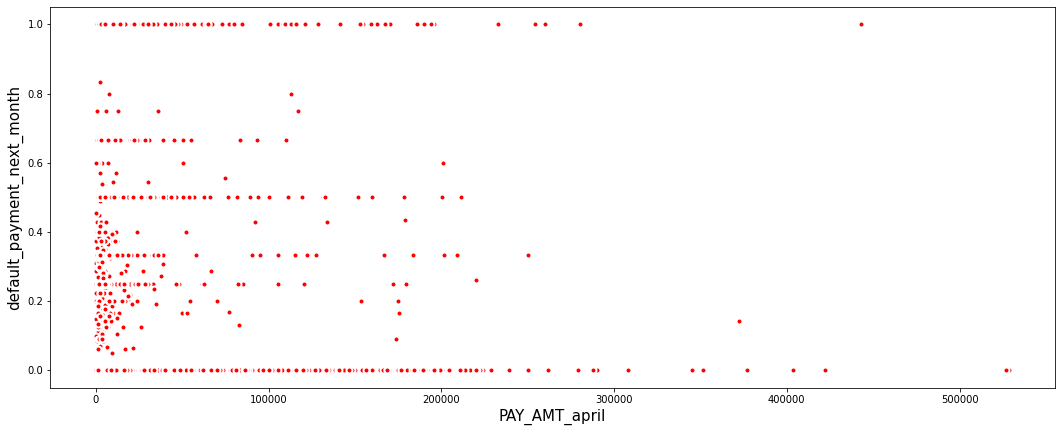

In [33]:
for i in ['PAY_AMT_september',
       'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june', 'PAY_AMT_may',
       'PAY_AMT_april']:
  s1=dataset[i].unique()
  s2=dataset.groupby([i])['default_payment_next_month'].mean()

  plt.rcParams['figure.figsize'] = (18, 7)

  sns.scatterplot(s1,s2,color='r', marker='o', linewidth=2)

  
  plt.xlabel(i, fontsize = 15)
  plt.ylabel('default_payment_next_month', fontsize = 15)
  plt.show()

**Correlation**

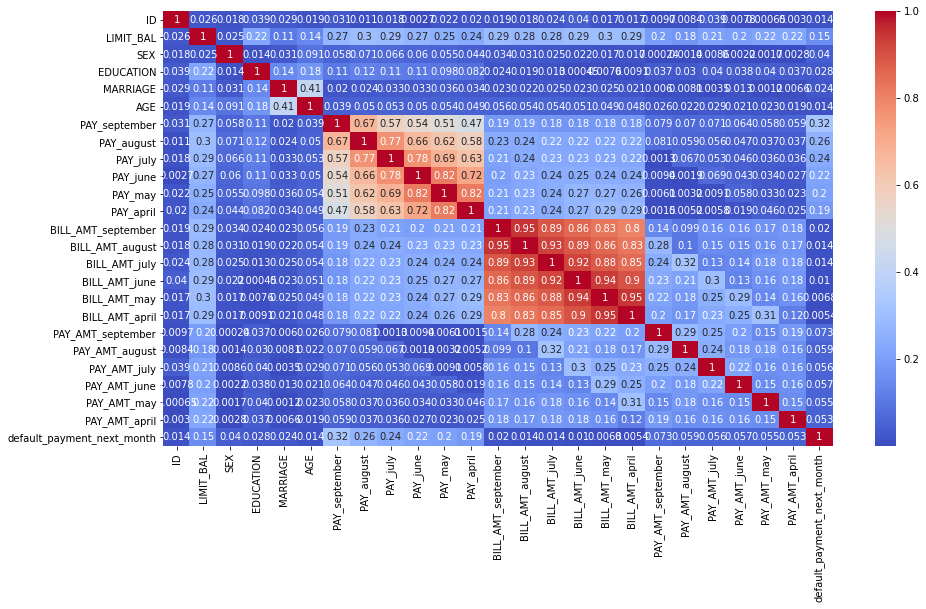

In [34]:
## Correlation
plt.figure(figsize=(15,8))
correlation=dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [35]:
corr = dataset.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

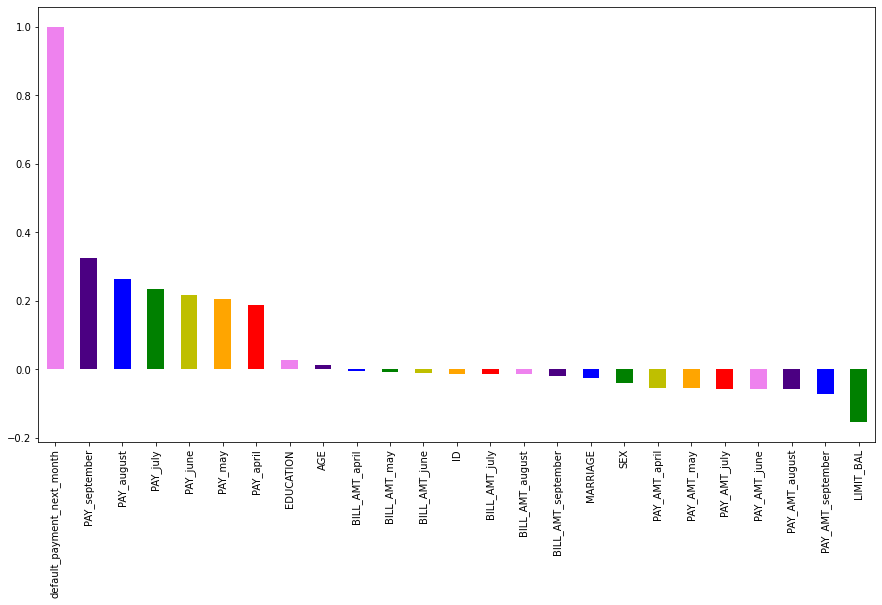

In [36]:
# correlation

plt.figure(figsize=(15,8))
dataset.corr()['default_payment_next_month'].sort_values(ascending = False).plot(kind='bar',color = ['violet','indigo','b','g','y','orange','r'])

In [264]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'PAY_july', 'PAY_june', 'PAY_may',
       'PAY_april', 'BILL_AMT_september', 'BILL_AMT_august', 'BILL_AMT_july',
       'BILL_AMT_june', 'BILL_AMT_may', 'BILL_AMT_april', 'PAY_AMT_september',
       'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june', 'PAY_AMT_may',
       'PAY_AMT_april', 'default_payment_next_month'],
      dtype='object')

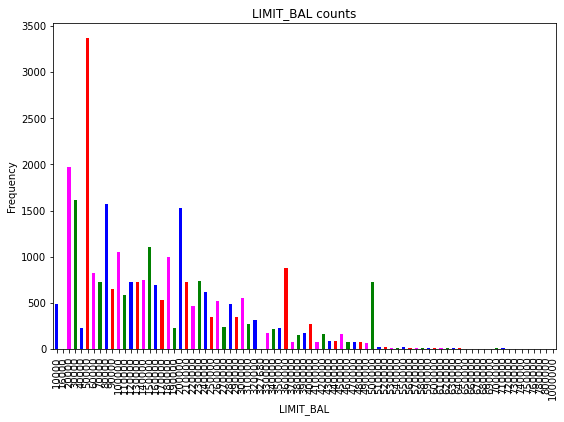

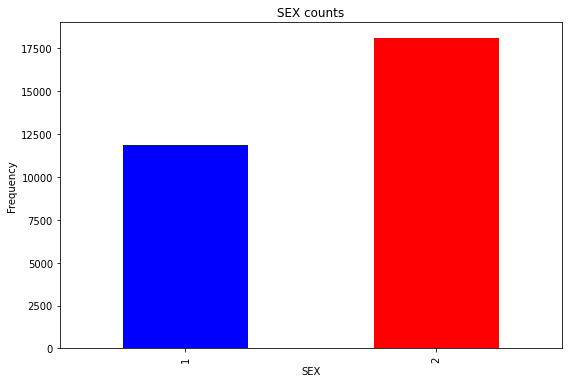

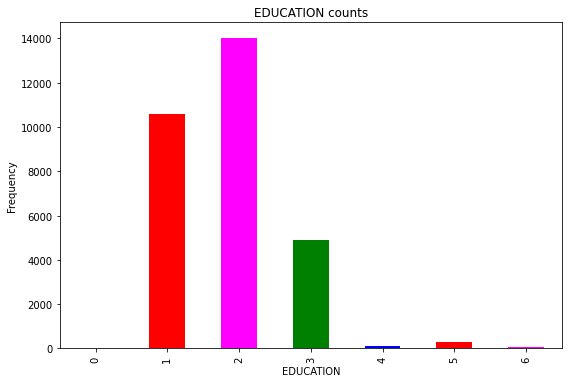

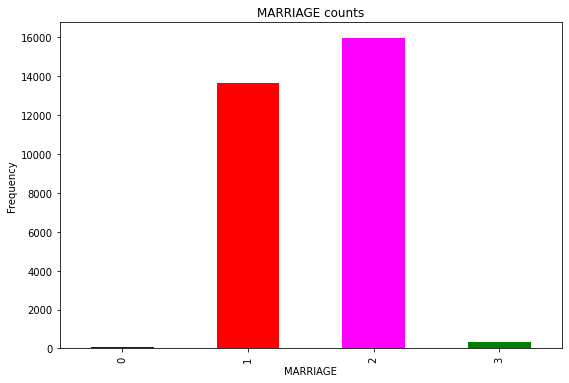

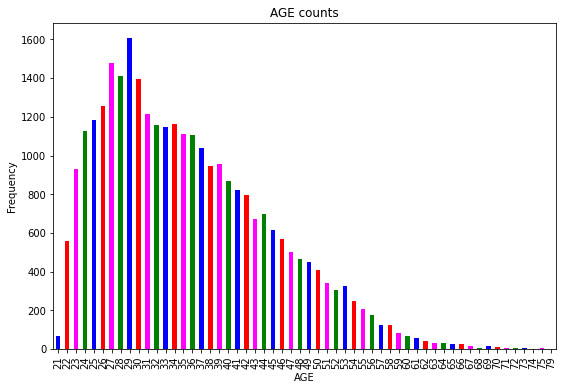

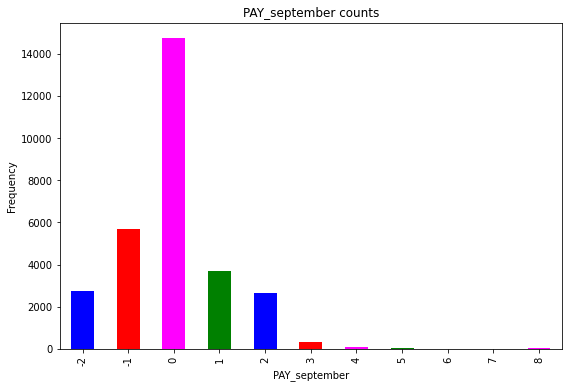

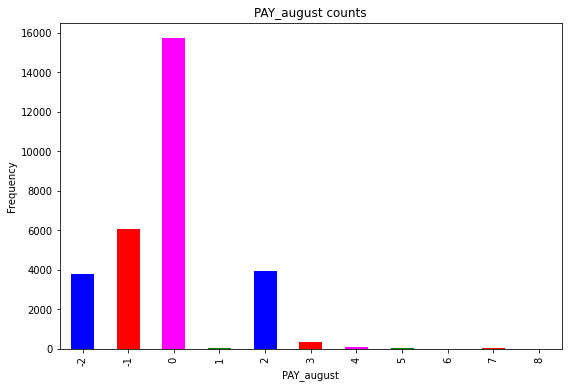

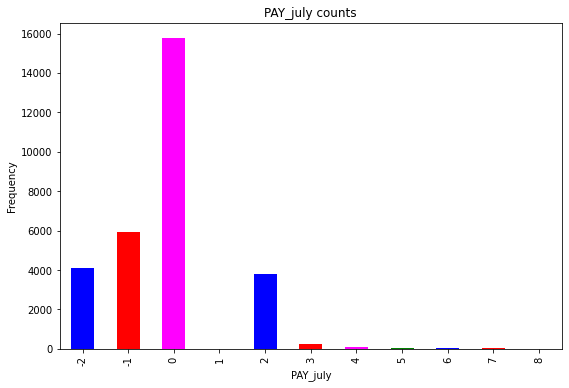

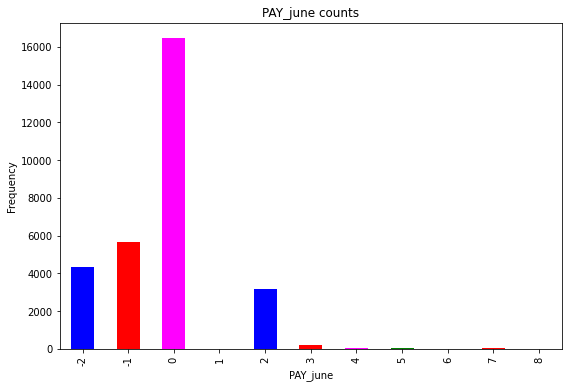

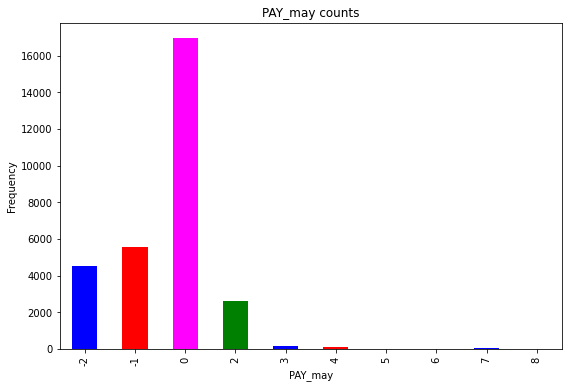

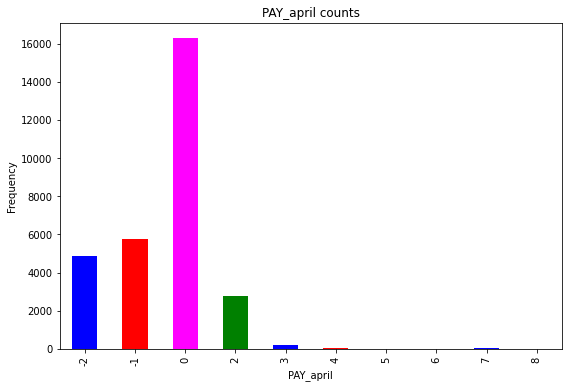

In [267]:
# plot a bar plot for each categorical feature count 

for col in ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'PAY_july', 'PAY_june', 'PAY_may',
       'PAY_april']:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color=['blue','red','magenta','g'])
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [33]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'PAY_july', 'PAY_june', 'PAY_may',
       'PAY_april', 'BILL_AMT_september', 'BILL_AMT_august', 'BILL_AMT_july',
       'BILL_AMT_june', 'BILL_AMT_may', 'BILL_AMT_april', 'PAY_AMT_september',
       'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june', 'PAY_AMT_may',
       'PAY_AMT_april', 'default_payment_next_month'],
      dtype='object')

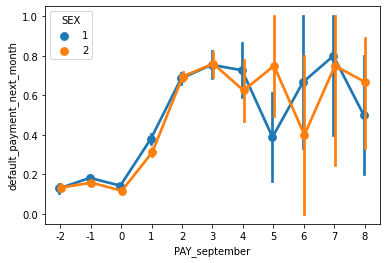

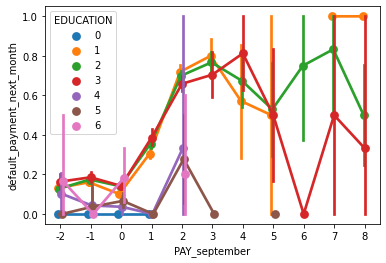

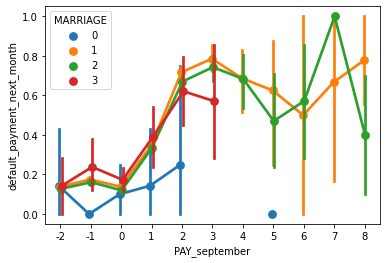

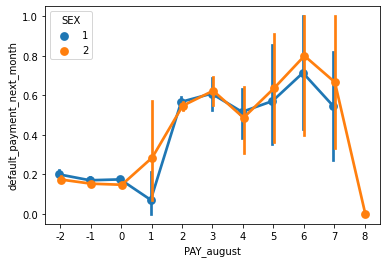

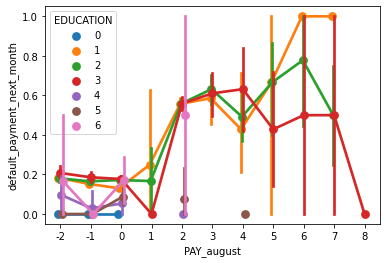

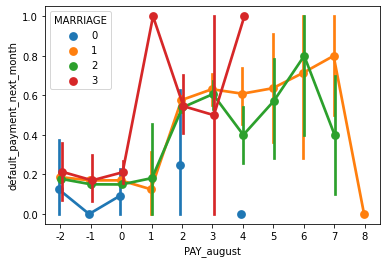

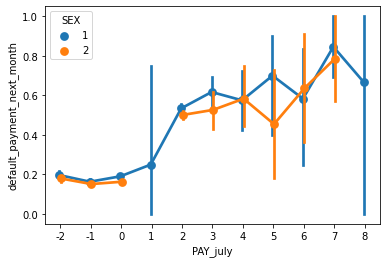

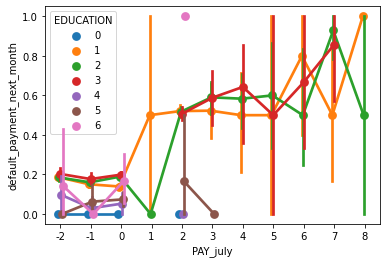

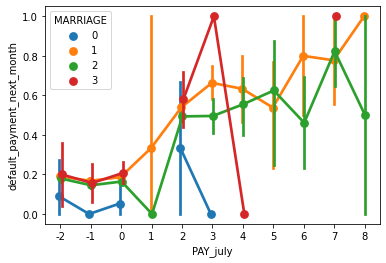

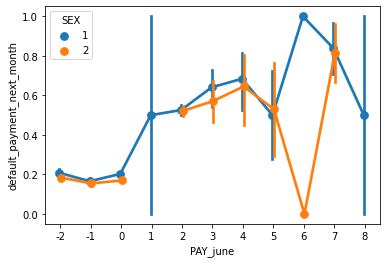

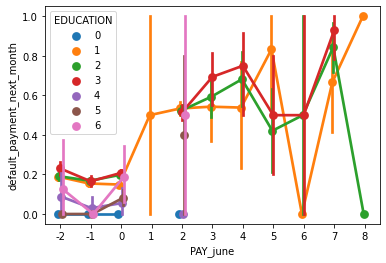

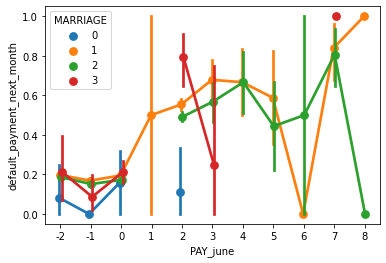

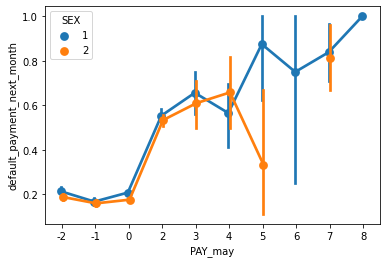

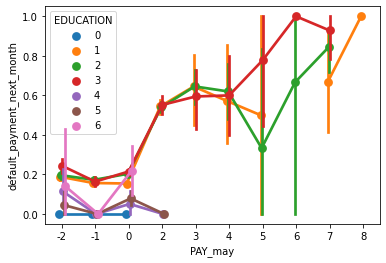

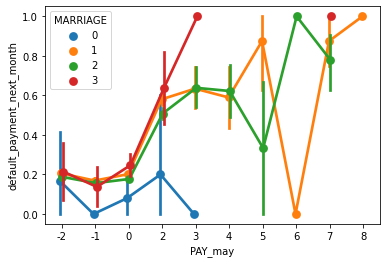

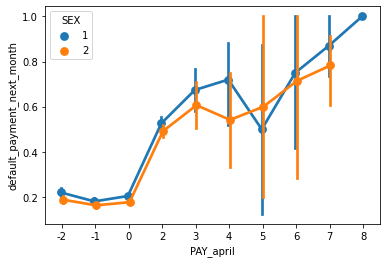

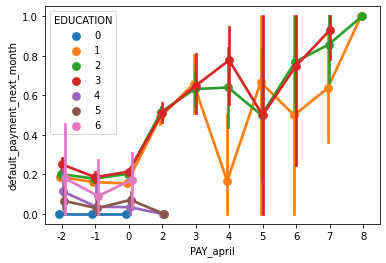

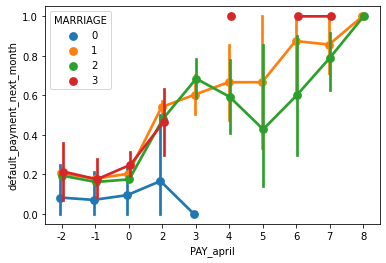

In [35]:
for i in ['PAY_september', 'PAY_august', 'PAY_july', 'PAY_june', 'PAY_may',
       'PAY_april']:
  ax = sns.pointplot(x=i, y="default_payment_next_month", hue="SEX",
                   data=dataset, dodge=True)
  plt.show()
  

  ax = sns.pointplot(x=i, y="default_payment_next_month", hue="EDUCATION",
                   data=dataset, dodge=True)
  plt.show()
  

  ax = sns.pointplot(x=i, y="default_payment_next_month", hue="MARRIAGE",
                   data=dataset, dodge=True)
  plt.show()



* Defaults have a higher proportion of Lower LIMIT_BAL values

* NonDefaults have a higher proportion of Females (Sex=2)

* NonDefaults have a higher proportion of MoreEducated (EDUCATION=1 or 2)

* NonDefaults have a higher proportion of Singles (MARRIAGE=2)

* NonDefaults have a higher proportion of people 30-40years

* NonDefaults have a MUCH higher proportion of zero or negative PAY_X variables (this means that being current or ahead of payments is associated with not defaulting in the following month).

## **Final Pair Plot**

**Multivariate Analysis**

In [266]:
sns.pairplot(dataset, size=3)

Output hidden; open in https://colab.research.google.com to view.

# **Outlier Treatment**


In [43]:
dataset_l=dataset.copy()

## **For Skewed Features**

In [44]:
dataset_l.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'PAY_july', 'PAY_june', 'PAY_may',
       'PAY_april', 'BILL_AMT_september', 'BILL_AMT_august', 'BILL_AMT_july',
       'BILL_AMT_june', 'BILL_AMT_may', 'BILL_AMT_april', 'PAY_AMT_september',
       'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june', 'PAY_AMT_may',
       'PAY_AMT_april', 'default_payment_next_month'],
      dtype='object')

In [45]:
def iqr_skew(df,variable):
  IQR=df[variable].quantile(0.75)- df[variable].quantile(0.25)
  lower_bridge=df[variable].quantile(0.25)-(IQR*1.5)
  upper_bridge=df[variable].quantile(0.75)+(IQR*1.5)
  print(variable.upper())
  print(" ")
  print(f"lower_bridge_{variable}",lower_bridge)
  print(" ")
  print(f"upper_bridge_{variable}",upper_bridge)
  print(" ")

In [46]:
for variable in ['LIMIT_BAL','BILL_AMT_september', 'BILL_AMT_august', 'BILL_AMT_july',
       'BILL_AMT_june', 'BILL_AMT_may', 'BILL_AMT_april']:
  iqr_skew(dataset_l,variable)

LIMIT_BAL
 
lower_bridge_LIMIT_BAL -235000.0
 
upper_bridge_LIMIT_BAL 525000.0
 
BILL_AMT_SEPTEMBER
 
lower_bridge_BILL_AMT_september -91739.625
 
upper_bridge_BILL_AMT_september 162389.375
 
BILL_AMT_AUGUST
 
lower_bridge_BILL_AMT_august -88547.5
 
upper_bridge_BILL_AMT_august 155538.5
 
BILL_AMT_JULY
 
lower_bridge_BILL_AMT_july -83581.5
 
upper_bridge_BILL_AMT_july 146412.5
 
BILL_AMT_JUNE
 
lower_bridge_BILL_AMT_june -75942.125
 
upper_bridge_BILL_AMT_june 132774.875
 
BILL_AMT_MAY
 
lower_bridge_BILL_AMT_may -70878.25
 
upper_bridge_BILL_AMT_may 122831.75
 
BILL_AMT_APRIL
 
lower_bridge_BILL_AMT_april -70657.375
 
upper_bridge_BILL_AMT_april 121111.625
 


In [47]:
def iqr_skew_impute(df,variable):
  IQR=df[variable].quantile(0.75)- df[variable].quantile(0.25)
  lower_bridge=df[variable].quantile(0.25)-(IQR*1.5)
  upper_bridge=df[variable].quantile(0.75)+(IQR*1.5)
  df.loc[df[variable]>=upper_bridge,variable]=upper_bridge
  df.loc[df[variable]<=lower_bridge,variable]=lower_bridge

In [48]:
for variable in ['LIMIT_BAL','BILL_AMT_september', 'BILL_AMT_august', 'BILL_AMT_july',
       'BILL_AMT_june', 'BILL_AMT_may', 'BILL_AMT_april']:
  iqr_skew_impute(dataset_l,variable)

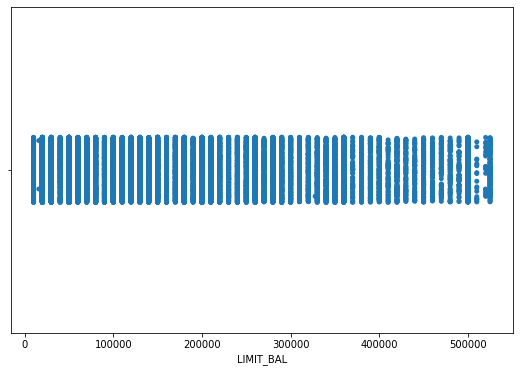

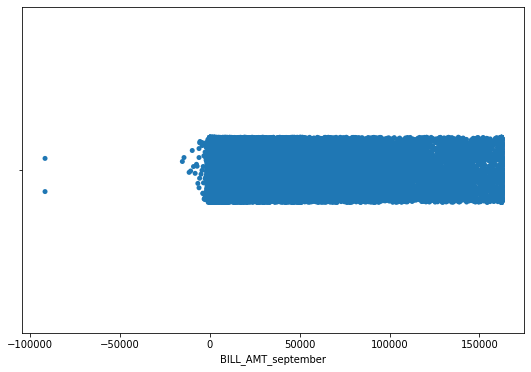

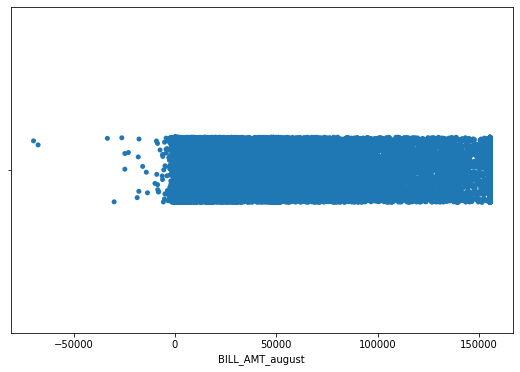

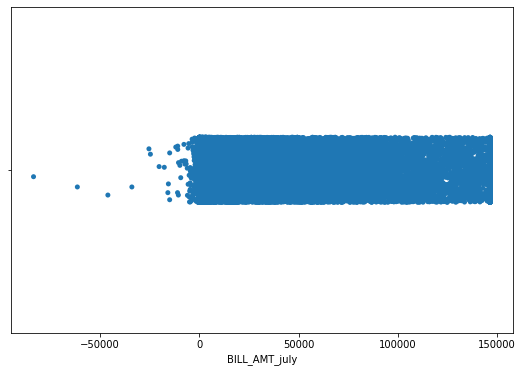

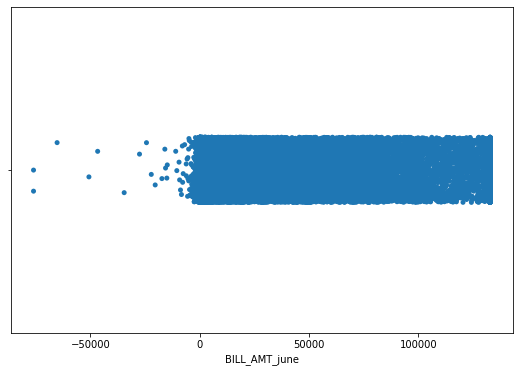

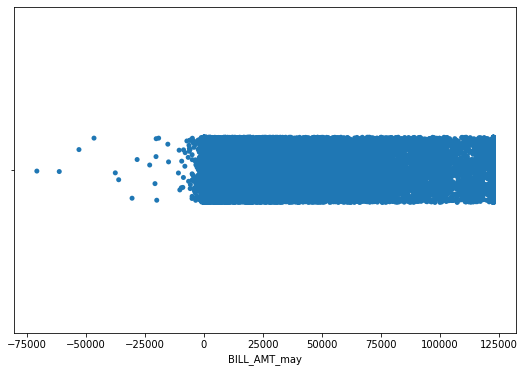

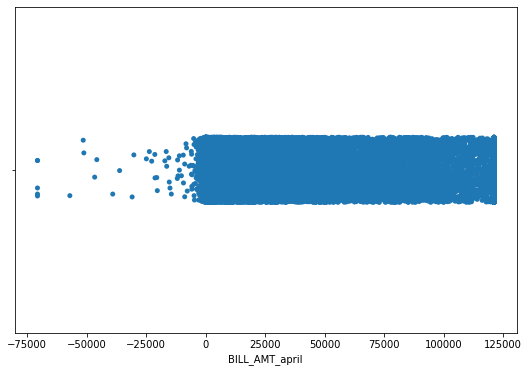

In [49]:
for col in ['LIMIT_BAL','BILL_AMT_september', 'BILL_AMT_august', 'BILL_AMT_july',
       'BILL_AMT_june', 'BILL_AMT_may', 'BILL_AMT_april']:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(dataset_l[col])

## **For Quite Symmetric Features**

In [50]:
dataset_l.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'PAY_july', 'PAY_june', 'PAY_may',
       'PAY_april', 'BILL_AMT_september', 'BILL_AMT_august', 'BILL_AMT_july',
       'BILL_AMT_june', 'BILL_AMT_may', 'BILL_AMT_april', 'PAY_AMT_september',
       'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june', 'PAY_AMT_may',
       'PAY_AMT_april', 'default_payment_next_month'],
      dtype='object')

In [51]:
def iqr_symmetric(df,variable):
  
  lower_bridge=df[variable].mean()-3*(df[variable].std())
  upper_bridge=df[variable].mean()+3*(df[variable].std())
  print(variable.upper())
  print(" ")
  print(f"lower_bridge_{variable}",lower_bridge)
  print(" ")
  print(f"upper_bridge_{variable}",upper_bridge)
  print(" ")

In [52]:
for variable in ['PAY_AMT_september',
       'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june', 'PAY_AMT_may',
       'PAY_AMT_april']:
  iqr_symmetric(dataset_l,variable)

PAY_AMT_SEPTEMBER
 
lower_bridge_PAY_AMT_september -44026.26056207961
 
upper_bridge_PAY_AMT_september 55353.4215620796
 
PAY_AMT_AUGUST
 
lower_bridge_PAY_AMT_august -63201.44770616461
 
upper_bridge_PAY_AMT_august 75043.77470616461
 
PAY_AMT_JULY
 
lower_bridge_PAY_AMT_july -47595.20290941279
 
upper_bridge_PAY_AMT_july 58046.565909412784
 
PAY_AMT_JUNE
 
lower_bridge_PAY_AMT_june -42172.40236542736
 
upper_bridge_PAY_AMT_june 51824.55609876069
 
PAY_AMT_MAY
 
lower_bridge_PAY_AMT_may -41035.52940410284
 
upper_bridge_PAY_AMT_may 50634.3046707695
 
PAY_AMT_APRIL
 
lower_bridge_PAY_AMT_april -48116.89475963553
 
upper_bridge_PAY_AMT_april 58547.89989296887
 


In [53]:
def iqr_symmetric_impute(df,variable):
  lower_bridge=df[variable].mean()-3*(df[variable].std())
  upper_bridge=df[variable].mean()+3*(df[variable].std())
  df.loc[df[variable]>=upper_bridge,variable]=upper_bridge
  df.loc[df[variable]<=lower_bridge,variable]=lower_bridge

In [54]:
for variable in ['PAY_AMT_september',
       'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june', 'PAY_AMT_may',
       'PAY_AMT_april']:
  iqr_symmetric_impute(dataset_l,variable)

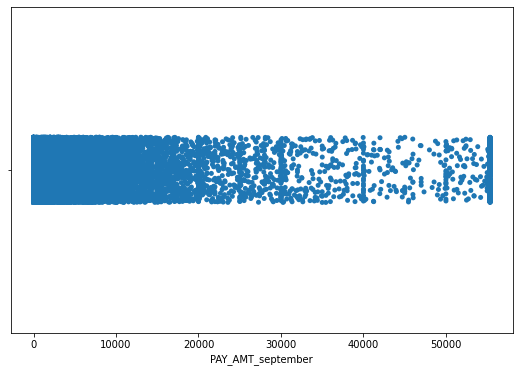

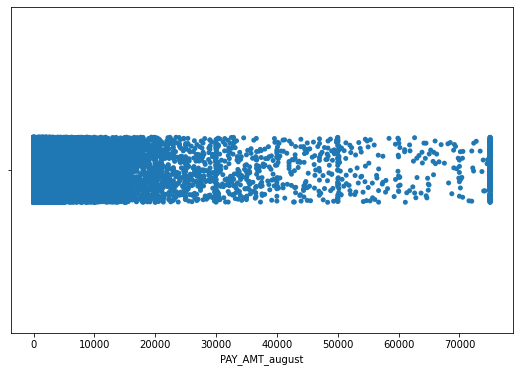

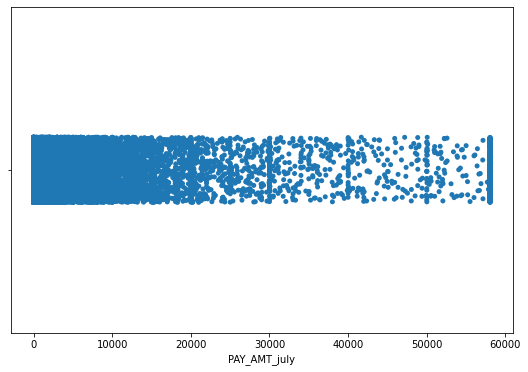

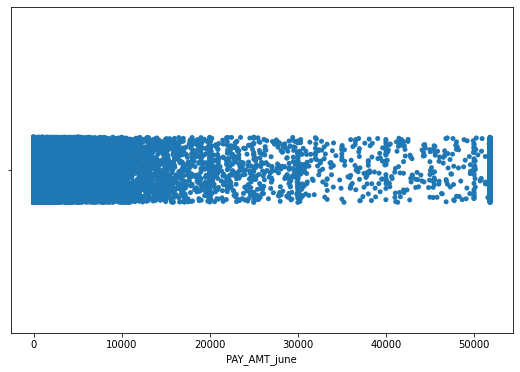

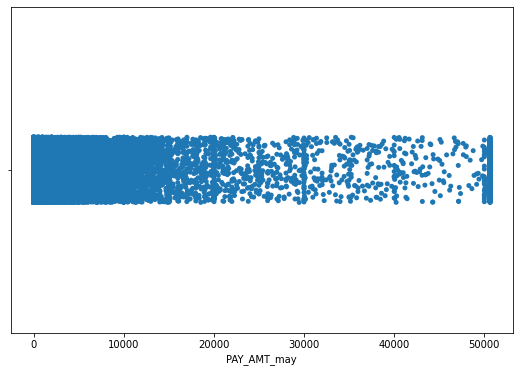

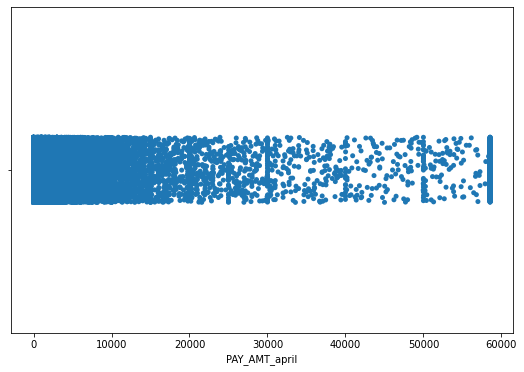

In [55]:
for col in ['PAY_AMT_september',
       'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june', 'PAY_AMT_may',
       'PAY_AMT_april']:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(dataset_l[col])

# **Feature Selection**

In [56]:
dataset1=dataset_l.copy()

In [57]:
## Dropping Constant Features
from sklearn.feature_selection import VarianceThreshold
var_thres= VarianceThreshold(threshold=0)
var_thres.fit(dataset1)



VarianceThreshold(threshold=0)

In [58]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

***There is no low variance Feature.***

In [59]:
## Feature Selection with Pearson Correlation
def correlation(data,threshold):
  col_corr=set()
  corr_matrix=data.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [60]:
## Feature Selection with Pearson Correlation
def correlation_low(data,threshold):
  col_corr=set()
  corr_matrix=data.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])<threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [61]:
correlation(dataset1,0.7)

{'BILL_AMT_april',
 'BILL_AMT_august',
 'BILL_AMT_july',
 'BILL_AMT_june',
 'BILL_AMT_may',
 'PAY_april',
 'PAY_july',
 'PAY_june',
 'PAY_may'}

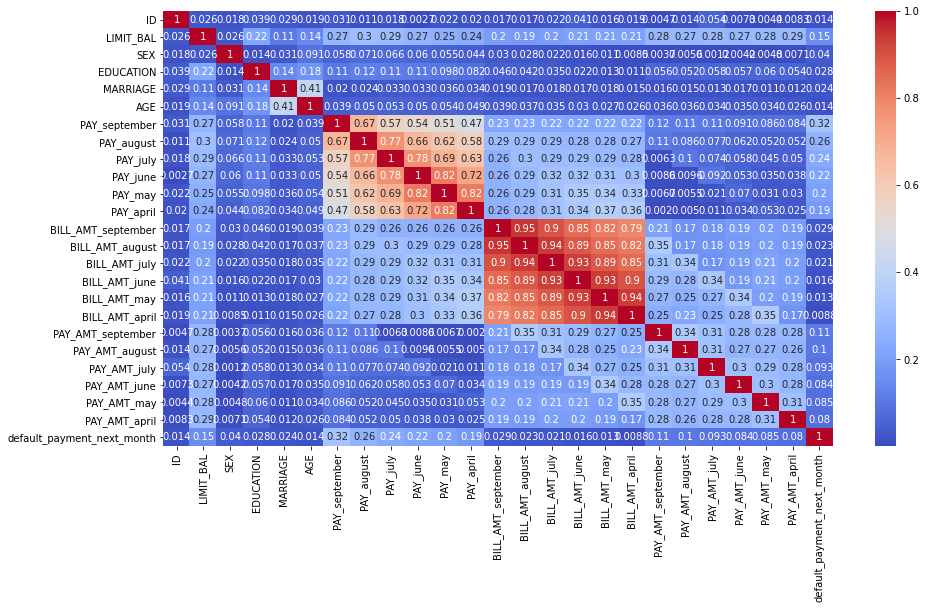

In [62]:
## Correlation
plt.figure(figsize=(15,8))
correlation=dataset1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [63]:
dataset1.drop(['BILL_AMT_april',
 'BILL_AMT_august',
 'BILL_AMT_july',
 'BILL_AMT_june',
 'BILL_AMT_may',
 'PAY_april',
 'PAY_july',
 'PAY_june',
 'PAY_may'],axis=1, inplace=True)

In [64]:
dataset1.head()

ID  LIMIT_BAL  SEX  ...  PAY_AMT_may  PAY_AMT_april  default_payment_next_month
0   1    20000.0    2  ...          0.0            0.0                           1
1   2   120000.0    2  ...          0.0         2000.0                           1
2   3    90000.0    2  ...       1000.0         5000.0                           0
3   4    50000.0    2  ...       1069.0         1000.0                           0
4   5    50000.0    1  ...        689.0          679.0                           0

[5 rows x 16 columns]

# **Implementing Logistic Regression**

## **Data Preparation**

In [407]:
dataset1.shape

(30000, 25)

In [408]:
dataset_pr=dataset1.copy()

In [409]:
dataset_pr.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'PAY_july', 'PAY_june', 'PAY_may',
       'PAY_april', 'BILL_AMT_september', 'BILL_AMT_august', 'BILL_AMT_july',
       'BILL_AMT_june', 'BILL_AMT_may', 'BILL_AMT_april', 'PAY_AMT_september',
       'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june', 'PAY_AMT_may',
       'PAY_AMT_april', 'default_payment_next_month'],
      dtype='object')

In [410]:
features1=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'BILL_AMT_september',
       'PAY_AMT_september', 'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june',
       'PAY_AMT_may', 'PAY_AMT_april',]

features1

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_september',
 'PAY_august',
 'BILL_AMT_september',
 'PAY_AMT_september',
 'PAY_AMT_august',
 'PAY_AMT_july',
 'PAY_AMT_june',
 'PAY_AMT_may',
 'PAY_AMT_april']

In [411]:
len(features1)

14

In [412]:
X= dataset_pr[features1]
X.head()

LIMIT_BAL  SEX  EDUCATION  ...  PAY_AMT_june  PAY_AMT_may  PAY_AMT_april
0    20000.0    2          2  ...           0.0          0.0            0.0
1   120000.0    2          2  ...        1000.0          0.0         2000.0
2    90000.0    2          2  ...        1000.0       1000.0         5000.0
3    50000.0    2          2  ...        1100.0       1069.0         1000.0
4    50000.0    1          2  ...        9000.0        689.0          679.0

[5 rows x 14 columns]

In [413]:
y = dataset_pr['default_payment_next_month']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default_payment_next_month, dtype: int64

***Handling Imbalance set by Synthetic Minority Oversampling Technique (SMOTE)***

In [414]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X, y = smote.fit_resample(dataset_pr[features1], dataset_pr['default_payment_next_month'])

print('Original dataset shape', len(dataset_pr))
print('Resampled dataset shape', len(y))
print('Resampled dataset shape', len(X))

Original dataset shape 30000
Resampled dataset shape 46728
Resampled dataset shape 46728


In [415]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(37382, 14)
(9346, 14)


In [416]:
X_train

array([[2.30000000e+05, 1.00000000e+00, 1.00000000e+00, ...,
        1.68100000e+03, 5.06343047e+04, 3.26700000e+03],
       [1.50000000e+05, 1.00000000e+00, 1.00000000e+00, ...,
        8.00000000e+03, 8.00000000e+03, 7.00000000e+03],
       [9.00000000e+04, 2.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 5.50000000e+02, 3.78000000e+03],
       ...,
       [6.00000000e+04, 2.00000000e+00, 1.43384714e+00, ...,
        3.81020874e+02, 1.26017813e+04, 7.83494541e+03],
       [1.00000000e+04, 1.92629755e+00, 2.07370245e+00, ...,
        2.21107357e+01, 1.81892730e+03, 3.68512261e+01],
       [1.40000000e+05, 2.00000000e+00, 1.00000000e+00, ...,
        2.00000000e+03, 2.20000000e+03, 2.00000000e+03]])

In [417]:
y_train

array([0, 0, 0, ..., 1, 1, 0])

## **Algorithm Implementation**

In [418]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [419]:
clf.coef_

array([[-2.17012649e-06,  5.45208733e-04,  7.96789307e-04,
         5.42808254e-04,  1.54706240e-02,  1.73287541e-03,
         1.34647112e-03,  2.79408504e-06, -2.54345368e-05,
        -2.46831362e-05, -1.52061903e-05, -1.13638635e-05,
        -1.21222461e-05, -9.24475517e-06]])

In [420]:
clf.intercept_

array([0.00040591])

In [421]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [422]:
test_preds

array([[0.75723118, 0.24276882],
       [0.7402105 , 0.2597895 ],
       [0.48689314, 0.51310686],
       ...,
       [0.5155927 , 0.4844073 ],
       [0.91492122, 0.08507878],
       [0.51130325, 0.48869675]])

In [423]:
train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]

In [424]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [425]:
train_class_preds

array([0, 0, 1, ..., 0, 1, 0])

In [426]:
test_class_preds

array([0, 0, 1, ..., 0, 0, 0])

In [427]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [428]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6139318388529239
The accuracy on test data is  0.6142734859833083


[[ 9321  9430]
 [ 5002 13629]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

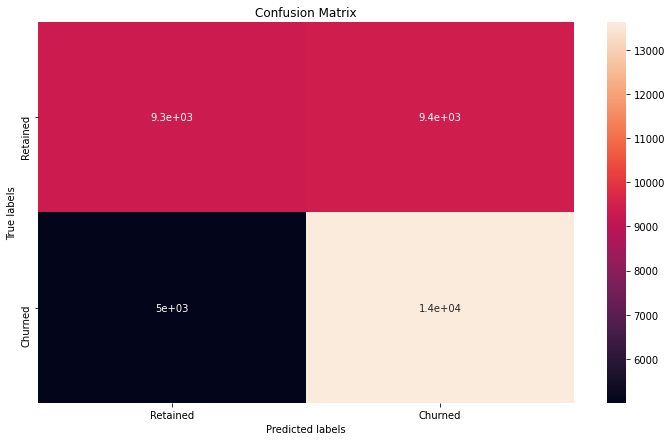

In [429]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[2274 2339]
 [1266 3467]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

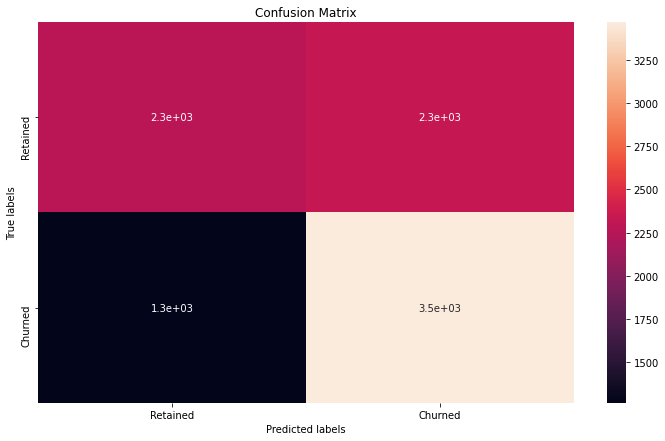

In [430]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [431]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.50      0.65      0.56     14323
           1       0.73      0.59      0.65     23059

    accuracy                           0.61     37382
   macro avg       0.61      0.62      0.61     37382
weighted avg       0.64      0.61      0.62     37382

 
roc_auc_score
0.6528013916798787


In [432]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.49      0.64      0.56      3540
           1       0.73      0.60      0.66      5806

    accuracy                           0.61      9346
   macro avg       0.61      0.62      0.61      9346
weighted avg       0.64      0.61      0.62      9346

 
roc_auc_score
0.6518238469268705


# **Implementing Random Forest Classifier**

## **Data Preparation**

In [188]:
dataset1.shape

(30000, 16)

In [189]:
dataset_pr=dataset1.copy()

In [190]:
dataset_pr.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'BILL_AMT_september',
       'PAY_AMT_september', 'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june',
       'PAY_AMT_may', 'PAY_AMT_april', 'default_payment_next_month'],
      dtype='object')

In [191]:
features1=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'BILL_AMT_september',
       'PAY_AMT_september', 'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june',
       'PAY_AMT_may', 'PAY_AMT_april',]

features1

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_september',
 'PAY_august',
 'BILL_AMT_september',
 'PAY_AMT_september',
 'PAY_AMT_august',
 'PAY_AMT_july',
 'PAY_AMT_june',
 'PAY_AMT_may',
 'PAY_AMT_april']

In [192]:
len(features1)

14

In [193]:
X= dataset_pr[features1]
X.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  ...  PAY_AMT_july  PAY_AMT_june  \
0    20000.0    2          2         1  ...           0.0           0.0   
1   120000.0    2          2         2  ...        1000.0        1000.0   
2    90000.0    2          2         2  ...        1000.0        1000.0   
3    50000.0    2          2         1  ...        1200.0        1100.0   
4    50000.0    1          2         1  ...       10000.0        9000.0   

   PAY_AMT_may  PAY_AMT_april  
0          0.0            0.0  
1          0.0         2000.0  
2       1000.0         5000.0  
3       1069.0         1000.0  
4        689.0          679.0  

[5 rows x 14 columns]

In [194]:
y = dataset_pr['default_payment_next_month']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default_payment_next_month, dtype: int64

***Handling Imbalance set by Synthetic Minority Oversampling Technique (SMOTE)***

In [195]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X, y = smote.fit_resample(dataset_pr[features1], dataset_pr['default_payment_next_month'])

print('Original dataset shape', len(dataset_pr))
print('Resampled dataset shape', len(y))
print('Resampled dataset shape', len(X))

Original dataset shape 30000
Resampled dataset shape 46728
Resampled dataset shape 46728


In [196]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(37382, 14)
(9346, 14)


In [197]:
X_train

array([[2.30000000e+05, 1.00000000e+00, 1.00000000e+00, ...,
        1.68100000e+03, 5.06343047e+04, 3.26700000e+03],
       [1.50000000e+05, 1.00000000e+00, 1.00000000e+00, ...,
        8.00000000e+03, 8.00000000e+03, 7.00000000e+03],
       [9.00000000e+04, 2.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 5.50000000e+02, 3.78000000e+03],
       ...,
       [1.00000000e+05, 2.00000000e+00, 1.47832355e+00, ...,
        0.00000000e+00, 4.79328081e+02, 0.00000000e+00],
       [3.00000000e+05, 1.00000000e+00, 1.00000000e+00, ...,
        9.05898151e+03, 7.05683221e+03, 1.49578229e+04],
       [1.40000000e+05, 2.00000000e+00, 1.00000000e+00, ...,
        2.00000000e+03, 2.20000000e+03, 2.00000000e+03]])

In [198]:
y_train

array([0, 0, 0, ..., 1, 1, 0])

## **Algorithm Implementation**

In [199]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [200]:
# Making predictions on train and test data

train_class_preds = rf_model.predict(X_train)
test_class_preds = rf_model.predict(X_test)


# Get the probabilities on train and test
train_preds = rf_model.predict_proba(X_train)[:,1]
test_preds = rf_model.predict_proba(X_test)[:,1]

In [201]:
test_class_preds

array([0, 1, 1, ..., 0, 0, 1])

In [202]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9995987373602269
The accuracy on test dataset is 0.8781296811470147


In [203]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [204]:
train_cm

array([[18745,     6],
       [    9, 18622]])

In [205]:
test_cm

array([[4261,  352],
       [ 787, 3946]])

[[18745     6]
 [    9 18622]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

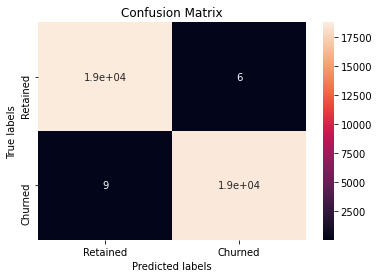

In [206]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [207]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18754
           1       1.00      1.00      1.00     18628

    accuracy                           1.00     37382
   macro avg       1.00      1.00      1.00     37382
weighted avg       1.00      1.00      1.00     37382

 
roc_auc_score
0.9999973464997401


In [208]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      5048
           1       0.83      0.92      0.87      4298

    accuracy                           0.88      9346
   macro avg       0.88      0.88      0.88      9346
weighted avg       0.88      0.88      0.88      9346

 
roc_auc_score
0.9358108651227671


In [209]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train,train_preds)
test_auc = roc_auc_score(y_test,test_preds)

In [210]:
train_auc

0.9999973464997401

In [211]:
test_auc

0.9358108651227671

In [212]:
c=pd.DataFrame(X_train,columns=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'BILL_AMT_september',
       'PAY_AMT_september', 'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june',
       'PAY_AMT_may', 'PAY_AMT_april'])
c.head()

LIMIT_BAL       SEX  EDUCATION  MARRIAGE  ...  PAY_AMT_july  PAY_AMT_june  \
0   230000.0  1.000000   1.000000  2.000000  ...  10000.000000   1681.000000   
1   150000.0  1.000000   1.000000  2.000000  ...  10000.000000   8000.000000   
2    90000.0  2.000000   2.000000  1.000000  ...      0.000000      0.000000   
3    50000.0  2.000000   2.528304  1.528304  ...    581.134045   1566.035587   
4   100000.0  1.430707   1.000000  1.000000  ...   1427.793080   1292.120434   

    PAY_AMT_may  PAY_AMT_april  
0  50634.304671    3267.000000  
1   8000.000000    7000.000000  
2    550.000000    3780.000000  
3      0.000000    2302.715635  
4   3266.998505    3240.241726  

[5 rows x 14 columns]

In [213]:
X_train=c

In [214]:
rf_model.feature_importances_

array([0.05819914, 0.09013451, 0.06832358, 0.08518169, 0.05663509,
       0.18865768, 0.08678822, 0.07232925, 0.05597372, 0.05235858,
       0.04815398, 0.0471134 , 0.04535273, 0.04479843])

In [215]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [216]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [217]:
importance_df.head()

Feature  Feature Importance
0  LIMIT_BAL                0.06
1        SEX                0.09
2  EDUCATION                0.07
3   MARRIAGE                0.09
4        AGE                0.06

In [218]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
5        PAY_september                0.19
1                  SEX                0.09
3             MARRIAGE                0.09
6           PAY_august                0.09
2            EDUCATION                0.07
7   BILL_AMT_september                0.07
0            LIMIT_BAL                0.06
4                  AGE                0.06
8    PAY_AMT_september                0.06
9       PAY_AMT_august                0.05
10        PAY_AMT_july                0.05
11        PAY_AMT_june                0.05
12         PAY_AMT_may                0.05
13       PAY_AMT_april                0.04

In [219]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [220]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

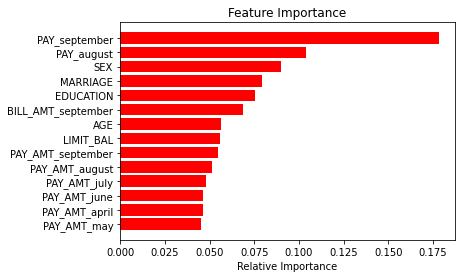

In [221]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

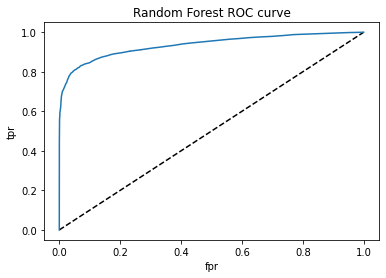

In [222]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Random Forest ROC curve')
plt.show()

# **Training a Random Forest Classifier with GridSearchCV**

## **Data Preparation**

In [468]:
dataset1.shape

(30000, 25)

In [469]:
dataset_pr=dataset1.copy()

In [470]:
dataset_pr.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'PAY_july', 'PAY_june', 'PAY_may',
       'PAY_april', 'BILL_AMT_september', 'BILL_AMT_august', 'BILL_AMT_july',
       'BILL_AMT_june', 'BILL_AMT_may', 'BILL_AMT_april', 'PAY_AMT_september',
       'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june', 'PAY_AMT_may',
       'PAY_AMT_april', 'default_payment_next_month'],
      dtype='object')

In [471]:
features1=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'BILL_AMT_september',
       'PAY_AMT_september', 'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june',
       'PAY_AMT_may', 'PAY_AMT_april',]

features1

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_september',
 'PAY_august',
 'BILL_AMT_september',
 'PAY_AMT_september',
 'PAY_AMT_august',
 'PAY_AMT_july',
 'PAY_AMT_june',
 'PAY_AMT_may',
 'PAY_AMT_april']

In [472]:
len(features1)

14

In [473]:
X= dataset_pr[features1]
X.head()

LIMIT_BAL  SEX  EDUCATION  ...  PAY_AMT_june  PAY_AMT_may  PAY_AMT_april
0    20000.0    2          2  ...           0.0          0.0            0.0
1   120000.0    2          2  ...        1000.0          0.0         2000.0
2    90000.0    2          2  ...        1000.0       1000.0         5000.0
3    50000.0    2          2  ...        1100.0       1069.0         1000.0
4    50000.0    1          2  ...        9000.0        689.0          679.0

[5 rows x 14 columns]

In [474]:
y = dataset_pr['default_payment_next_month']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default_payment_next_month, dtype: int64

***Handling Imbalance set by Synthetic Minority Oversampling Technique (SMOTE)***

In [475]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X, y = smote.fit_resample(dataset_pr[features1], dataset_pr['default_payment_next_month'])

print('Original dataset shape', len(dataset_pr))
print('Resampled dataset shape', len(y))
print('Resampled dataset shape', len(X))

Original dataset shape 30000
Resampled dataset shape 46728
Resampled dataset shape 46728


In [476]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(37382, 14)
(9346, 14)


In [477]:
X_train

array([[2.30000000e+05, 1.00000000e+00, 1.00000000e+00, ...,
        1.68100000e+03, 5.06343047e+04, 3.26700000e+03],
       [1.50000000e+05, 1.00000000e+00, 1.00000000e+00, ...,
        8.00000000e+03, 8.00000000e+03, 7.00000000e+03],
       [9.00000000e+04, 2.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 5.50000000e+02, 3.78000000e+03],
       ...,
       [3.78906647e+04, 2.00000000e+00, 1.21093353e+00, ...,
        2.57813294e+03, 3.23157784e+04, 2.00386854e+02],
       [1.00000000e+04, 1.07066302e+00, 1.14132604e+00, ...,
        3.94346959e+02, 1.04544815e+03, 7.06630179e+01],
       [1.40000000e+05, 2.00000000e+00, 1.00000000e+00, ...,
        2.00000000e+03, 2.20000000e+03, 2.00000000e+03]])

In [478]:
y_train

array([0, 0, 0, ..., 1, 1, 0])

## **Algorithm Implementation**

### **Provide the range of values for chosen hyperparameters**

In [479]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [480]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

### **Importing Random Forest Classifier**

In [481]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.2s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.1s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   1.8s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   1.8s
[CV] max_depth=4, min_samples_leaf=40, min_samples_s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  9.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [482]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [483]:
rf_optimal_model = rf_grid.best_estimator_

In [484]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 100,
 'n_estimators': 100}

In [485]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds = rf_optimal_model.predict_proba(X_train)[:,1]
test_preds = rf_optimal_model.predict_proba(X_test)[:,1]

In [486]:
len(train_preds)

37382

In [487]:
test_class_preds

array([0, 1, 1, ..., 0, 0, 1])

In [488]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8543951634476487
The accuracy on test dataset is 0.8500962978814466


In [489]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [490]:
train_cm

array([[16973,  1778],
       [ 3665, 14966]])

In [491]:
test_cm

array([[4130,  483],
       [ 918, 3815]])

[[16973  1778]
 [ 3665 14966]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

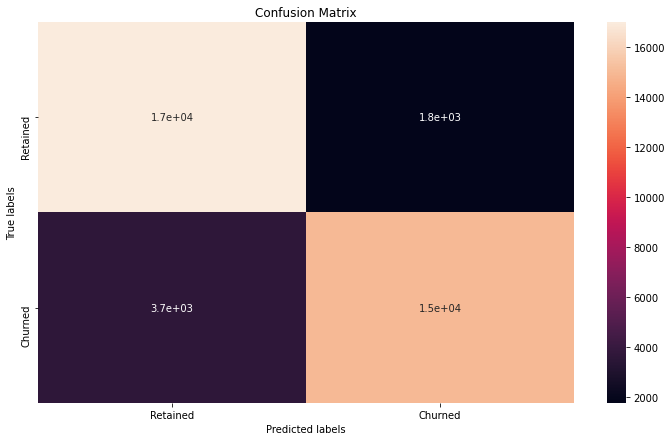

In [492]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [493]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86     20638
           1       0.80      0.89      0.85     16744

    accuracy                           0.85     37382
   macro avg       0.85      0.86      0.85     37382
weighted avg       0.86      0.85      0.85     37382

 
roc_auc_score
0.921373224970413


In [494]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.90      0.82      0.85      5048
           1       0.81      0.89      0.84      4298

    accuracy                           0.85      9346
   macro avg       0.85      0.85      0.85      9346
weighted avg       0.85      0.85      0.85      9346

 
roc_auc_score
0.9123725016922523


In [495]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train,train_preds)
test_auc = roc_auc_score(y_test,test_preds)

In [496]:
train_auc

0.921373224970413

In [497]:
test_auc

0.9123725016922523

In [498]:
X_train=c

In [499]:
rf_optimal_model.feature_importances_

array([0.01809214, 0.13602824, 0.09843831, 0.14491208, 0.00536299,
       0.30867336, 0.17357566, 0.0271884 , 0.02129947, 0.02273281,
       0.01635742, 0.01183204, 0.00751151, 0.00799558])

In [500]:
importances = rf_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [501]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [502]:
importance_df.head()

Feature  Feature Importance
0  LIMIT_BAL                0.02
1        SEX                0.14
2  EDUCATION                0.10
3   MARRIAGE                0.14
4        AGE                0.01

In [503]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
5        PAY_september                0.31
6           PAY_august                0.17
1                  SEX                0.14
3             MARRIAGE                0.14
2            EDUCATION                0.10
7   BILL_AMT_september                0.03
0            LIMIT_BAL                0.02
8    PAY_AMT_september                0.02
9       PAY_AMT_august                0.02
10        PAY_AMT_july                0.02
4                  AGE                0.01
11        PAY_AMT_june                0.01
12         PAY_AMT_may                0.01
13       PAY_AMT_april                0.01

In [504]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [505]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

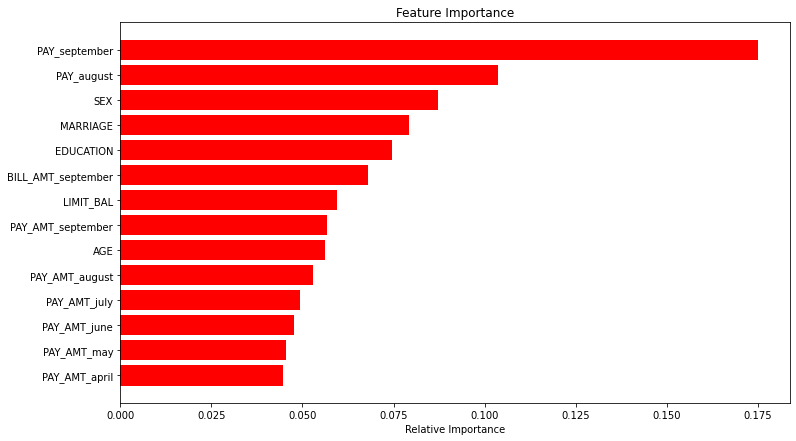

In [506]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

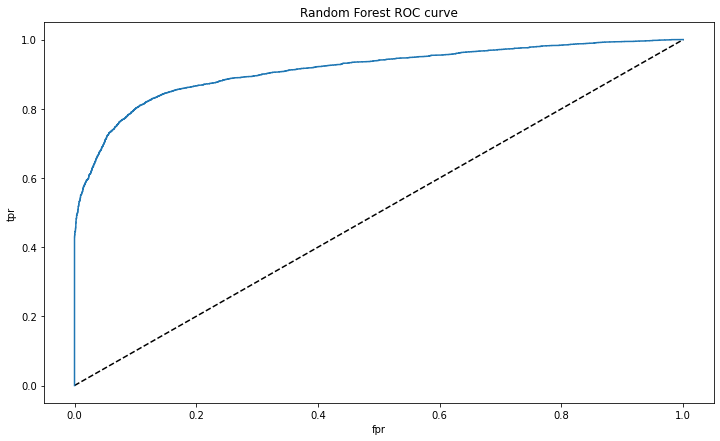

In [507]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Random Forest ROC curve')
plt.show()

# **Implementing Gradient Boosting Classifier**

## **Data Preparation**

In [508]:
dataset1.shape

(30000, 25)

In [509]:
dataset_pr=dataset1.copy()

In [510]:
dataset_pr.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'PAY_july', 'PAY_june', 'PAY_may',
       'PAY_april', 'BILL_AMT_september', 'BILL_AMT_august', 'BILL_AMT_july',
       'BILL_AMT_june', 'BILL_AMT_may', 'BILL_AMT_april', 'PAY_AMT_september',
       'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june', 'PAY_AMT_may',
       'PAY_AMT_april', 'default_payment_next_month'],
      dtype='object')

In [511]:
features1=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'BILL_AMT_september',
       'PAY_AMT_september', 'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june',
       'PAY_AMT_may', 'PAY_AMT_april',]

features1

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_september',
 'PAY_august',
 'BILL_AMT_september',
 'PAY_AMT_september',
 'PAY_AMT_august',
 'PAY_AMT_july',
 'PAY_AMT_june',
 'PAY_AMT_may',
 'PAY_AMT_april']

In [512]:
len(features1)

14

In [513]:
X= dataset_pr[features1]
X.head()

LIMIT_BAL  SEX  EDUCATION  ...  PAY_AMT_june  PAY_AMT_may  PAY_AMT_april
0    20000.0    2          2  ...           0.0          0.0            0.0
1   120000.0    2          2  ...        1000.0          0.0         2000.0
2    90000.0    2          2  ...        1000.0       1000.0         5000.0
3    50000.0    2          2  ...        1100.0       1069.0         1000.0
4    50000.0    1          2  ...        9000.0        689.0          679.0

[5 rows x 14 columns]

In [514]:
y = dataset_pr['default_payment_next_month']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default_payment_next_month, dtype: int64

***Handling Imbalance set by Synthetic Minority Oversampling Technique (SMOTE)***

In [515]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X, y = smote.fit_resample(dataset_pr[features1], dataset_pr['default_payment_next_month'])

print('Original dataset shape', len(dataset_pr))
print('Resampled dataset shape', len(y))
print('Resampled dataset shape', len(X))

Original dataset shape 30000
Resampled dataset shape 46728
Resampled dataset shape 46728


In [516]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(37382, 14)
(9346, 14)


In [517]:
X_train

array([[2.30000000e+05, 1.00000000e+00, 1.00000000e+00, ...,
        1.68100000e+03, 5.06343047e+04, 3.26700000e+03],
       [1.50000000e+05, 1.00000000e+00, 1.00000000e+00, ...,
        8.00000000e+03, 8.00000000e+03, 7.00000000e+03],
       [9.00000000e+04, 2.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 5.50000000e+02, 3.78000000e+03],
       ...,
       [1.60000000e+05, 1.32650302e+00, 2.00000000e+00, ...,
        2.91240691e+02, 0.00000000e+00, 1.93942792e+02],
       [2.00000000e+04, 1.00000000e+00, 2.00000000e+00, ...,
        1.00000000e+03, 1.00000000e+03, 7.69147565e+02],
       [1.40000000e+05, 2.00000000e+00, 1.00000000e+00, ...,
        2.00000000e+03, 2.20000000e+03, 2.00000000e+03]])

In [518]:
y_train

array([0, 0, 0, ..., 1, 1, 0])

## **Algorithm Implementation**

In [519]:
# Create an instance of the RandomForestClassifier
gb_model = GradientBoostingClassifier(max_depth=8,
 min_samples_leaf= 40,
 min_samples_split=80,
 n_estimators=80)


gb_model.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=40, min_samples_split=80,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
max_depth=8,
 min_samples_leaf= 40,
 min_samples_split=80,
 n_estimators=80

In [520]:
# Making predictions on train and test data

train_class_preds = gb_model.predict(X_train)
test_class_preds = gb_model.predict(X_test)


# Get the probabilities on train and test
train_preds = gb_model.predict_proba(X_train)[:,1]
test_preds = gb_model.predict_proba(X_test)[:,1]

In [521]:
len(train_preds)

37382

In [522]:
test_class_preds

array([0, 1, 1, ..., 0, 0, 1])

In [523]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8945481782676155
The accuracy on test dataset is 0.8733147870746844


In [524]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [525]:
train_cm

array([[17976,   775],
       [ 3167, 15464]])

In [526]:
test_cm

array([[4320,  293],
       [ 891, 3842]])

[[17976   775]
 [ 3167 15464]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

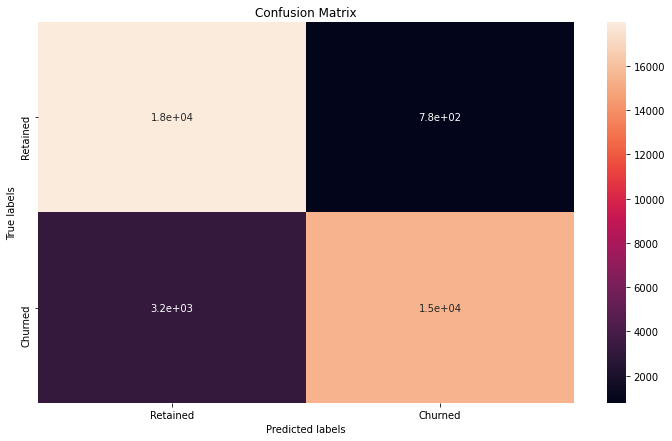

In [527]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [528]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90     21143
           1       0.83      0.95      0.89     16239

    accuracy                           0.89     37382
   macro avg       0.89      0.90      0.89     37382
weighted avg       0.90      0.89      0.90     37382

 
roc_auc_score
0.9666025991862295


In [529]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      5211
           1       0.81      0.93      0.87      4135

    accuracy                           0.87      9346
   macro avg       0.87      0.88      0.87      9346
weighted avg       0.88      0.87      0.87      9346

 
roc_auc_score
0.9328971775215772


In [530]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train,train_preds)
test_auc = roc_auc_score(y_test,test_preds)

In [531]:
train_auc

0.9666025991862295

In [532]:
test_auc

0.9328971775215772

In [533]:
X_train=c

In [534]:
gb_model.feature_importances_

array([0.02667442, 0.11936463, 0.06570189, 0.12828457, 0.01309855,
       0.40929227, 0.07497181, 0.07874934, 0.01481275, 0.01620073,
       0.01479125, 0.01428777, 0.0112055 , 0.01256452])

In [535]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [536]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [537]:
importance_df.head()

Feature  Feature Importance
0  LIMIT_BAL                0.03
1        SEX                0.12
2  EDUCATION                0.07
3   MARRIAGE                0.13
4        AGE                0.01

In [538]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
5        PAY_september                0.41
3             MARRIAGE                0.13
1                  SEX                0.12
7   BILL_AMT_september                0.08
2            EDUCATION                0.07
6           PAY_august                0.07
0            LIMIT_BAL                0.03
9       PAY_AMT_august                0.02
4                  AGE                0.01
8    PAY_AMT_september                0.01
10        PAY_AMT_july                0.01
11        PAY_AMT_june                0.01
12         PAY_AMT_may                0.01
13       PAY_AMT_april                0.01

In [539]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=40, min_samples_split=80,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [540]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

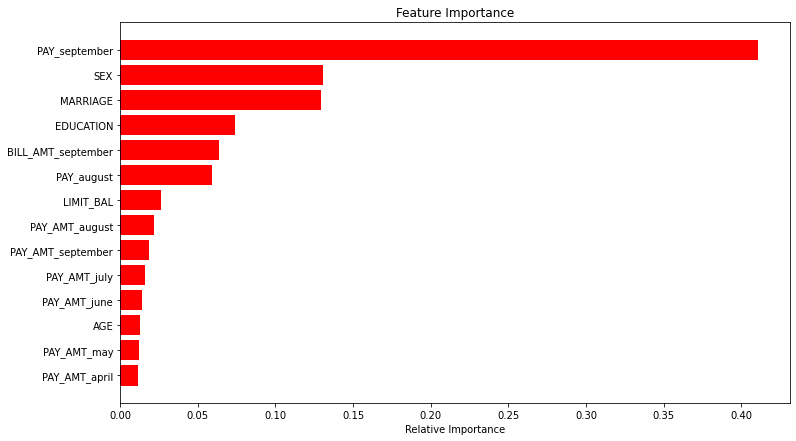

In [541]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

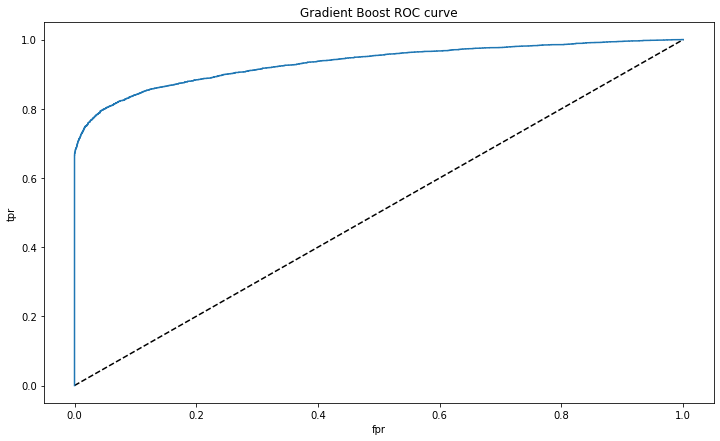

In [542]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Gradient Boost')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Gradient Boost ROC curve')
plt.show()

# **Implementing XG Boost Classifier**

## **Data Preparation**

In [543]:
dataset1.shape

(30000, 25)

In [544]:
dataset_pr=dataset1.copy()

In [545]:
dataset_pr.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'PAY_july', 'PAY_june', 'PAY_may',
       'PAY_april', 'BILL_AMT_september', 'BILL_AMT_august', 'BILL_AMT_july',
       'BILL_AMT_june', 'BILL_AMT_may', 'BILL_AMT_april', 'PAY_AMT_september',
       'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june', 'PAY_AMT_may',
       'PAY_AMT_april', 'default_payment_next_month'],
      dtype='object')

In [546]:
features1=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'BILL_AMT_september',
       'PAY_AMT_september', 'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june',
       'PAY_AMT_may', 'PAY_AMT_april',]

features1

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_september',
 'PAY_august',
 'BILL_AMT_september',
 'PAY_AMT_september',
 'PAY_AMT_august',
 'PAY_AMT_july',
 'PAY_AMT_june',
 'PAY_AMT_may',
 'PAY_AMT_april']

In [547]:
len(features1)

14

In [548]:
X= dataset_pr[features1]
X.head()

LIMIT_BAL  SEX  EDUCATION  ...  PAY_AMT_june  PAY_AMT_may  PAY_AMT_april
0    20000.0    2          2  ...           0.0          0.0            0.0
1   120000.0    2          2  ...        1000.0          0.0         2000.0
2    90000.0    2          2  ...        1000.0       1000.0         5000.0
3    50000.0    2          2  ...        1100.0       1069.0         1000.0
4    50000.0    1          2  ...        9000.0        689.0          679.0

[5 rows x 14 columns]

In [549]:
y = dataset_pr['default_payment_next_month']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default_payment_next_month, dtype: int64

***Handling Imbalance set by Synthetic Minority Oversampling Technique (SMOTE)***

In [550]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X, y = smote.fit_resample(dataset_pr[features1], dataset_pr['default_payment_next_month'])

print('Original dataset shape', len(dataset_pr))
print('Resampled dataset shape', len(y))
print('Resampled dataset shape', len(X))

Original dataset shape 30000
Resampled dataset shape 46728
Resampled dataset shape 46728


In [551]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(37382, 14)
(9346, 14)


In [552]:
X_train

array([[2.30000000e+05, 1.00000000e+00, 1.00000000e+00, ...,
        1.68100000e+03, 5.06343047e+04, 3.26700000e+03],
       [1.50000000e+05, 1.00000000e+00, 1.00000000e+00, ...,
        8.00000000e+03, 8.00000000e+03, 7.00000000e+03],
       [9.00000000e+04, 2.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 5.50000000e+02, 3.78000000e+03],
       ...,
       [1.00000000e+05, 1.35428130e+00, 1.64571870e+00, ...,
        1.86069756e+03, 2.00000000e+03, 2.00000000e+03],
       [1.00000000e+05, 1.43790564e+00, 1.87581128e+00, ...,
        2.25310946e+03, 2.08430467e+03, 7.30722665e+02],
       [1.40000000e+05, 2.00000000e+00, 1.00000000e+00, ...,
        2.00000000e+03, 2.20000000e+03, 2.00000000e+03]])

In [553]:
y_train

array([0, 0, 0, ..., 1, 1, 0])

## **Algorithm Implementation**

In [554]:
# Create an instance of the XGBClassifier
xg_model = XGBClassifier()


xg_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [555]:
# Making predictions on train and test data

train_class_preds = xg_model.predict(X_train)
test_class_preds = xg_model.predict(X_test)


# Get the probabilities on train and test
train_preds = xg_model.predict_proba(X_train)[:,1]
test_preds = xg_model.predict_proba(X_test)[:,1]

In [556]:
len(train_preds)

37382

In [557]:
test_class_preds

array([0, 1, 1, ..., 0, 0, 1])

In [558]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8726124872933497
The accuracy on test dataset is 0.8674299165418361


In [559]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [560]:
train_cm

array([[17716,  1035],
       [ 3727, 14904]])

In [561]:
test_cm

array([[4329,  284],
       [ 955, 3778]])

[[17716  1035]
 [ 3727 14904]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

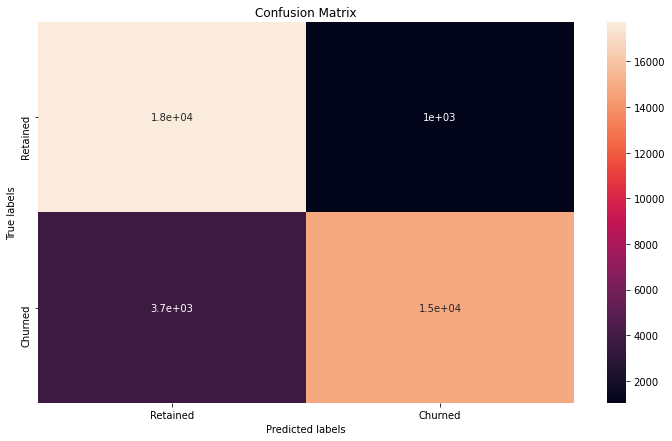

In [562]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [563]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88     21443
           1       0.80      0.94      0.86     15939

    accuracy                           0.87     37382
   macro avg       0.87      0.88      0.87     37382
weighted avg       0.88      0.87      0.87     37382

 
roc_auc_score
0.9311800896248195


In [564]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.94      0.82      0.87      5284
           1       0.80      0.93      0.86      4062

    accuracy                           0.87      9346
   macro avg       0.87      0.87      0.87      9346
weighted avg       0.88      0.87      0.87      9346

 
roc_auc_score
0.9252521225691237


In [565]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train,train_preds)
test_auc = roc_auc_score(y_test,test_preds)

In [566]:
train_auc

0.9311800896248195

In [567]:
test_auc

0.9252521225691237

In [568]:
X_train=c

In [569]:
xg_model.feature_importances_

array([0.01888214, 0.23299742, 0.09977188, 0.22207528, 0.00977217,
       0.18229169, 0.10428313, 0.02706325, 0.01601548, 0.02160006,
       0.0286116 , 0.01637473, 0.0091661 , 0.01109494], dtype=float32)

In [570]:
importances = xg_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [571]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [572]:
importance_df.head()

Feature  Feature Importance
0  LIMIT_BAL                0.02
1        SEX                0.23
2  EDUCATION                0.10
3   MARRIAGE                0.22
4        AGE                0.01

In [573]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
1                  SEX                0.23
3             MARRIAGE                0.22
5        PAY_september                0.18
2            EDUCATION                0.10
6           PAY_august                0.10
7   BILL_AMT_september                0.03
10        PAY_AMT_july                0.03
0            LIMIT_BAL                0.02
8    PAY_AMT_september                0.02
9       PAY_AMT_august                0.02
11        PAY_AMT_june                0.02
4                  AGE                0.01
12         PAY_AMT_may                0.01
13       PAY_AMT_april                0.01

In [574]:
xg_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [575]:
features = X_train.columns
importances = xg_model.feature_importances_
indices = np.argsort(importances)

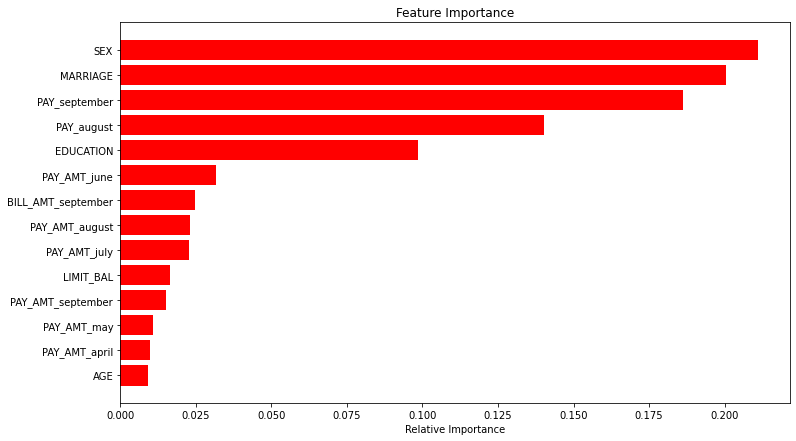

In [576]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

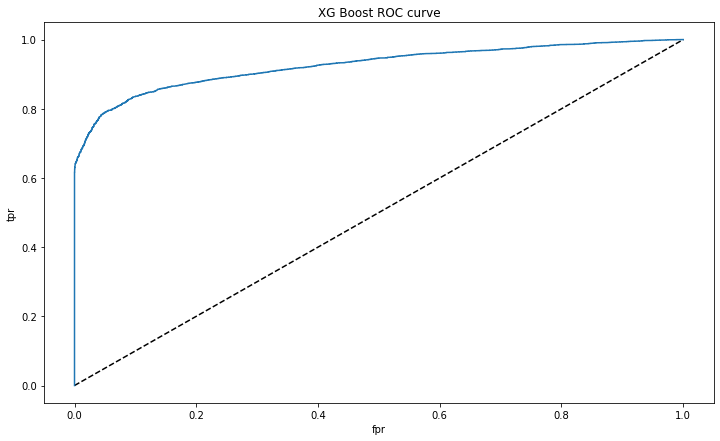

In [577]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='XG Boost')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('XG Boost ROC curve')
plt.show()

# **Training a XG Boost Classifier with GridSearchCV**

## **Data Preparation**

In [578]:
dataset1.shape

(30000, 25)

In [579]:
dataset_pr=dataset1.copy()

In [580]:
dataset_pr.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'PAY_july', 'PAY_june', 'PAY_may',
       'PAY_april', 'BILL_AMT_september', 'BILL_AMT_august', 'BILL_AMT_july',
       'BILL_AMT_june', 'BILL_AMT_may', 'BILL_AMT_april', 'PAY_AMT_september',
       'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june', 'PAY_AMT_may',
       'PAY_AMT_april', 'default_payment_next_month'],
      dtype='object')

In [581]:
features1=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'BILL_AMT_september',
       'PAY_AMT_september', 'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june',
       'PAY_AMT_may', 'PAY_AMT_april',]

features1

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_september',
 'PAY_august',
 'BILL_AMT_september',
 'PAY_AMT_september',
 'PAY_AMT_august',
 'PAY_AMT_july',
 'PAY_AMT_june',
 'PAY_AMT_may',
 'PAY_AMT_april']

In [582]:
len(features1)

14

In [583]:
X= dataset_pr[features1]
X.head()

LIMIT_BAL  SEX  EDUCATION  ...  PAY_AMT_june  PAY_AMT_may  PAY_AMT_april
0    20000.0    2          2  ...           0.0          0.0            0.0
1   120000.0    2          2  ...        1000.0          0.0         2000.0
2    90000.0    2          2  ...        1000.0       1000.0         5000.0
3    50000.0    2          2  ...        1100.0       1069.0         1000.0
4    50000.0    1          2  ...        9000.0        689.0          679.0

[5 rows x 14 columns]

In [584]:
y = dataset_pr['default_payment_next_month']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default_payment_next_month, dtype: int64

***Handling Imbalance set by Synthetic Minority Oversampling Technique (SMOTE)***

In [585]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X, y = smote.fit_resample(dataset_pr[features1], dataset_pr['default_payment_next_month'])

print('Original dataset shape', len(dataset_pr))
print('Resampled dataset shape', len(y))
print('Resampled dataset shape', len(X))

Original dataset shape 30000
Resampled dataset shape 46728
Resampled dataset shape 46728


In [586]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(37382, 14)
(9346, 14)


In [587]:
X_train

array([[2.30000000e+05, 1.00000000e+00, 1.00000000e+00, ...,
        1.68100000e+03, 5.06343047e+04, 3.26700000e+03],
       [1.50000000e+05, 1.00000000e+00, 1.00000000e+00, ...,
        8.00000000e+03, 8.00000000e+03, 7.00000000e+03],
       [9.00000000e+04, 2.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 5.50000000e+02, 3.78000000e+03],
       ...,
       [2.00000000e+04, 1.00000000e+00, 2.44095602e+00, ...,
        4.44933955e+02, 2.31060953e+02, 1.03624664e+02],
       [7.00000000e+04, 1.61235433e+00, 2.61235433e+00, ...,
        1.44206620e+03, 5.03939374e+02, 1.88602309e+03],
       [1.40000000e+05, 2.00000000e+00, 1.00000000e+00, ...,
        2.00000000e+03, 2.20000000e+03, 2.00000000e+03]])

In [588]:
y_train

array([0, 0, 0, ..., 1, 1, 0])

## **Algorithm Implementation**

### **Provide the range of values for chosen hyperparameters**

In [589]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [590]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

### **Importing XG Boost Classifier**

In [591]:
# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.7s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.7s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.7s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.7s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   2.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   2.6s
[CV] max_depth=4, min_samples_leaf=40, min_samples_s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed: 17.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimato

In [592]:
xg_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, min_samples_leaf=40, min_samples_split=50,
              missing=None, n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [593]:
xg_optimal_model = xg_grid.best_estimator_

In [594]:
xg_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [595]:
# Making predictions on train and test data

train_class_preds = xg_optimal_model.predict(X_train)
test_class_preds = xg_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds = xg_optimal_model.predict_proba(X_train)[:,1]
test_preds = xg_optimal_model.predict_proba(X_test)[:,1]

In [596]:
len(train_preds)

37382

In [597]:
test_class_preds

array([0, 1, 1, ..., 0, 0, 1])

In [598]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9016104007276229
The accuracy on test dataset is 0.8721378129681147


In [599]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [600]:
train_cm

array([[18104,   647],
       [ 3031, 15600]])

In [601]:
test_cm

array([[4327,  286],
       [ 909, 3824]])

[[18104   647]
 [ 3031 15600]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

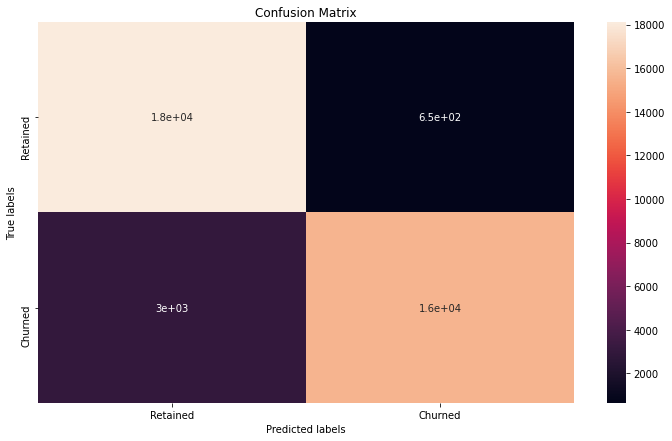

In [602]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [603]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91     21135
           1       0.84      0.96      0.89     16247

    accuracy                           0.90     37382
   macro avg       0.90      0.91      0.90     37382
weighted avg       0.91      0.90      0.90     37382

 
roc_auc_score
0.9737362197641626


In [604]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      5236
           1       0.81      0.93      0.86      4110

    accuracy                           0.87      9346
   macro avg       0.87      0.88      0.87      9346
weighted avg       0.88      0.87      0.87      9346

 
roc_auc_score
0.9322817880864617


In [605]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train,train_preds)
test_auc = roc_auc_score(y_test,test_preds)

In [606]:
train_auc

0.9737362197641626

In [607]:
test_auc

0.9322817880864617

In [608]:
X_train=c

In [609]:
xg_optimal_model.feature_importances_

array([0.01412364, 0.18684925, 0.07832581, 0.19396727, 0.00997566,
       0.33901528, 0.08355591, 0.02405086, 0.0124395 , 0.01382114,
       0.01343498, 0.01057397, 0.00963285, 0.01023399], dtype=float32)

In [610]:
importances = xg_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [611]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [612]:
importance_df.head()

Feature  Feature Importance
0  LIMIT_BAL                0.01
1        SEX                0.19
2  EDUCATION                0.08
3   MARRIAGE                0.19
4        AGE                0.01

In [613]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
5        PAY_september                0.34
1                  SEX                0.19
3             MARRIAGE                0.19
2            EDUCATION                0.08
6           PAY_august                0.08
7   BILL_AMT_september                0.02
0            LIMIT_BAL                0.01
4                  AGE                0.01
8    PAY_AMT_september                0.01
9       PAY_AMT_august                0.01
10        PAY_AMT_july                0.01
11        PAY_AMT_june                0.01
12         PAY_AMT_may                0.01
13       PAY_AMT_april                0.01

In [614]:
xg_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [615]:
features = X_train.columns
importances = xg_model.feature_importances_
indices = np.argsort(importances)

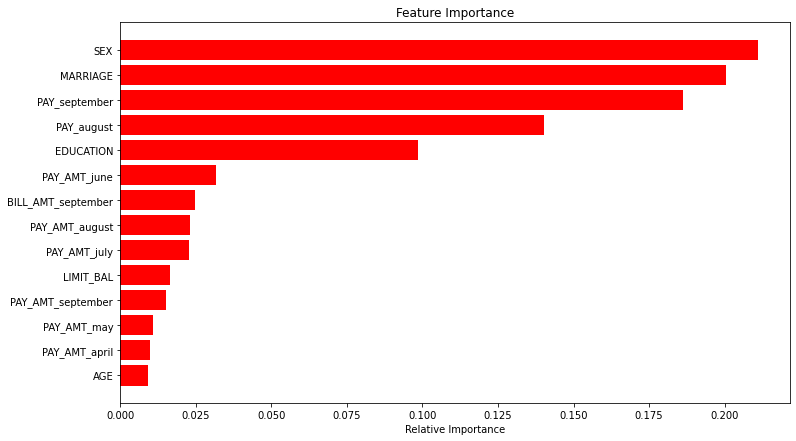

In [616]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

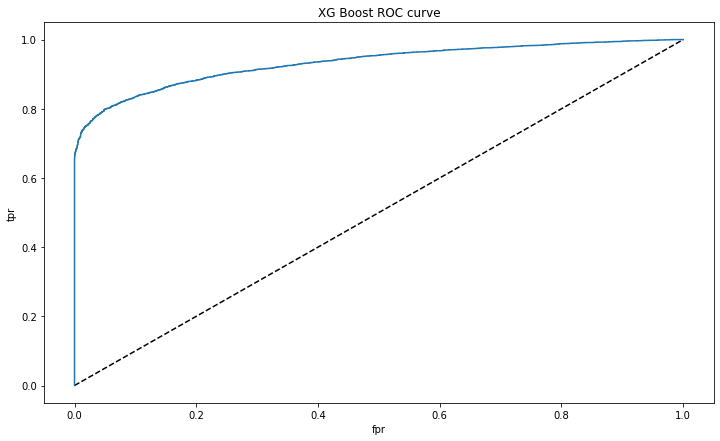

In [617]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='XG Boost')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('XG Boost ROC curve')
plt.show()

# **Data Preparation**

In [65]:
dataset1.shape

(30000, 16)

In [66]:
dataset_pr=dataset1.copy()

In [67]:
dataset_pr.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'BILL_AMT_september',
       'PAY_AMT_september', 'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june',
       'PAY_AMT_may', 'PAY_AMT_april', 'default_payment_next_month'],
      dtype='object')

In [68]:
features1=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'BILL_AMT_september',
       'PAY_AMT_september', 'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june',
       'PAY_AMT_may', 'PAY_AMT_april',]

features1

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_september',
 'PAY_august',
 'BILL_AMT_september',
 'PAY_AMT_september',
 'PAY_AMT_august',
 'PAY_AMT_july',
 'PAY_AMT_june',
 'PAY_AMT_may',
 'PAY_AMT_april']

In [69]:
len(features1)

14

In [70]:
X= dataset_pr[features1]
X.head()

LIMIT_BAL  SEX  EDUCATION  ...  PAY_AMT_june  PAY_AMT_may  PAY_AMT_april
0    20000.0    2          2  ...           0.0          0.0            0.0
1   120000.0    2          2  ...        1000.0          0.0         2000.0
2    90000.0    2          2  ...        1000.0       1000.0         5000.0
3    50000.0    2          2  ...        1100.0       1069.0         1000.0
4    50000.0    1          2  ...        9000.0        689.0          679.0

[5 rows x 14 columns]

In [71]:
y = dataset_pr['default_payment_next_month']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default_payment_next_month, dtype: int64

***Handling Imbalance set by Synthetic Minority Oversampling Technique (SMOTE)***

In [72]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X, y = smote.fit_resample(dataset_pr[features1], dataset_pr['default_payment_next_month'])

print('Original dataset shape', len(dataset_pr))
print('Resampled dataset shape', len(y))
print('Resampled dataset shape', len(X))

Original dataset shape 30000
Resampled dataset shape 46728
Resampled dataset shape 46728


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(37382, 14)
(9346, 14)


In [74]:
X_train

array([[2.30000000e+05, 1.00000000e+00, 1.00000000e+00, ...,
        1.68100000e+03, 5.06343047e+04, 3.26700000e+03],
       [1.50000000e+05, 1.00000000e+00, 1.00000000e+00, ...,
        8.00000000e+03, 8.00000000e+03, 7.00000000e+03],
       [9.00000000e+04, 2.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 5.50000000e+02, 3.78000000e+03],
       ...,
       [3.60000000e+05, 1.32418615e+00, 1.64837229e+00, ...,
        3.17013818e+04, 0.00000000e+00, 6.81763466e+02],
       [5.00000000e+04, 1.13996740e+00, 2.86003260e+00, ...,
        1.46405902e+02, 4.64956953e+02, 1.42574681e+03],
       [1.40000000e+05, 2.00000000e+00, 1.00000000e+00, ...,
        2.00000000e+03, 2.20000000e+03, 2.00000000e+03]])

In [75]:
y_train

array([0, 0, 0, ..., 1, 1, 0])

# **Implementing Decision Tree by Entropy**

In [76]:
decision_classifier = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=100,max_depth=8,max_features=14,  random_state=0)
decision_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=14, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [77]:
y_train_pred = decision_classifier.predict(X_train)

In [78]:
y_pred = decision_classifier.predict(X_test)

In [79]:
accuracy_score(y_train, y_train_pred)

0.8479749612112781

In [80]:
accuracy_score(y_test, y_pred) * 100

84.20714744275625

In [81]:
confusion_matrix(y_train_pred, y_train)

array([[17884,  4816],
       [  867, 13815]])

In [83]:
confusion_matrix(y_pred, y_test)

array([[4351, 1214],
       [ 262, 3519]])

In [82]:
print(metrics.classification_report(y_train_pred, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86     22700
           1       0.74      0.94      0.83     14682

    accuracy                           0.85     37382
   macro avg       0.85      0.86      0.85     37382
weighted avg       0.87      0.85      0.85     37382

 
roc_auc_score
0.847634278999511


In [656]:
print(metrics.classification_report(y_pred, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      5531
           1       0.75      0.93      0.83      3815

    accuracy                           0.84      9346
   macro avg       0.84      0.86      0.84      9346
weighted avg       0.86      0.84      0.84      9346

 
roc_auc_score
0.8433068085952445


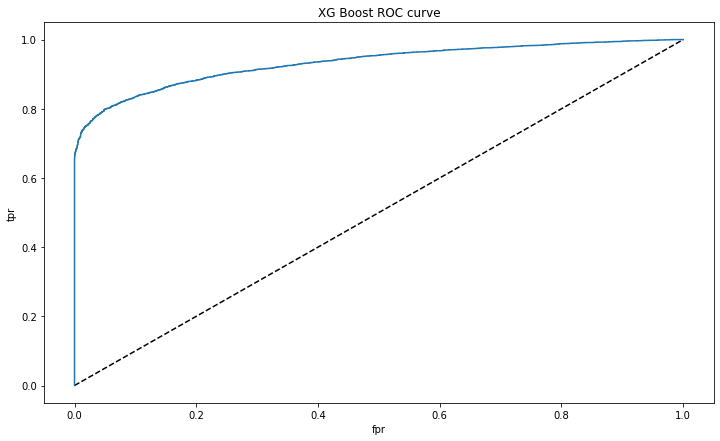

In [657]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='XG Boost')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('XG Boost ROC curve')
plt.show()

## **Visualizing Decision Tree**

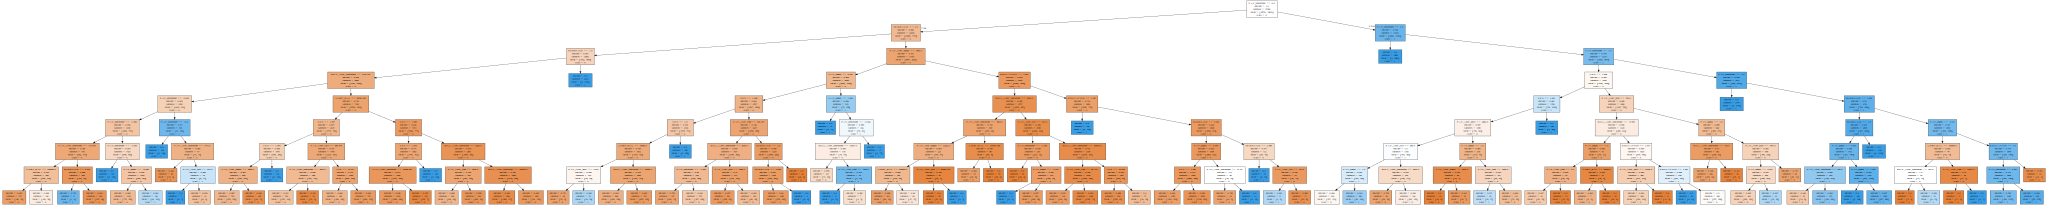

In [658]:
graph = Source(tree.export_graphviz(decision_classifier, out_file=None
   , feature_names=c.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

# **Implementing Decision Tree by Gini**

In [659]:
decision_classifier = DecisionTreeClassifier(criterion='gini',max_leaf_nodes=100,max_depth=8,max_features=14,  random_state=0)
decision_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=14, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [660]:
y_train_pred = decision_classifier.predict(X_train)

In [661]:
y_pred = decision_classifier.predict(X_test)

In [662]:
accuracy_score(y_train, y_train_pred)

0.8513723182280242

In [663]:
accuracy_score(y_test, y_pred) * 100

84.16434838433554

In [664]:
print(metrics.classification_report(y_train_pred, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86     21447
           1       0.78      0.91      0.84     15935

    accuracy                           0.85     37382
   macro avg       0.85      0.86      0.85     37382
weighted avg       0.86      0.85      0.85     37382

 
roc_auc_score
0.8511392708904344


In [665]:
print(metrics.classification_report(y_pred, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      5215
           1       0.78      0.89      0.83      4131

    accuracy                           0.84      9346
   macro avg       0.84      0.85      0.84      9346
weighted avg       0.85      0.84      0.84      9346

 
roc_auc_score
0.8424445488821241


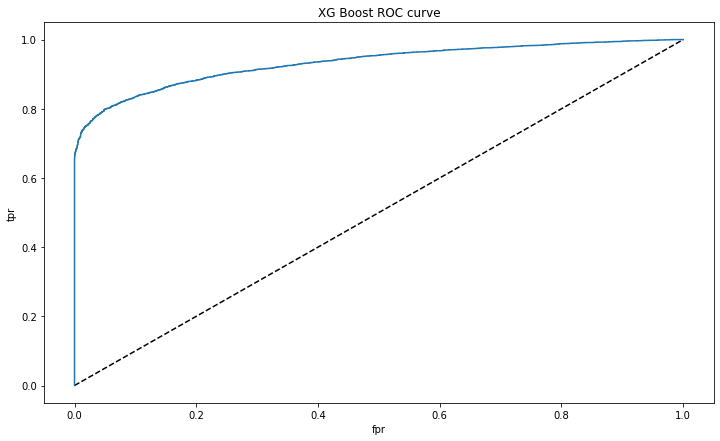

In [666]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='XG Boost')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('XG Boost ROC curve')
plt.show()

## **Visualizing Decision Tree**

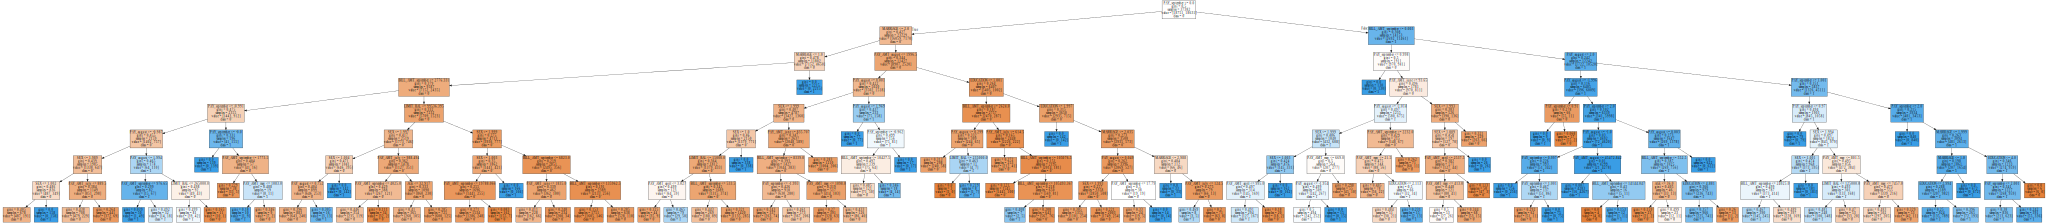

In [667]:
graph = Source(tree.export_graphviz(decision_classifier, out_file=None
   , feature_names=c.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

# **Implementing KNN**

In [688]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

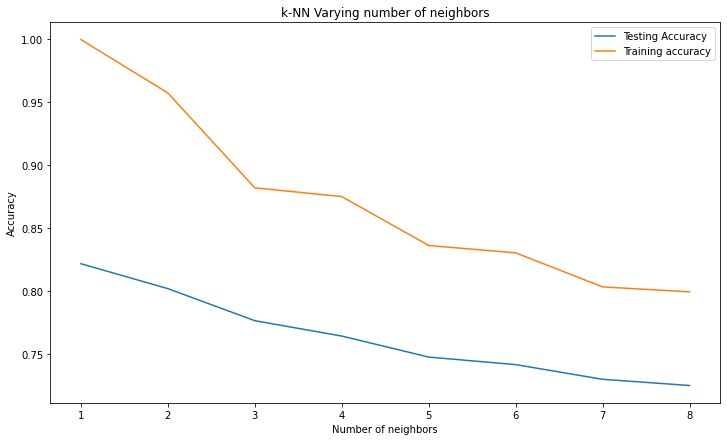

In [689]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [696]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=3)

In [697]:
# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [698]:
knn.score(X_test,y_test)

0.7763749197517654

In [699]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_curve

In [700]:
# Let us get the predictions using the classifier we had fit above
train_class_preds = knn.predict(X_train)
test_class_preds = knn.predict(X_test)

In [702]:
confusion_matrix(y_train,train_class_preds)

array([[15034,  3717],
       [  698, 17933]])

In [701]:
confusion_matrix(y_test,test_class_preds)

array([[3050, 1563],
       [ 527, 4206]])

[[3050 1563]
 [ 527 4206]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

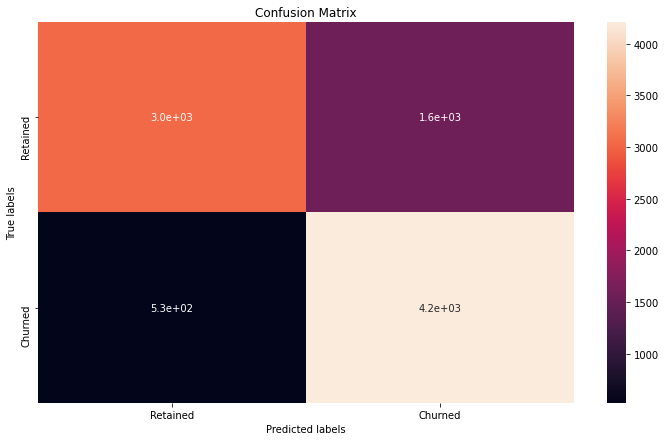

In [676]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [686]:
train_preds

array([0.05461723, 0.08695593, 0.18705918, ..., 0.9924706 , 0.9991009 ,
       0.08040603], dtype=float32)

In [703]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87     15732
           1       0.96      0.83      0.89     21650

    accuracy                           0.88     37382
   macro avg       0.88      0.89      0.88     37382
weighted avg       0.89      0.88      0.88     37382

 
roc_auc_score
0.9737362197641626


In [704]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.66      0.85      0.74      3577
           1       0.89      0.73      0.80      5769

    accuracy                           0.78      9346
   macro avg       0.77      0.79      0.77      9346
weighted avg       0.80      0.78      0.78      9346

 
roc_auc_score
0.9322817880864617


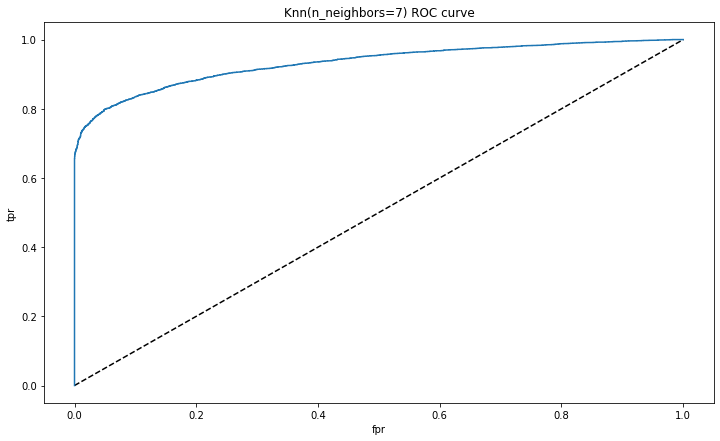

In [705]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [706]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,test_class_preds)

0.7749145354792207

# **Implementing KNN with Cross Validation**

In [707]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [708]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [709]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [710]:
knn_cv.best_score_

0.8209213751069548

In [711]:
knn_cv.best_params_

{'n_neighbors': 1}

In [712]:
knn_cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [713]:
knn_optimal_model = knn_cv.best_estimator_

In [714]:
knn_cv.best_params_

{'n_neighbors': 1}

In [715]:
# Making predictions on train and test data

train_class_preds = knn_optimal_model.predict(X_train)
test_class_preds = knn_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds = knn_optimal_model.predict_proba(X_train)[:,1]
test_preds = knn_optimal_model.predict_proba(X_test)[:,1]

In [716]:
len(train_preds)

37382

In [717]:
test_class_preds

array([0, 1, 1, ..., 0, 1, 1])

In [718]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9995719865175753
The accuracy on test dataset is 0.9994650117697411


In [719]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [720]:
train_cm

array([[18748,     3],
       [   13, 18618]])

In [721]:
test_cm

array([[4608,    5],
       [   0, 4733]])

[[18748     3]
 [   13 18618]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

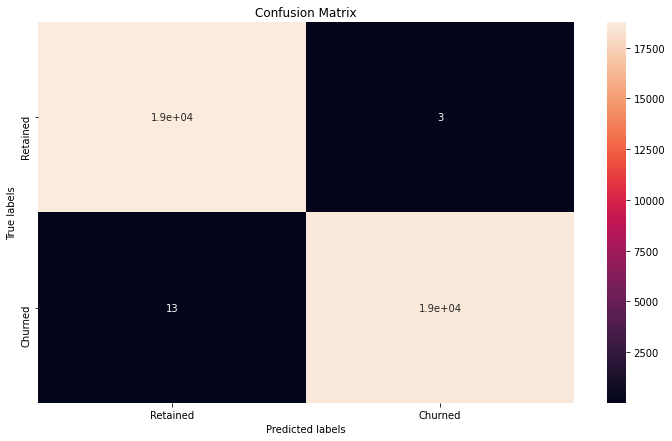

In [722]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [723]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18761
           1       1.00      1.00      1.00     18621

    accuracy                           1.00     37382
   macro avg       1.00      1.00      1.00     37382
weighted avg       1.00      1.00      1.00     37382

 
roc_auc_score
0.9995711233690101


In [724]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4608
           1       1.00      1.00      1.00      4738

    accuracy                           1.00      9346
   macro avg       1.00      1.00      1.00      9346
weighted avg       1.00      1.00      1.00      9346

 
roc_auc_score
0.9994580533275526


In [725]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train,train_preds)
test_auc = roc_auc_score(y_test,test_preds)

# **Data Preparation**

In [726]:
dataset1.shape

(30000, 25)

In [727]:
dataset_pr=dataset1.copy()

In [728]:
dataset_pr.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'PAY_july', 'PAY_june', 'PAY_may',
       'PAY_april', 'BILL_AMT_september', 'BILL_AMT_august', 'BILL_AMT_july',
       'BILL_AMT_june', 'BILL_AMT_may', 'BILL_AMT_april', 'PAY_AMT_september',
       'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june', 'PAY_AMT_may',
       'PAY_AMT_april', 'default_payment_next_month'],
      dtype='object')

In [729]:
features1=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'BILL_AMT_september',
       'PAY_AMT_september', 'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june',
       'PAY_AMT_may', 'PAY_AMT_april',]

features1

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_september',
 'PAY_august',
 'BILL_AMT_september',
 'PAY_AMT_september',
 'PAY_AMT_august',
 'PAY_AMT_july',
 'PAY_AMT_june',
 'PAY_AMT_may',
 'PAY_AMT_april']

In [730]:
len(features1)

14

In [731]:
X= dataset_pr[features1]
X.head()

LIMIT_BAL  SEX  EDUCATION  ...  PAY_AMT_june  PAY_AMT_may  PAY_AMT_april
0    20000.0    2          2  ...           0.0          0.0            0.0
1   120000.0    2          2  ...        1000.0          0.0         2000.0
2    90000.0    2          2  ...        1000.0       1000.0         5000.0
3    50000.0    2          2  ...        1100.0       1069.0         1000.0
4    50000.0    1          2  ...        9000.0        689.0          679.0

[5 rows x 14 columns]

In [732]:
y = dataset_pr['default_payment_next_month']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default_payment_next_month, dtype: int64

***Handling Imbalance set by Synthetic Minority Oversampling Technique (SMOTE)***

In [733]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X, y = smote.fit_resample(dataset_pr[features1], dataset_pr['default_payment_next_month'])

print('Original dataset shape', len(dataset_pr))
print('Resampled dataset shape', len(y))
print('Resampled dataset shape', len(X))

Original dataset shape 30000
Resampled dataset shape 46728
Resampled dataset shape 46728


In [734]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(37382, 14)
(9346, 14)


In [735]:
X_train

array([[2.30000000e+05, 1.00000000e+00, 1.00000000e+00, ...,
        1.68100000e+03, 5.06343047e+04, 3.26700000e+03],
       [1.50000000e+05, 1.00000000e+00, 1.00000000e+00, ...,
        8.00000000e+03, 8.00000000e+03, 7.00000000e+03],
       [9.00000000e+04, 2.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 5.50000000e+02, 3.78000000e+03],
       ...,
       [2.00000000e+04, 1.67242495e+00, 2.00000000e+00, ...,
        6.30067805e+02, 6.06051825e+02, 8.09703738e+02],
       [5.00000000e+04, 1.51870950e+00, 2.51870950e+00, ...,
        5.70580447e+02, 1.82769800e+03, 1.51828904e+03],
       [1.40000000e+05, 2.00000000e+00, 1.00000000e+00, ...,
        2.00000000e+03, 2.20000000e+03, 2.00000000e+03]])

In [736]:
y_train

array([0, 0, 0, ..., 1, 1, 0])

# **Implementing Naive Bayes </b>**

In [737]:
from sklearn.naive_bayes import GaussianNB

gnb_model=GaussianNB()


gnb_model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [738]:
# Making predictions on train and test data

train_class_preds = gnb_model.predict(X_train)
test_class_preds = gnb_model.predict(X_test)


# Get the probabilities on train and test
train_preds = gnb_model.predict_proba(X_train)[:,1]
test_preds = gnb_model.predict_proba(X_test)[:,1]

In [739]:
len(train_preds)

37382

In [740]:
test_class_preds

array([0, 1, 1, ..., 1, 0, 1])

In [741]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.5658873254507517
The accuracy on test dataset is 0.5708324416862829


In [742]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [743]:
train_cm

array([[ 4706, 14045],
       [ 2183, 16448]])

In [744]:
test_cm

array([[1187, 3426],
       [ 585, 4148]])

[[ 4706 14045]
 [ 2183 16448]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

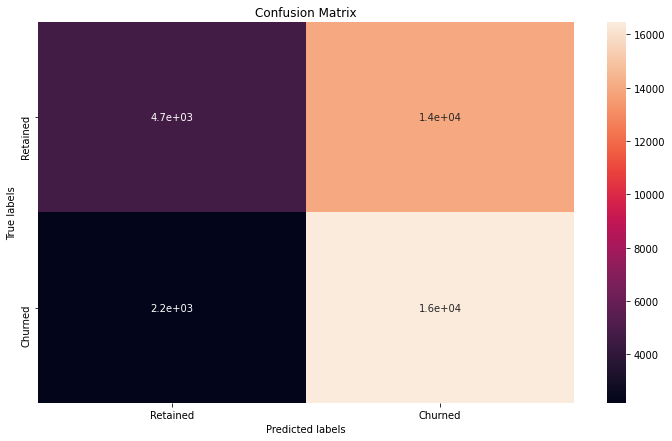

In [745]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [746]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.25      0.68      0.37      6889
           1       0.88      0.54      0.67     30493

    accuracy                           0.57     37382
   macro avg       0.57      0.61      0.52     37382
weighted avg       0.77      0.57      0.61     37382

 
roc_auc_score
0.6702448010852479


In [747]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.26      0.67      0.37      1772
           1       0.88      0.55      0.67      7574

    accuracy                           0.57      9346
   macro avg       0.57      0.61      0.52      9346
weighted avg       0.76      0.57      0.62      9346

 
roc_auc_score
0.6732817748498179


In [748]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train,train_preds)
test_auc = roc_auc_score(y_test,test_preds)

In [749]:
train_auc

0.6702448010852479

In [750]:
test_auc

0.6732817748498179

In [751]:
gnb_model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

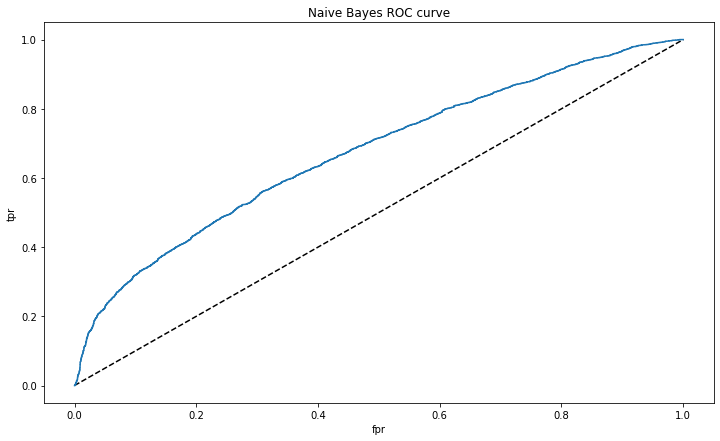

In [752]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Naive Bayes')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Naive Bayes ROC curve')
plt.show()

# **Implementing Support Vector Machine**

In [753]:
from sklearn import svm
clf = svm.SVC()

clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [754]:
train_pred=clf.predict(X_train)

In [755]:
test_pred=clf.predict(X_test)

In [756]:
# Confusion matrices for train and test 

print(confusion_matrix(y_train,train_pred))
print(confusion_matrix(y_test,test_pred))

[[10371  8380]
 [ 6427 12204]]
[[2555 2058]
 [1625 3108]]


[[2555 2058]
 [1625 3108]]


[Text(0, 0.5, 'negative'), Text(0, 1.5, 'positive')]

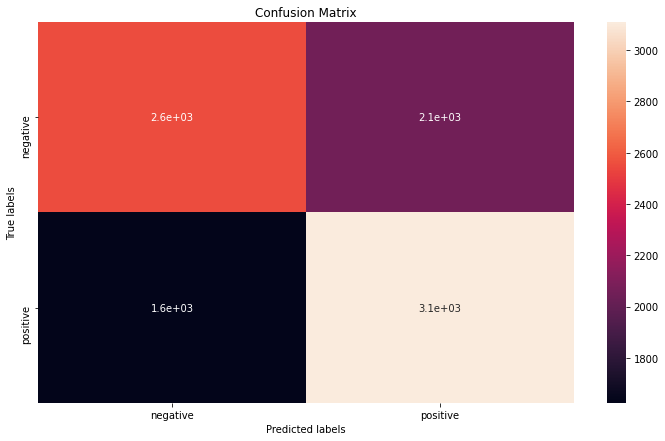

In [757]:
# Get the confusion matrix for both train and test

labels = ['negative', 'positive']
cm = confusion_matrix(y_test, test_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [758]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.25      0.68      0.37      6889
           1       0.88      0.54      0.67     30493

    accuracy                           0.57     37382
   macro avg       0.57      0.61      0.52     37382
weighted avg       0.77      0.57      0.61     37382

 
roc_auc_score
0.6702448010852479


In [759]:
print(metrics.classification_report(test_pred, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.55      0.61      0.58      4180
           1       0.66      0.60      0.63      5166

    accuracy                           0.61      9346
   macro avg       0.61      0.61      0.60      9346
weighted avg       0.61      0.61      0.61      9346

 
roc_auc_score
0.6052677308164962


In [760]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train,train_pred)
test_auc = roc_auc_score(y_test,test_pred)

In [761]:
train_auc

0.6040639026294674

In [762]:
test_auc

0.6052677308164962

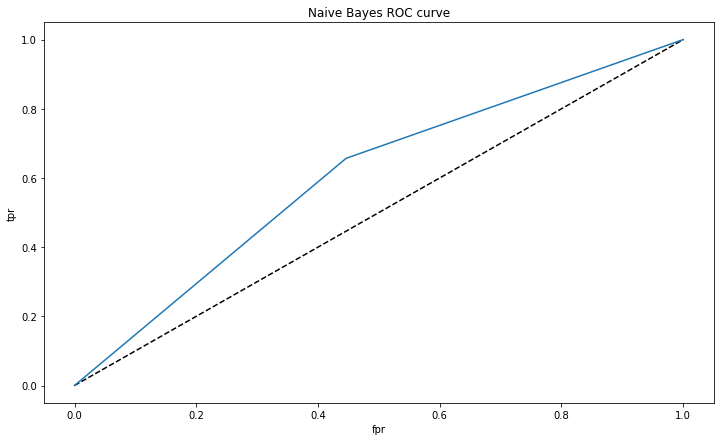

In [763]:
fpr, tpr, thresholds = roc_curve(y_test, test_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Naive Bayes')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Naive Bayes ROC curve')
plt.show()

# **I found that Random Forest gives the highest ROC_AUC score, Accuracy & F1 Score of  99.9%,100% & 100% respectively for Train Set and 93.8%, 88% & 88% respectively  for Test set. Now i will create the KS Chart on the basis of Random Forest Algorithm.**

# **KS Chart**

**Data Preparation**

In [251]:
dataset_pr=dataset1.copy()

In [252]:
features1=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_september', 'PAY_august', 'BILL_AMT_september',
       'PAY_AMT_september', 'PAY_AMT_august', 'PAY_AMT_july', 'PAY_AMT_june',
       'PAY_AMT_may', 'PAY_AMT_april',]

In [253]:
X= dataset_pr[features1]
X.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  ...  PAY_AMT_july  PAY_AMT_june  \
0    20000.0    2          2         1  ...           0.0           0.0   
1   120000.0    2          2         2  ...        1000.0        1000.0   
2    90000.0    2          2         2  ...        1000.0        1000.0   
3    50000.0    2          2         1  ...        1200.0        1100.0   
4    50000.0    1          2         1  ...       10000.0        9000.0   

   PAY_AMT_may  PAY_AMT_april  
0          0.0            0.0  
1          0.0         2000.0  
2       1000.0         5000.0  
3       1069.0         1000.0  
4        689.0          679.0  

[5 rows x 14 columns]

In [254]:
y = dataset_pr['default_payment_next_month']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default_payment_next_month, dtype: int64

**Random Forest Algorithm Implementation and creating KS Chart**

In [255]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

rf_model.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [256]:
pip install colorama 

In [257]:
p=rf_model.predict_proba(X)[:,1]

In [258]:
df = pd.DataFrame()
df['p']=p.tolist()
df["y"]=y.tolist()

In [259]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [260]:
mydf = ks(data=df,target="y", prob="p")

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.796667      1.00    2879          0     43.38%         0.00%   
2       0.650833      0.79    3081          1     46.43%         0.00%   
3       0.144000      0.65     676       2320     10.19%         9.93%   
4       0.092500      0.14       0       3018      0.00%        12.92%   
5       0.072000      0.09       0       2323      0.00%         9.94%   
6       0.052500      0.07       0       3458      0.00%        14.80%   
7       0.041667      0.05       0       2191      0.00%         9.38%   
8       0.034000      0.04       0       2216      0.00%         9.48%   
9       0.016667      0.03       0       4748      0.00%        20.32%   
10      0.000000      0.01       0       3089      0.00%        13.22%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             43.38

In [261]:
from scipy.stats import ks_2samp

ks_2samp(df.loc[df.y==0,"p"], df.loc[df.y==1,"p"])

Ks_2sampResult(statistic=0.9986919026288261, pvalue=0.0)

In [262]:
df.head()

p  y  target0        bucket
0  0.905  1        0   (0.79, 1.0]
1  0.820  1        0   (0.79, 1.0]
2  0.050  0        1  (0.04, 0.05]
3  0.060  0        1  (0.05, 0.07]
4  0.060  0        1  (0.05, 0.07]